* pull in data
* combine sources into one df?
* run analytical functions
    * info
    * describe
    * mean
    * mode
    * value_counts
    * std
    * [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
    * duplicated

Perhaps time of shooting/ even popular movies during certain times of the year visualizations

runtime? genre? budget how to spend on the movie? expected crew size? (tn.moviebudgets) time of the year realease?

critical ratings

actors/crew

find what profit is most closely linked to - critical raitings? genre? release date? actors?


use tmdb.movies for genre, language, release date. replace vote_average and vote_count with numbers from title.ratings (imdb source)

    join title.basics with title.ratings DONE
    
    join ^^^ with tmdb.movies, replacing movie ratings columns (oy)
    
    
    DOWN THE LINE
    
    join title.basics with title.crew, title.principals, name.basics to look at relationship between profitability and principal/crew presence
        this would have to involve a multilevel index

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import os
import seaborn as sns

In [364]:
data_imports = {}

for file in os.listdir("zippedData"):
    print(file)
    if file[-3:] == 'csv':
        data_imports[file[:-4]] = pd.read_csv('zippedData/' + str(file))
#     elif file[-3:] == 'tsv':
#         data_imports[file[:-4]] = pd.read_csv('zippedData/' + str(file), sep = '\t')


print("Finished import")

bom.movie_gross.csv
name.basics.csv
rt.movie_info.tsv
rt.reviews.tsv
title.akas.csv
title.basics.csv
title.crew.csv
title.principals.csv
title.ratings.csv
tmdb.movies.csv
tn.movie_budgets.csv
Finished import


# Cleanup Bom.Movie_Gross

In [365]:
bom_movie_gross = data_imports['bom.movie_gross']

for each in bom_movie_gross.loc[(bom_movie_gross.title == 'Bluebeard'), 'year']:
    bom_movie_gross.loc[(bom_movie_gross.title == 'Bluebeard') &
                        (bom_movie_gross.year == each), 'title'] = 'Bluebeard' + ' (' + str(each) + ')'
bom_movie_gross = bom_movie_gross.set_index('title')

In [366]:
bom_movie_gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


# Merge title.basics with title.ratings into imdb_df



In [367]:
title_basics = data_imports['title.basics']
title_ratings = data_imports['title.ratings']

title_basics = title_basics.set_index('tconst')
title_ratings = title_ratings.set_index('tconst')
imdb_df = title_basics.join(title_ratings, on='tconst')


# Merge imdb_df with tmdb.movies

In [368]:
tmdb_movies = data_imports['tmdb.movies']
tmdb_movies = tmdb_movies.drop_duplicates(subset = ['id'])
# imdb_df.join(tmdb_movies on = 'primary_title')

In [369]:
tmdb_movies.head()
# imdb_df.reset_index()
imdb_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [370]:
test_df = pd.DataFrame(tmdb_movies, index=[tmdb_movies['release_date'], tmdb_movies['title']])
tmdb_movies['start_year'] = tmdb_movies['release_date'].apply(lambda x: int(x[:4]))
test_df = tmdb_movies.set_index(['start_year', 'title'])
test_df.head()

/home/stonehengee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Unnamed: 0  \
start_year title                                                      
2010       Harry Potter and the Deathly Hallows: Part 1           0   
           How to Train Your Dragon                               1   
           Iron Man 2                                             2   
1995       Toy Story                                              3   
2010       Inception                                              4   

                                                                   genre_ids  \
start_year title                                                               
2010       Harry Potter and the Deathly Hallows: Part 1      [12, 14, 10751]   
           How to Train Your Dragon                      [14, 12, 16, 10751]   
           Iron Man 2                                          [12, 28, 878]   
1995       Toy Story                                         [16, 35, 10751]   
2010       Inception                                           [28, 878, 12]   

                                                            id  \
start_year title                                                 
2010       Harry Potter and the Deathly Hallows: Part 1  12444   
           How to Train Your Dragon                      10191   
           Iron Man 2                                    10138   
1995       Toy Story                                       862   
2010       Inception                                     27205   

                                                        original_language  \
start_year title                                                            
2010       Harry Potter and the Deathly Hallows: Part 1                en   
           How to Train Your Dragon                                    en   
           Iron Man 2                                                  en   
1995       Toy Story                                                   en   
2010       Inception                                                   en   

                                                                                       original_title  \
start_year title                                                                                        
2010       Harry Potter and the Deathly Hallows: Part 1  Harry Potter and the Deathly Hallows: Part 1   
           How to Train Your Dragon                                          How to Train Your Dragon   
           Iron Man 2                                                                      Iron Man 2   
1995       Toy Story                                                                        Toy Story   
2010       Inception                                                                        Inception   

                                                         popularity  \
start_year title                                                      
2010       Harry Potter and the Deathly Hallows: Part 1      33.533   
           How to Train Your Dragon                          28.734   
           Iron Man 2                                        28.515   
1995       Toy Story                                         28.005   
2010       Inception                                         27.920   

                                                        release_date  \
start_year title                                                       
2010       Harry Potter and the Deathly Hallows: Part 1   2010-11-19   
           How to Train Your Dragon                       2010-03-26   
           Iron Man 2                                     2010-05-07   
1995       Toy Story                                      1995-11-22   
2010       Inception                                      2010-07-16   

                                                         vote_average  \
start_year title                                                        
2010       Harry Potter and the Deathly Hallows: Part 1           7.7   
           How to Train Your Dragon  

In [371]:
imdb_df = imdb_df.rename(columns = {'primary_title': "title"})
imdb_df = imdb_df.reset_index()
# test_df.index[0][:]

# Reset working_df

In [372]:
working_df = imdb_df.set_index(['start_year', 'title']).join(test_df, how='inner', lsuffix='_imdb', rsuffix='_mvdb')


working_df = working_df.drop(columns=['Unnamed: 0', 'vote_average', 'vote_count', 'popularity', 'genre_ids', 'id'])
working_df = working_df.fillna(value = {'genres': 'Unknown'})

working_df.head()


tconst original_title_imdb  runtime_minutes  \
start_year title                                                             
2010       * Cemetery       tt1598691          * Cemetery             80.0   
           127 Hours        tt1542344           127 Hours             94.0   
           12th & Delaware  tt1548865     12th & Delaware             81.0   
           13               tt0798817                  13             91.0   
           14 Blades        tt1442571          Jin yi wei            114.0   

                                               genres  averagerating  \
start_year title                                                       
2010       * Cemetery          Comedy,Horror,Thriller            5.2   
           127 Hours        Adventure,Biography,Drama            7.6   
           12th & Delaware          Documentary,Drama            7.5   
           13                          Drama,Thriller            6.1   
           14 Blades          Action,History,Thriller            6.4   

                            numvotes original_language original_title_mvdb  \
start_year title                                                             
2010       * Cemetery           17.0                en          * Cemetery   
           127 Hours        323949.0                en           127 Hours   
           12th & Delaware     407.0                en     12th & Delaware   
           13                38418.0                en                  13   
           14 Blades          7100.0                zh                 錦衣衛   

                           release_date  
start_year title                         
2010       * Cemetery        2010-01-01  
           127 Hours         2010-11-05  
           12th & Delaware   2010-04-01  
           13                2010-03-12  
           14 Blades         2010-02-04

# Split 'genre' column into genre1, genre2, genre3

In [373]:
comma_counter = 0

for each in working_df['genres']:
    if type(each) == str:
        current_count = each.count(',')
        if current_count > comma_counter:
            comma_counter = current_count
    
comma_counter

2

## replacing NaN with "Unknown"

In [374]:
working_df = working_df.fillna(value = {'genres': 'Unknown'})

## splitting working_df into paralell dataframes, one where genres are split into individual strings, and the other in which its converted into a list

creates working_df_3g while preserving working_df

In [375]:
working_df_3g = pd.DataFrame(working_df)
working_df_3g[['genre1', 'genre2', 'genre3']] = working_df['genres'].str.split(',', expand=True)

working_df = working_df.drop(columns = ['genre1', 'genre2', 'genre3'])
working_df_3g.head()


tconst original_title_imdb  runtime_minutes  \
start_year title                                                             
2010       * Cemetery       tt1598691          * Cemetery             80.0   
           127 Hours        tt1542344           127 Hours             94.0   
           12th & Delaware  tt1548865     12th & Delaware             81.0   
           13               tt0798817                  13             91.0   
           14 Blades        tt1442571          Jin yi wei            114.0   

                                               genres  averagerating  \
start_year title                                                       
2010       * Cemetery          Comedy,Horror,Thriller            5.2   
           127 Hours        Adventure,Biography,Drama            7.6   
           12th & Delaware          Documentary,Drama            7.5   
           13                          Drama,Thriller            6.1   
           14 Blades          Action,History,Thriller            6.4   

                            numvotes original_language original_title_mvdb  \
start_year title                                                             
2010       * Cemetery           17.0                en          * Cemetery   
           127 Hours        323949.0                en           127 Hours   
           12th & Delaware     407.0                en     12th & Delaware   
           13                38418.0                en                  13   
           14 Blades          7100.0                zh                 錦衣衛   

                           release_date       genre1     genre2    genre3  
start_year title                                                           
2010       * Cemetery        2010-01-01       Comedy     Horror  Thriller  
           127 Hours         2010-11-05    Adventure  Biography     Drama  
           12th & Delaware   2010-04-01  Documentary      Drama      None  
           13                2010-03-12        Drama   Thriller      None  
           14 Blades         2010-02-04       Action    History  Thriller

creates working_df_glist (Later?)

In [376]:
working_df.head()

tconst original_title_imdb  runtime_minutes  \
start_year title                                                             
2010       * Cemetery       tt1598691          * Cemetery             80.0   
           127 Hours        tt1542344           127 Hours             94.0   
           12th & Delaware  tt1548865     12th & Delaware             81.0   
           13               tt0798817                  13             91.0   
           14 Blades        tt1442571          Jin yi wei            114.0   

                                               genres  averagerating  \
start_year title                                                       
2010       * Cemetery          Comedy,Horror,Thriller            5.2   
           127 Hours        Adventure,Biography,Drama            7.6   
           12th & Delaware          Documentary,Drama            7.5   
           13                          Drama,Thriller            6.1   
           14 Blades          Action,History,Thriller            6.4   

                            numvotes original_language original_title_mvdb  \
start_year title                                                             
2010       * Cemetery           17.0                en          * Cemetery   
           127 Hours        323949.0                en           127 Hours   
           12th & Delaware     407.0                en     12th & Delaware   
           13                38418.0                en                  13   
           14 Blades          7100.0                zh                 錦衣衛   

                           release_date  
start_year title                         
2010       * Cemetery        2010-01-01  
           127 Hours         2010-11-05  
           12th & Delaware   2010-04-01  
           13                2010-03-12  
           14 Blades         2010-02-04

In [377]:
working_df_3g.drop(columns = ['genres'])

tconst  \
start_year title                                            
2010       * Cemetery                           tt1598691   
           127 Hours                            tt1542344   
           12th & Delaware                      tt1548865   
           13                                   tt0798817   
           14 Blades                            tt1442571   
           15 Till Midnight                     tt1568798   
           2001 Maniacs: Field of Screams       tt0858411   
           2012: Time for Change                tt1506940   
           22 Bullets                           tt1167638   
           3 Backyards                          tt1314190   
           3 Magic Words                        tt1820364   
           4192: The Crowning of the Hit King   tt1663128   
           80 Waves                             tt1824903   
           8: The Mormon Proposition            tt1484522   
           A Christmas Snow                     tt1606191   
           A Course in Miracles: The Movie      tt1928099   
           A Drummer's Dream                    tt1663970   
           A Film Unfinished                    tt1568923   
           A Haunting on Hamilton Street        tt5297152   
           A Horrible Way to Die                tt1617620   
           A Little Help                        tt1319722   
           A Marine Story                       tt1447479   
           A Nanny for Christmas                tt1572008   
           A Nightmare on Elm Street            tt1179056   
           A Numbers Game                       tt1283542   
           A Screaming Man                      tt1639901   
           A Small Act                          tt1262958   
           A Somewhat Gentle Man                tt1386683   
           A Yakuza's Daughter Never Cries      tt1547089   
           Absinthe                             tt1590802   
...                                                   ...   
2018       White Fang                           tt5222768   
           White Orchid                         tt3313182   
           White Rabbit                         tt7689950   
           Whitney                              tt5740866   
           Widows                               tt4218572   
           Wild Honey Pie!                      tt7253190   
           Wildlife                             tt5929754   
           Wildling                             tt5085924   
           Winchester                           tt1072748   
           Winter Ridge                         tt5973658   
           Wobble Palace                        tt7355708   
           Wolf                                 tt6436666   
           Wolf                                 tt8197998   
           Won't You Be My Neighbor?            tt7681902   
           Worlds of Ursula K. Le Guin         tt10022158   
           Wrestle                              tt8373280   
           Wretch                               tt7221072   
           Write When You Get Work              tt7917484   
           Wunderland                           tt5815078   
           Yardie                               tt5862902   
           You Might Be the Killer              tt8998472   
           You Shall Not Sleep                  tt7158686   
           Zero                                 tt6527426   
           Zero                                 tt7054386   
           Zoe                                  tt5969746   
           Zoe                                  tt6010628   
           Zoo                                  tt7624934   
           [Cargo]                              tt6068554   
           eHero                                tt3615952   
2019       Ophelia                             tt10084952   

                                                              original_title_imdb  \
start_year title                                                                    
2010       * Cemetery                

# Add in tn_movie_budgets

In [378]:
tn_movie_budgets = data_imports['tn.movie_budgets']

In [379]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [380]:
movie_titles_working = []
movie_titles_tn = []
for year, title in working_df_3g.index:
    movie_titles_working.append(title)

for title in tn_movie_budgets['movie']:
    movie_titles_tn.append(title)
    
len(set(movie_titles_working) & set(movie_titles_tn))

1582

In [381]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [382]:
working_df_3g['release_date'] = pd.to_datetime(working_df_3g['release_date'])

In [383]:
print(working_df_3g['release_date'].max())
print(tn_movie_budgets['release_date'].max())

2019-06-28 00:00:00
Sep 9, 2016


# Scraping wikipedia for production budgets

In [3]:
import requests
from bs4 import BeautifulSoup
import re
import json
from inspect import currentframe, getframeinfo


# Adding MPAA Ratings via TMDB (not implemented)

In [385]:
response = requests.get(
    url = 'https://api.themoviedb.org/3/movie/550?api_key={}&language=en-US&append_to_response=release_dates'.format(open('tmdb_api.txt', 'r').read())
# print(url)
)

print(response.json()['release_dates']['results'][1])

{'iso_3166_1': 'HK', 'release_dates': [{'certification': 'IIB', 'iso_639_1': '', 'note': '', 'release_date': '1999-11-11T00:00:00.000Z', 'type': 3}]}


In [386]:
response = requests.get(
    url="https://en.wikipedia.org/wiki/Web_scraping",
)
soup = BeautifulSoup(response.content, 'html.parser')

title = soup.find(id="firstHeading")
print(title.content)

None


In [8]:
def convert_budget_to_int(budget, debug):

#     if budget[0] != '$' or budget[0:3] != 'US$':
    if type(budget) == int:
        return budget
    if budget.startswith('$') or budget.startswith('US$'):
        if budget[0] == '<':
            budget = budget[1:]
        while '[' in budget:
            budget = budget.replace(budget[budget.index('['):budget.index(']')+1], '')
        if '–' in budget:
            currency = ''
            for i in budget:
                if not i.isnumeric():
                    currency = currency + i
                else:
                    break
            if debug:
                print(budget, "Middle of dash check")
            budget = budget[budget.index('–')+1:]
            budget = currency + budget
        if '-' in budget:
            currency = ''
            for i in budget:
                if not i.isnumeric():
                    currency = currency + i
                else:
                    break
            if debug:
                print(budget, "Middle of dash check")
            budget = budget[budget.index('-')+1:]
            budget = currency + budget
        if '—' in budget:
            currency = ''
            for i in budget:
                if not i.isnumeric():
                    currency = currency + i
                else:
                    break
            if debug:
                print(budget, "Middle of dash check")
            budget = budget[budget.index('—')+1:]
            budget = currency + budget
    #     print(debug)
        if debug == True:
            print(budget)

    # Using regex because for some reason ' ' would not be recognized for certain movies
        if bool(re.search(r"\s", budget)):
            whitespace_index = re.search(r"\s", budget).start()
            if budget[whitespace_index-1].isnumeric():
                number = budget[:whitespace_index]
                word = budget[whitespace_index+1:]
            else:
                whitespace_index = re.search(r"\s", budget[:whitespace_index]+budget[whitespace_index+1:]).start()
                number = budget[:whitespace_index+1]
                word = budget[whitespace_index+2:]
            if debug:
                print(word)
                print(number)
    #         number, word = budget.split(' ', 1)
    #         number = 
        else:
    #         print('pee')
            number, word = budget, ''
    #     if debug == True:
    #         print(number)
        if debug:
            print(number, 'Before \'.\' check')
        if '.' in number:
            left, right = number.split('.')
            decimal_places = len(right)
            number = number.replace('.', '')

        if 'crore' in word.lower():
            try:
                number = number + '0000000'[decimal_places:]
            except:
                number = number + '0000000'
        elif 'million' in word.lower():
            try:
                number = number + '000000'[decimal_places:]
            except:
                number = number + '000000'
    #     print(word)
    #     print(number)

        if ',' in number:
            number = number.replace(',', '')

        budget = budget.strip()
        if debug:
            print(budget)

        if budget[0] == '$':
            number = number.replace('$', '')
        elif budget[:3] == 'US$':
            number = number.replace('US$', '')


    
        return int(number)
#     else:
#         return None
    

def urlify(in_string):
    return "%20".join(in_string.split())

def wiki_search(search):
    url = "https://en.wikipedia.org/w/api.php?action=query&format=json&prop=&list=search&srsearch={}".format(urlify(search))
#     print(url)
    response= requests.get(url=url)
#     soup = BeautifulSoup(response.content)
#     print(response.json())
    try:
        return(response.json()['query']['search'][0]['pageid'])
    except IndexError:
        return None

def wiki_grab(search, debug = False):
    searches_to_ignore = ['#Stuck 2014',
                         'House of Black Wings 2010',
                          'Restoring a Masterpiece: The Renovation of Eastman Theatre 2010'
                         ]
    if search[0] == '#':
        return None
    if search in searches_to_ignore:
        return None
    pageid = wiki_search(search)
    if debug:
        print(pageid)
    if pageid == None:
        return None
    url = 'https://en.wikipedia.org/w/api.php?action=parse&format=json&pageid={}&prop=text&formatversion=2'.format(pageid)
    if debug:
        print(url)
    response = requests.get(url=url)
#     turns website into parsable "soup"
    soup = BeautifulSoup(response.json()['parse']['text'])
    
#     testcase for when net before gross
#     soup = BeautifulSoup(json.loads(open("untitled.html", "r").read())['parse']['text'])
    
#     if 'net' in soup.find(text='Budget').next.find('li', text=re.compile(r' (million)')).text:
#         print(soup.find('li', text=re.compile(r' .+(\(gross\))')))
#               .find(text='Budget').next.find('li', text=re.compile(r' (gross)')).text)
#     print(soup.find(text='Budget').next)
#     try:
#     print(str(soup))
#     print(search)
    if 'Budget</th>' in str(soup):
#         print(test)
        if soup.find(text='Budget').next.text:
#             print('hit?')
            return convert_budget_to_int(soup.find(text='Budget').next.text, debug)
        elif '(gross)' in soup.find(text='Budget').next.text:
            gross = soup.find('li', text=re.compile(r' .+(\(gross\))')).text
            gross = gross.replace(' (gross)', '')
            gross = convert_budget_to_int(gross, debug)
            return(gross)
        elif re.compile(r' \d') in soup.find(text='Budget').next.li.text:
            return(soup.find('li', text=re.compile(r' \d')))
#     except:
#         return 'Couldnt find a budget'
#     print(soup.find(text='Budget').next.li.text)



print(wiki_grab("Bitter Harvest 2017", True))
# print(wiki_grab("Aisha 2010", '2010-11-05'))

41869959
https://en.wikipedia.org/w/api.php?action=parse&format=json&pageid=41869959&prop=text&formatversion=2
$21,000,000 (US) 
(US) 
$21,000,000
$21,000,000 Before '.' check
$21,000,000 (US)
21000000


In [388]:
# wikipedia search string 

# https://en.wikipedia.org/w/api.php?action=query&format=json&prop=&list=search&srsearch=127%20Hours%20movie

In [389]:
# budget_dict = {}
# del budget_dict['Hit by Lightning 2014']

In [390]:
# for year, title in working_df_3g.index.values.tolist():
#     if title + ' ' + str(year) in budget_dict.keys():
#         continue
#     print(title, year)
#     budget_dict[title + ' ' + str(year)] = wiki_grab(title + ' ' + str(year))
#     print(budget_dict[title + ' ' + str(year)])

In [391]:
# budget_dict['Warcraft 2016']

In [392]:
budget_df = pd.DataFrame.from_dict(data = budget_dict, orient = 'index', columns=['Budget'])
# budget_df['Budget'] = budget_df['Budget'].fillna(-1)

In [416]:
# budget_df.to_csv('wiki_budget.csv', mode = 'w')
budget_df = pd.read_csv('wiki_budget.csv')

In [394]:
working_df_3g.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12611 entries, (2010, * Cemetery) to (2019, Ophelia)
Data columns (total 12 columns):
tconst                 12611 non-null object
original_title_imdb    12609 non-null object
runtime_minutes        12294 non-null float64
genres                 12611 non-null object
averagerating          12164 non-null float64
numvotes               12164 non-null float64
original_language      12611 non-null object
original_title_mvdb    12611 non-null object
release_date           12611 non-null datetime64[ns]
genre1                 12611 non-null object
genre2                 8142 non-null object
genre3                 4711 non-null object
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 1.3+ MB


In [417]:
tn_movie_budgets['Year'] = pd.DatetimeIndex(tn_movie_budgets['release_date']).year
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
Year                 5782 non-null int64
Movie and Year       5782 non-null object
dtypes: int64(2), object(6)
memory usage: 361.5+ KB


In [418]:
tn_movie_budgets['Movie and Year'] = tn_movie_budgets['movie']+ ' ' +tn_movie_budgets['Year'].astype(str)
tn_movie_budgets.head()
# tn_movie_budgets = tn_movie_budgets.set_index

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Movie and Year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Avatar 2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Star Wars Ep. VIII: The Last Jedi 2017


In [419]:
tn_movie_budgets = tn_movie_budgets.set_index('Movie and Year')
budget_df = budget_df.set_index('Movie and Year')

In [398]:
budget_df.head()

,Budget
Movie and Year,
* Cemetery 2010,-1.0
127 Hours 2010,18000000.0
12th & Delaware 2010,-1.0
13 2010,-1.0
14 Blades 2010,-1.0


In [420]:
budget_return_df = tn_movie_budgets.join(budget_df, how="outer")

In [421]:
budget_return_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Budget
Movie and Year,,,,,,,,
#ALLMYMOVIES 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
#Captured 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
#FollowFriday 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
#Horror 2015,16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0,2015.0,-1.0
#Lucky Number 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


In [401]:
budget_return_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17820 entries, 0 to ¡Cuatro! 2012
Data columns (total 9 columns):
id                   5782 non-null float64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
Year                 5782 non-null float64
Movie and Year       5782 non-null object
Budget               12038 non-null float64
dtypes: float64(3), object(6)
memory usage: 1.4+ MB


In [422]:
# budget_return_df = budget_return_df.dropna(how = 'all')
budget_return_df = budget_return_df.dropna(thresh = 1, subset=['production_budget', 'Budget'])
budget_return_df = budget_return_df.dropna(thresh = 2, subset=['domestic_gross', 'worldwide_gross'])
budget_return_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, #Horror 2015 to é·æ±ä¸è (CJ7) 2008
Data columns (total 8 columns):
id                   5782 non-null float64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
Year                 5782 non-null float64
Budget               1359 non-null float64
dtypes: float64(3), object(5)
memory usage: 406.5+ KB


In [423]:
budget_return_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Budget
Movie and Year,,,,,,,,
#Horror 2015,16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0,2015.0,-1.0
(500) Days of Summer 2009,55.0,"Jul 17, 2009",(500) Days of Summer,"$7,500,000","$32,425,665","$34,439,060",2009.0,NaN
10 Cloverfield Lane 2016,54.0,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",2016.0,15000000.0
10 Days in a Madhouse 2015,48.0,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",2015.0,12000000.0
10 Things I Hate About You 1999,63.0,"Mar 31, 1999",10 Things I Hate About You,"$13,000,000","$38,177,966","$60,413,950",1999.0,NaN


In [424]:
budget_return_df['Year'] = budget_return_df['Year'].astype('int64')
budget_return_df[budget_return_df['Year'].isna()]
# budget_return_df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Budget
Movie and Year,,,,,,,,


In [425]:
# budget_return_df['production_budget'] = budget_return_df['production_budget'].apply(
#     lambda x: convert_budget_to_int(x, False)
# )
# budget_return_df['Budget'] = budget_return_df['Budget'].fillna(-1)
# budget_return_df['Budget'] = budget_return_df['Budget'].astype('int64')
budget_return_df['working_budget'] = budget_return_df.apply(
    lambda x: x['Budget'] if x['Budget'] != -1 else x['production_budget'], axis = 1,
)

In [426]:
budget_return_df['Year'] = budget_return_df['Year'].astype('int64')


In [427]:
budget_return_df.head()
budget_return_df = budget_return_df.drop(columns=['id', 'production_budget', 'Budget'])
budget_return_df = budget_return_df.rename(columns = {'working_budget': 'budget'})

In [428]:
budget_return_df = budget_return_df.set_index(['Year', 'movie'])

In [429]:
working_df_3g = working_df_3g.rename_axis(index={'start_year': 'Year'})
working_df_3g.head()

tconst original_title_imdb  runtime_minutes  \
Year title                                                             
2010 * Cemetery       tt1598691          * Cemetery             80.0   
     127 Hours        tt1542344           127 Hours             94.0   
     12th & Delaware  tt1548865     12th & Delaware             81.0   
     13               tt0798817                  13             91.0   
     14 Blades        tt1442571          Jin yi wei            114.0   

                                         genres  averagerating  numvotes  \
Year title                                                                 
2010 * Cemetery          Comedy,Horror,Thriller            5.2      17.0   
     127 Hours        Adventure,Biography,Drama            7.6  323949.0   
     12th & Delaware          Documentary,Drama            7.5     407.0   
     13                          Drama,Thriller            6.1   38418.0   
     14 Blades          Action,History,Thriller            6.4    7100.0   

                     original_language original_title_mvdb release_date  \
Year title                                                                
2010 * Cemetery                     en          * Cemetery   2010-01-01   
     127 Hours                      en           127 Hours   2010-11-05   
     12th & Delaware                en     12th & Delaware   2010-04-01   
     13                             en                  13   2010-03-12   
     14 Blades                      zh                 錦衣衛   2010-02-04   

                           genre1     genre2    genre3  
Year title                                              
2010 * Cemetery            Comedy     Horror  Thriller  
     127 Hours          Adventure  Biography     Drama  
     12th & Delaware  Documentary      Drama      None  
     13                     Drama   Thriller      None  
     14 Blades             Action    History  Thriller

In [430]:
budget_return_df = budget_return_df.rename_axis(index={'movie': 'title'})
budget_return_df.head()

,,release_date,domestic_gross,worldwide_gross,budget
Year,title,,,,
2015,#Horror,"Nov 20, 2015",$0,$0,"$1,500,000"
2009,(500) Days of Summer,"Jul 17, 2009","$32,425,665","$34,439,060",NaN
2016,10 Cloverfield Lane,"Mar 11, 2016","$72,082,999","$108,286,422",1.5e+07
2015,10 Days in a Madhouse,"Nov 11, 2015","$14,616","$14,616",1.2e+07
1999,10 Things I Hate About You,"Mar 31, 1999","$38,177,966","$60,413,950",NaN


In [431]:
final_df = working_df_3g.join(budget_return_df, lsuffix='_imdb', rsuffix='_tn')

In [433]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12611 entries, (2010, * Cemetery) to (2019, Ophelia)
Data columns (total 16 columns):
tconst                 12611 non-null object
original_title_imdb    12609 non-null object
runtime_minutes        12294 non-null float64
genres                 12611 non-null object
averagerating          12164 non-null float64
numvotes               12164 non-null float64
original_language      12611 non-null object
original_title_mvdb    12611 non-null object
release_date_imdb      12611 non-null datetime64[ns]
genre1                 12611 non-null object
genre2                 8142 non-null object
genre3                 4711 non-null object
release_date_tn        1434 non-null object
domestic_gross         1434 non-null object
worldwide_gross        1434 non-null object
budget                 1434 non-null object
dtypes: datetime64[ns](1), float64(3), object(12)
memory usage: 1.7+ MB


# run budget NaNs through wikipedia scrapper
## drop when budget and either domestic_gross or worldwide_gross are NaN

In [434]:
# final_df.loc[(2010, '13'), 'budget'] = 
len(final_df[final_df['budget'].isna()].index.values.tolist())
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12611 entries, (2010, * Cemetery) to (2019, Ophelia)
Data columns (total 16 columns):
tconst                 12611 non-null object
original_title_imdb    12609 non-null object
runtime_minutes        12294 non-null float64
genres                 12611 non-null object
averagerating          12164 non-null float64
numvotes               12164 non-null float64
original_language      12611 non-null object
original_title_mvdb    12611 non-null object
release_date_imdb      12611 non-null datetime64[ns]
genre1                 12611 non-null object
genre2                 8142 non-null object
genre3                 4711 non-null object
release_date_tn        1434 non-null object
domestic_gross         1434 non-null object
worldwide_gross        1434 non-null object
budget                 1434 non-null object
dtypes: datetime64[ns](1), float64(3), object(12)
memory usage: 1.7+ MB


In [435]:

for year, title in final_df[final_df['budget'].isna()].index.values.tolist():
#     if title + ' ' + str(year) in budget_dict.keys():
#         continue
    print(title, year)
    final_df.loc[(year, title), 'budget'] = wiki_grab(title + ' ' + str(year))
#     budget_dict[title + ' ' + str(year)] = wiki_grab(title + ' ' + str(year))
    print(final_df.loc[(year, title), 'budget'])

* Cemetery 2010
Year  title     
2010  * Cemetery    None
Name: budget, dtype: object
12th & Delaware 2010
Year  title          
2010  12th & Delaware    None
Name: budget, dtype: object
13 2010
Year  title
2010  13       None
Name: budget, dtype: object
14 Blades 2010
Year  title    
2010  14 Blades    None
Name: budget, dtype: object
15 Till Midnight 2010
Year  title           
2010  15 Till Midnight    None
Name: budget, dtype: object
2001 Maniacs: Field of Screams 2010
Year  title                         
2010  2001 Maniacs: Field of Screams    None
Name: budget, dtype: object
2012: Time for Change 2010
Year  title                
2010  2012: Time for Change    None
Name: budget, dtype: object
22 Bullets 2010
Year  title     
2010  22 Bullets    20000000
Name: budget, dtype: object
3 Backyards 2010
Year  title      
2010  3 Backyards    None
Name: budget, dtype: object
3 Magic Words 2010
Year  title        
2010  3 Magic Words    None
Name: budget, dtype: object
4192: The Crowning 

Year  title               
2010  Another Harvest Moon    None
Name: budget, dtype: object
Anton Chekhov's The Duel 2010
Year  title                   
2010  Anton Chekhov's The Duel    None
Name: budget, dtype: object
Apart 2010
Year  title
2010  Apart    None
Name: budget, dtype: object
Arcadia Lost 2010
Year  title       
2010  Arcadia Lost    None
Name: budget, dtype: object
Armless 2010
Year  title  
2010  Armless    None
Name: budget, dtype: object
Around the Country 2010
Year  title             
2010  Around the Country    None
Name: budget, dtype: object
Arthur 3: The War of the Two Worlds 2010
Year  title                              
2010  Arthur 3: The War of the Two Worlds    None
Name: budget, dtype: object
As Night Falls 2010
Year  title         
2010  As Night Falls    None
Name: budget, dtype: object
Ashes 2010
Year  title
2010  Ashes    None
      Ashes    None
Name: budget, dtype: object
Ashes 2010
Year  title
2010  Ashes    None
      Ashes    None
Name: budget, dtype

Year  title         
2010  Burning Bright    None
Name: budget, dtype: object
Burning Daylight 2010
Year  title           
2010  Burning Daylight    None
Name: budget, dtype: object
Burning Palms 2010
Year  title        
2010  Burning Palms    5000000
Name: budget, dtype: object
Butterfly Crush 2010
Year  title          
2010  Butterfly Crush    None
Name: budget, dtype: object
Caged 2010
Year  title
2010  Caged    None
Name: budget, dtype: object
Camp Hell 2010
Year  title    
2010  Camp Hell    None
Name: budget, dtype: object
Camp Victory, Afghanistan 2010
Year  title                    
2010  Camp Victory, Afghanistan    None
Name: budget, dtype: object
Cane Toads: The Conquest 2010
Year  title                   
2010  Cane Toads: The Conquest    None
Name: budget, dtype: object
Cash Crop 2010
Year  title    
2010  Cash Crop    None
Name: budget, dtype: object
Casino Jack and the United States of Money 2010
Year  title                                     
2010  Casino Jack and the 

Year  title                      
2010  Don't Be Afraid of the Dark    25000000
Name: budget, dtype: object
Don't Fade Away 2010
Year  title          
2010  Don't Fade Away    10000000
Name: budget, dtype: object
Drama 2010
Year  title
2010  Drama    None
Name: budget, dtype: object
Draquila - L'Italia che trema 2010
Year  title                        
2010  Draquila - L'Italia che trema    None
Name: budget, dtype: object
Drunkboat 2010
Year  title    
2010  Drunkboat    None
Name: budget, dtype: object
Dulha Mil Gaya 2010
Year  title         
2010  Dulha Mil Gaya    None
Name: budget, dtype: object
Dumbstruck 2010
Year  title     
2010  Dumbstruck    None
Name: budget, dtype: object
Eastern Drift 2010
Year  title        
2010  Eastern Drift    None
Name: budget, dtype: object
Ed Hardy: Tattoo the World 2010
Year  title                     
2010  Ed Hardy: Tattoo the World    None
Name: budget, dtype: object
Elektra Luxx 2010
Year  title       
2010  Elektra Luxx    None
Name: budget,

Year  title             
2010  Gone with the Pope    None
Name: budget, dtype: object
Good Intentions 2010
Year  title          
2010  Good Intentions    None
Name: budget, dtype: object
Good Night Good Morning 2010
Year  title                  
2010  Good Night Good Morning    None
Name: budget, dtype: object
GravyTrain 2010
Year  title     
2010  GravyTrain    None
Name: budget, dtype: object
Greenberg 2010
Year  title    
2010  Greenberg    25000000
Name: budget, dtype: object
Grey Skies 2010
Year  title     
2010  Grey Skies    None
Name: budget, dtype: object
Grim 2010
Year  title
2010  Grim     None
Name: budget, dtype: object
Groupie 2010
Year  title  
2010  Groupie    None
Name: budget, dtype: object
Growth 2010
Year  title 
2010  Growth    None
Name: budget, dtype: object
Gun 2010
Year  title
2010  Gun      None
Name: budget, dtype: object
Gutter King 2010
Year  title      
2010  Gutter King    None
Name: budget, dtype: object
Guzaarish 2010
Year  title    
2010  Guzaarish    

Year  title            
2010  Jack Goes Boating    5000000
Name: budget, dtype: object
Je T'aime, I Love You Terminal 2010
Year  title                         
2010  Je T'aime, I Love You Terminal    None
Name: budget, dtype: object
Jean-Michel Basquiat: The Radiant Child 2010
Year  title                                  
2010  Jean-Michel Basquiat: The Radiant Child    None
Name: budget, dtype: object
Jedi Junkies 2010
Year  title       
2010  Jedi Junkies    None
Name: budget, dtype: object
Jelly 2010
Year  title
2010  Jelly    None
Name: budget, dtype: object
Jessicka Rabid 2010
Year  title         
2010  Jessicka Rabid    None
Name: budget, dtype: object
Jews and Baseball: An American Love Story 2010
Year  title                                    
2010  Jews and Baseball: An American Love Story    None
Name: budget, dtype: object
Jimi Hendrix: Voodoo Child 2010
Year  title                     
2010  Jimi Hendrix: Voodoo Child    None
Name: budget, dtype: object
Joan Rivers: A Piece

Year  title   
2010  Marathon    None
Name: budget, dtype: object
Marathon Boy 2010
Year  title       
2010  Marathon Boy    None
Name: budget, dtype: object
Mars 2010
Year  title
2010  Mars     None
Name: budget, dtype: object
Martino's Summer 2010
Year  title           
2010  Martino's Summer    None
Name: budget, dtype: object
Marwencol 2010
Year  title    
2010  Marwencol    38000
Name: budget, dtype: object
Meat 2010
Year  title
2010  Meat     None
      Meat     None
Name: budget, dtype: object
Meat 2010
Year  title
2010  Meat     None
      Meat     None
Name: budget, dtype: object
Meek's Cutoff 2010
Year  title        
2010  Meek's Cutoff    2000000
Name: budget, dtype: object
Meet Monica Velour 2010
Year  title             
2010  Meet Monica Velour    None
Name: budget, dtype: object
Mercy 2010
Year  title
2010  Mercy    None
Name: budget, dtype: object
Meshuggah: Alive 2010
Year  title           
2010  Meshuggah: Alive    None
Name: budget, dtype: object
Meskada 2010
Year  ti

Year  title         
2010  Pickman's Muse    None
Name: budget, dtype: object
Pig 2010
Year  title
2010  Pig      None
Name: budget, dtype: object
Pixels 2010
Year  title 
2010  Pixels    None
Name: budget, dtype: object
Plan B 2010
Year  title 
2010  Plan B    None
Name: budget, dtype: object
Please Remove Your Shoes 2010
Year  title                   
2010  Please Remove Your Shoes    None
Name: budget, dtype: object
Poker 2010
Year  title
2010  Poker    None
Name: budget, dtype: object
Pooltime 2010
Year  title   
2010  Pooltime    None
Name: budget, dtype: object
Porkchop 2010
Year  title   
2010  Porkchop    None
Name: budget, dtype: object
Post Mortem 2010
Year  title      
2010  Post Mortem    None
Name: budget, dtype: object
Prayer to a Vengeful God 2010
Year  title                   
2010  Prayer to a Vengeful God    None
Name: budget, dtype: object
Preacher's Kid 2010
Year  title         
2010  Preacher's Kid    None
Name: budget, dtype: object
President's Day 2010
Year  titl

Year  title 
2010  Skills    None
Name: budget, dtype: object
Slime City Massacre 2010
Year  title              
2010  Slime City Massacre    None
Name: budget, dtype: object
Slimed 2010
Year  title 
2010  Slimed    None
Name: budget, dtype: object
Slow Moe 2010
Year  title   
2010  Slow Moe    None
Name: budget, dtype: object
Slow Torture Puke Chamber 2010
Year  title                    
2010  Slow Torture Puke Chamber    100000
Name: budget, dtype: object
Small Town Saturday Night 2010
Year  title                    
2010  Small Town Saturday Night    None
Name: budget, dtype: object
Small World 2010
Year  title      
2010  Small World    7400000
Name: budget, dtype: object
Smash His Camera 2010
Year  title           
2010  Smash His Camera    None
Name: budget, dtype: object
Snatched! 2010
Year  title    
2010  Snatched!    None
Name: budget, dtype: object
Snowblind 2010
Year  title    
2010  Snowblind    None
Name: budget, dtype: object
Snowmen 2010
Year  title  
2010  Snowmen    N

Year  title   
2010  The Dead    None
Name: budget, dtype: object
The Dead Matter 2010
Year  title          
2010  The Dead Matter    None
Name: budget, dtype: object
The Dead Sleep 2010
Year  title         
2010  The Dead Sleep    None
Name: budget, dtype: object
The Defiled 2010
Year  title      
2010  The Defiled    None
Name: budget, dtype: object
The Devil Within 2010
Year  title           
2010  The Devil Within    None
Name: budget, dtype: object
The Devil's Gravestone 2010
Year  title                 
2010  The Devil's Gravestone    None
Name: budget, dtype: object
The Disappearance of McKinley Nolan 2010
Year  title                              
2010  The Disappearance of McKinley Nolan    None
Name: budget, dtype: object
The Dogfather 2010
Year  title        
2010  The Dogfather    None
Name: budget, dtype: object
The Dry Land 2010
Year  title       
2010  The Dry Land    None
Name: budget, dtype: object
The Edge 2010
Year  title   
2010  The Edge    80000000
      The Edge  

Year  title          
2010  The Purest Blue    None
Name: budget, dtype: object
The Reeds 2010
Year  title    
2010  The Reeds    None
Name: budget, dtype: object
The Restaurateur 2010
Year  title           
2010  The Restaurateur    None
Name: budget, dtype: object
The Rig 2010
Year  title  
2010  The Rig    None
Name: budget, dtype: object
The Righteous and the Wicked 2010
Year  title                       
2010  The Righteous and the Wicked    None
Name: budget, dtype: object
The River Why 2010
Year  title        
2010  The River Why    None
Name: budget, dtype: object
The Rock Ed Wood of the 21st Century 2010
Year  title                               
2010  The Rock Ed Wood of the 21st Century    None
Name: budget, dtype: object
The Romantics 2010
Year  title        
2010  The Romantics    None
Name: budget, dtype: object
The School in the Woods 2010
Year  title                  
2010  The School in the Woods    None
Name: budget, dtype: object
The Scientist 2010
Year  title       

Year  title       
2010  Undercurrent    None
Name: budget, dtype: object
Undocumented 2010
Year  title       
2010  Undocumented    None
Name: budget, dtype: object
Unitards 2010
Year  title   
2010  Unitards    None
Name: budget, dtype: object
Unrequited 2010
Year  title     
2010  Unrequited    None
Name: budget, dtype: object
Unrivaled 2010
Year  title    
2010  Unrivaled    None
Name: budget, dtype: object
Unthinkable 2010
Year  title      
2010  Unthinkable    15000000
Name: budget, dtype: object
Upside 2010
Year  title 
2010  Upside    None
Name: budget, dtype: object
Urgency 2010
Year  title  
2010  Urgency    None
Name: budget, dtype: object
Vampires 2010
Year  title   
2010  Vampires    20000000
Name: budget, dtype: object
Veer 2010
Year  title
2010  Veer     None
Name: budget, dtype: object
Venice 2010
Year  title 
2010  Venice    None
Name: budget, dtype: object
Venus & Vegas 2010
Year  title        
2010  Venus & Vegas    None
Name: budget, dtype: object
Victim 2010
Year  

Year  title                           
2011  3-D Sex and Zen: Extreme Ecstasy    3500000
Name: budget, dtype: object
35 and Ticking 2011
Year  title         
2011  35 and Ticking    None
Name: budget, dtype: object
4 Days in May 2011
Year  title        
2011  4 Days in May    None
Name: budget, dtype: object
4 Wedding Planners 2011
Year  title             
2011  4 Wedding Planners    None
Name: budget, dtype: object
51 2011
Year  title
2011  51       1000000
Name: budget, dtype: object
5th & Alameda 2011
Year  title        
2011  5th & Alameda    None
Name: budget, dtype: object
8:46 2011
Year  title
2011  8:46     None
Name: budget, dtype: object
96 Minutes 2011
Year  title     
2011  96 Minutes    None
Name: budget, dtype: object
A Bag of Hammers 2011
Year  title           
2011  A Bag of Hammers    2000000
Name: budget, dtype: object
A Beautiful Belly 2011
Year  title            
2011  A Beautiful Belly    None
Name: budget, dtype: object
A Bird of the Air 2011
Year  title          

Year  title       
2011  Answer This!    2000000
Name: budget, dtype: object
Answers to Nothing 2011
Year  title             
2011  Answers to Nothing    1500000
Name: budget, dtype: object
Antfarm Dickhole 2011
Year  title           
2011  Antfarm Dickhole    None
Name: budget, dtype: object
Anthem 2011
Year  title 
2011  Anthem    None
Name: budget, dtype: object
Apache 8 2011
Year  title   
2011  Apache 8    None
Name: budget, dtype: object
Apart 2011
Year  title
2011  Apart    7000000
Name: budget, dtype: object
Apocrypha 2011
Year  title    
2011  Apocrypha    None
Name: budget, dtype: object
Area 51 Confidential 2011
Year  title               
2011  Area 51 Confidential    None
Name: budget, dtype: object
Aries Spears: Hollywood, Look I'm Smiling 2011
Year  title                                    
2011  Aries Spears: Hollywood, Look I'm Smiling    None
Name: budget, dtype: object
Art History 2011
Year  title      
2011  Art History    None
Name: budget, dtype: object
Assassinati

Year  title     
2011  Bomb Squad    None
Name: budget, dtype: object
Bombay Beach 2011
Year  title       
2011  Bombay Beach    None
Name: budget, dtype: object
Born to Ride 2011
Year  title       
2011  Born to Ride    None
Name: budget, dtype: object
Bounty Hunters 2011
Year  title         
2011  Bounty Hunters    None
Name: budget, dtype: object
BreadCrumbs 2011
Year  title      
2011  BreadCrumbs    None
Name: budget, dtype: object
Bronze 2011
Year  title 
2011  Bronze    None
Name: budget, dtype: object
Brothel Lights 2011
Year  title         
2011  Brothel Lights    None
Name: budget, dtype: object
Buck 2011
Year  title
2011  Buck     None
Name: budget, dtype: object
Buffering 2011
Year  title    
2011  Buffering    None
Name: budget, dtype: object
Bully 2011
Year  title
2011  Bully    1100000
Name: budget, dtype: object
Bumblefuck, USA 2011
Year  title          
2011  Bumblefuck, USA    None
Name: budget, dtype: object
Bunnyman 2011
Year  title   
2011  Bunnyman    None
Name: b

Year  title     
2011  Discipline    None
Name: budget, dtype: object
Dispatch 2011
Year  title   
2011  Dispatch    None
Name: budget, dtype: object
Division III: Football's Finest 2011
Year  title                          
2011  Division III: Football's Finest    None
Name: budget, dtype: object
Documenting the Grey Man 2011
Year  title                   
2011  Documenting the Grey Man    None
Name: budget, dtype: object
Don 2 2011
Year  title
2011  Don 2    None
Name: budget, dtype: object
Dookudu 2011
Year  title  
2011  Dookudu    None
Name: budget, dtype: object
Doraemon: Nobita and the New Steel Troops: ~Winged Angels~ 2011
Year  title                                                     
2011  Doraemon: Nobita and the New Steel Troops: ~Winged Angels~    None
Name: budget, dtype: object
Double Dhamaal 2011
Year  title         
2011  Double Dhamaal    None
Name: budget, dtype: object
Down the Shore 2011
Year  title         
2011  Down the Shore    None
Name: budget, dtype: object

Year  title  
2011  Gaganam    None
Name: budget, dtype: object
Game 2011
Year  title
2011  Game     None
Name: budget, dtype: object
Game of Death 2011
Year  title        
2011  Game of Death    850000
Name: budget, dtype: object
Generation P 2011
Year  title       
2011  Generation P    7000000
Name: budget, dtype: object
George Harrison: Living in the Material World 2011
Year  title                                        
2011  George Harrison: Living in the Material World    None
Name: budget, dtype: object
Getting That Girl 2011
Year  title            
2011  Getting That Girl    90000000
Name: budget, dtype: object
Ghost Rider: Spirit of Vengeance 2011
Year  title                           
2011  Ghost Rider: Spirit of Vengeance    75000000
Name: budget, dtype: object
Gingerdead Man 3: Saturday Night Cleaver 2011
Year  title                                   
2011  Gingerdead Man 3: Saturday Night Cleaver    None
Name: budget, dtype: object
Girl Walks Into a Bar 2011
Year  title  

Year  title                
2011  I Want to Get Married    None
Name: budget, dtype: object
I Was Worth 50 Sheep 2011
Year  title               
2011  I Was Worth 50 Sheep    None
Name: budget, dtype: object
I'm Not Me 2011
Year  title     
2011  I'm Not Me    None
Name: budget, dtype: object
Identical 2011
Year  title    
2011  Identical    None
Name: budget, dtype: object
If a Tree Falls: A Story of the Earth Liberation Front 2011
Year  title                                                 
2011  If a Tree Falls: A Story of the Earth Liberation Front    None
Name: budget, dtype: object
Impulse Black 2011
Year  title        
2011  Impulse Black    None
Name: budget, dtype: object
In Darkness 2011
Year  title      
2011  In Darkness    None
Name: budget, dtype: object
In God We Teach 2011
Year  title          
2011  In God We Teach    None
Name: budget, dtype: object
In Their Room: Berlin 2011
Year  title                
2011  In Their Room: Berlin    None
Name: budget, dtype: object
I

Year  title 
2011  Lilith    None
Name: budget, dtype: object
Limelight 2011
Year  title    
2011  Limelight    None
Name: budget, dtype: object
Little Big Panda 2011
Year  title           
2011  Little Big Panda    None
Name: budget, dtype: object
Little Birds 2011
Year  title       
2011  Little Birds    None
Name: budget, dtype: object
Little Deaths 2011
Year  title        
2011  Little Deaths    None
Name: budget, dtype: object
Long Distance Warrior 2011
Year  title                
2011  Long Distance Warrior    None
Name: budget, dtype: object
Longhorns 2011
Year  title    
2011  Longhorns    None
Name: budget, dtype: object
Looking for Lenny 2011
Year  title            
2011  Looking for Lenny    None
Name: budget, dtype: object
Looking for Simon 2011
Year  title            
2011  Looking for Simon    None
Name: budget, dtype: object
Lord Byron 2011
Year  title     
2011  Lord Byron    None
Name: budget, dtype: object
Los viejos 2011
Year  title     
2011  Los viejos    None
Name

Year  title           
2011  Music in the Air    None
Name: budget, dtype: object
My America 2011
Year  title     
2011  My America    24000000
      My America    24000000
Name: budget, dtype: object
My America 2011
Year  title     
2011  My America    24000000
      My America    24000000
Name: budget, dtype: object
My Kingdom 2011
Year  title     
2011  My Kingdom    None
Name: budget, dtype: object
My Last Day Without You 2011
Year  title                  
2011  My Last Day Without You    None
Name: budget, dtype: object
My Last Round 2011
Year  title        
2011  My Last Round    None
Name: budget, dtype: object
My Little Friend 2011
Year  title           
2011  My Little Friend    None
Name: budget, dtype: object
My Little Princess 2011
Year  title             
2011  My Little Princess    None
Name: budget, dtype: object
My Name Was Bette: The Life and Death of an Alcoholic 2011
Year  title                                                
2011  My Name Was Bette: The Life and Dea

Year  title         
2011  PressPausePlay    25000000
Name: budget, dtype: object
Primitive 2011
Year  title    
2011  Primitive    None
Name: budget, dtype: object
Princess Lillifee and the Little Unicorn 2011
Year  title                                   
2011  Princess Lillifee and the Little Unicorn    None
Name: budget, dtype: object
Private Romeo 2011
Year  title        
2011  Private Romeo    None
Name: budget, dtype: object
Prodigal 2011
Year  title   
2011  Prodigal    None
      Prodigal    None
Name: budget, dtype: object
Prodigal 2011
Year  title   
2011  Prodigal    None
      Prodigal    None
Name: budget, dtype: object
Project Happiness 2011
Year  title            
2011  Project Happiness    None
Name: budget, dtype: object
Project Nim 2011
Year  title      
2011  Project Nim    None
Name: budget, dtype: object
Punch 2011
Year  title
2011  Punch    82000000
Name: budget, dtype: object
Puncture 2011
Year  title   
2011  Puncture    None
Name: budget, dtype: object
Quarant

Year  title      
2011  Sister Mary    None
Name: budget, dtype: object
Skew 2011
Year  title
2011  Skew     None
Name: budget, dtype: object
Skylab 2011
Year  title 
2011  Skylab    None
Name: budget, dtype: object
Sleep Tight 2011
Year  title      
2011  Sleep Tight    5000000
Name: budget, dtype: object
Sleeping Beauty 2011
Year  title          
2011  Sleeping Beauty    None
Name: budget, dtype: object
Sleeping Sickness 2011
Year  title            
2011  Sleeping Sickness    None
Name: budget, dtype: object
Sleepless Nights Stories 2011
Year  title                   
2011  Sleepless Nights Stories    None
Name: budget, dtype: object
Slove 2011
Year  title
2011  Slove    None
Name: budget, dtype: object
Small, Beautifully Moving Parts 2011
Year  title                          
2011  Small, Beautifully Moving Parts    None
Name: budget, dtype: object
Snatched 2011
Year  title   
2011  Snatched    None
Name: budget, dtype: object
Snow Beast 2011
Year  title     
2011  Snow Beast    Non

Year  title          
2011  The Color Wheel    None
Name: budget, dtype: object
The Confession 2011
Year  title         
2011  The Confession    None
Name: budget, dtype: object
The Cost of Love 2011
Year  title           
2011  The Cost of Love    None
Name: budget, dtype: object
The Craving 2011
Year  title      
2011  The Craving    None
Name: budget, dtype: object
The Creepy Doll 2011
Year  title          
2011  The Creepy Doll    None
Name: budget, dtype: object
The Crown Jewels 2011
Year  title           
2011  The Crown Jewels    None
Name: budget, dtype: object
The Crying Dead 2011
Year  title          
2011  The Crying Dead    None
Name: budget, dtype: object
The Cuckoo Clocks of Hell 2011
Year  title                    
2011  The Cuckoo Clocks of Hell    None
Name: budget, dtype: object
The Curious Case of Curt Flood 2011
Year  title                         
2011  The Curious Case of Curt Flood    None
Name: budget, dtype: object
The Dead Inside 2011
Year  title          
201

Year  title            
2011  The Looking Glass    None
Name: budget, dtype: object
The Love Guide 2011
Year  title         
2011  The Love Guide    None
Name: budget, dtype: object
The Love Patient 2011
Year  title           
2011  The Love Patient    None
Name: budget, dtype: object
The Loving Story 2011
Year  title           
2011  The Loving Story    9000000
Name: budget, dtype: object
The LuLu Sessions 2011
Year  title            
2011  The LuLu Sessions    None
Name: budget, dtype: object
The Man Nobody Knew: In Search of My Father, CIA Spymaster William Colby 2011
Year  title                                                                   
2011  The Man Nobody Knew: In Search of My Father, CIA Spymaster William Colby    None
Name: budget, dtype: object
The Maritime Silk Road 2011
Year  title                 
2011  The Maritime Silk Road    None
Name: budget, dtype: object
The Mayor 2011
Year  title    
2011  The Mayor    None
Name: budget, dtype: object
The Measure of a Man 20

Year  title          
2011  The War of 1812    None
Name: budget, dtype: object
The Warring States 2011
Year  title             
2011  The Warring States    None
Name: budget, dtype: object
The Wayman Tisdale Story 2011
Year  title                   
2011  The Wayman Tisdale Story    None
Name: budget, dtype: object
The Wayshower 2011
Year  title        
2011  The Wayshower    None
Name: budget, dtype: object
The Wereth Eleven 2011
Year  title            
2011  The Wereth Eleven    None
Name: budget, dtype: object
The Whale 2011
Year  title    
2011  The Whale    None
Name: budget, dtype: object
The Wise Kids 2011
Year  title        
2011  The Wise Kids    None
Name: budget, dtype: object
The Wishmakers 2011
Year  title         
2011  The Wishmakers    None
Name: budget, dtype: object
The Woman 2011
Year  title    
2011  The Woman    None
Name: budget, dtype: object
The Wonder Year 2011
Year  title          
2011  The Wonder Year    None
Name: budget, dtype: object
The Worst Movie Ever

Year  title  
2011  Windigo    None
Name: budget, dtype: object
Witch's Brew 2011
Year  title       
2011  Witch's Brew    None
Name: budget, dtype: object
Without 2011
Year  title  
2011  Without    None
Name: budget, dtype: object
Without a Home 2011
Year  title         
2011  Without a Home    1500000
Name: budget, dtype: object
Working Class 2011
Year  title        
2011  Working Class    None
Name: budget, dtype: object
Wretches & Jabberers 2011
Year  title               
2011  Wretches & Jabberers    None
Name: budget, dtype: object
Wuss 2011
Year  title
2011  Wuss     None
Name: budget, dtype: object
Yakuza Weapon 2011
Year  title        
2011  Yakuza Weapon    None
Name: budget, dtype: object
Yellow Rock 2011
Year  title      
2011  Yellow Rock    None
Name: budget, dtype: object
You May Not Kiss the Bride 2011
Year  title                     
2011  You May Not Kiss the Bride    6000000
Name: budget, dtype: object
You and I 2011
Year  title    
2011  You and I    None
Name: bud

Year  title    
2012  Aftermath    None
      Aftermath    None
      Aftermath    None
      Aftermath    None
Name: budget, dtype: object
Aftermath 2012
Year  title    
2012  Aftermath    None
      Aftermath    None
      Aftermath    None
      Aftermath    None
Name: budget, dtype: object
Aftermath 2012
Year  title    
2012  Aftermath    None
      Aftermath    None
      Aftermath    None
      Aftermath    None
Name: budget, dtype: object
Ai Weiwei: Never Sorry 2012
Year  title                 
2012  Ai Weiwei: Never Sorry    None
Name: budget, dtype: object
Alien Dawn 2012
Year  title     
2012  Alien Dawn    None
Name: budget, dtype: object
Alien from Area 51: The Alien Autopsy Footage Revealed 2012
Year  title                                                 
2012  Alien from Area 51: The Alien Autopsy Footage Revealed    None
Name: budget, dtype: object
All Ages: The Boston Hardcore Film 2012
Year  title                             
2012  All Ages: The Boston Hardcore Film   

Year  title       
2012  Below Ground    None
Name: budget, dtype: object
Bending Colours 2012
Year  title          
2012  Bending Colours    None
Name: budget, dtype: object
Benji 2012
Year  title
2012  Benji    None
Name: budget, dtype: object
Bert & Dickie 2012
Year  title        
2012  Bert & Dickie    None
Name: budget, dtype: object
Besa: The Promise 2012
Year  title            
2012  Besa: The Promise    None
Name: budget, dtype: object
Best Man Down 2012
Year  title        
2012  Best Man Down    1500000
Name: budget, dtype: object
Besties 2012
Year  title  
2012  Besties    None
Name: budget, dtype: object
Better Things: The Life and Choices of Jeffrey Catherine Jones 2012
Year  title                                                         
2012  Better Things: The Life and Choices of Jeffrey Catherine Jones    None
Name: budget, dtype: object
Between Friends 2012
Year  title          
2012  Between Friends    None
Name: budget, dtype: object
Between Us 2012
Year  title     
2

Year  title             
2012  Celebrity Sex Tape    None
Name: budget, dtype: object
Celeste & Jesse Forever 2012
Year  title                  
2012  Celeste & Jesse Forever    None
Name: budget, dtype: object
Celestial Wives of the Meadow Mari 2012
Year  title                             
2012  Celestial Wives of the Meadow Mari    None
Name: budget, dtype: object
Cell Count 2012
Year  title     
2012  Cell Count    None
Name: budget, dtype: object
Celluloid Man 2012
Year  title        
2012  Celluloid Man    None
Name: budget, dtype: object
Chained 2012
Year  title  
2012  Chained    700000
Name: budget, dtype: object
Chakravyuh 2012
Year  title     
2012  Chakravyuh    None
Name: budget, dtype: object
Changing Hearts 2012
Year  title          
2012  Changing Hearts    None
Name: budget, dtype: object
Changing the Game 2012
Year  title            
2012  Changing the Game    None
Name: budget, dtype: object
Charles Bradley: Soul of America 2012
Year  title                           


Year  title    
2012  Dino Time    None
Name: budget, dtype: object
Dipso 2012
Year  title
2012  Dipso    None
Name: budget, dtype: object
DisOrientation 2012
Year  title         
2012  DisOrientation    None
Name: budget, dtype: object
Doctored 2012
Year  title   
2012  Doctored    None
Name: budget, dtype: object
Dogman 2012
Year  title 
2012  Dogman    None
Name: budget, dtype: object
Doin' It in the Park: Pick-Up Basketball, NYC 2012
Year  title                                        
2012  Doin' It in the Park: Pick-Up Basketball, NYC    None
Name: budget, dtype: object
Dollhouse 2012
Year  title    
2012  Dollhouse    None
Name: budget, dtype: object
Dorm of the Dead 2012
Year  title           
2012  Dorm of the Dead    None
Name: budget, dtype: object
Double Trouble 2012
Year  title         
2012  Double Trouble    None
Name: budget, dtype: object
Dracula: Reborn 2012
Year  title          
2012  Dracula: Reborn    None
Name: budget, dtype: object
Dragon Age: Dawn of the Seeker 2

Year  title
2012  Found    None
      Found    None
Name: budget, dtype: object
Found in Time 2012
Year  title        
2012  Found in Time    40000000
Name: budget, dtype: object
Foxfur 2012
Year  title 
2012  Foxfur    None
Name: budget, dtype: object
Francine 2012
Year  title   
2012  Francine    None
Name: budget, dtype: object
Freaky Deaky 2012
Year  title       
2012  Freaky Deaky    None
Name: budget, dtype: object
Fred Won't Move Out 2012
Year  title              
2012  Fred Won't Move Out    None
Name: budget, dtype: object
Freelancers 2012
Year  title      
2012  Freelancers    None
Name: budget, dtype: object
Freeloaders 2012
Year  title      
2012  Freeloaders    None
Name: budget, dtype: object
Funeral Kings 2012
Year  title        
2012  Funeral Kings    None
Name: budget, dtype: object
Future Weather 2012
Year  title         
2012  Future Weather    None
Name: budget, dtype: object
G-Dog 2012
Year  title
2012  G-Dog    None
Name: budget, dtype: object
GLOW: The Story of t

Year  title                  
2012  How to Survive a Plague    None
Name: budget, dtype: object
Hyde Park on Hudson 2012
Year  title              
2012  Hyde Park on Hudson    None
Name: budget, dtype: object
I Am Nasrine 2012
Year  title       
2012  I Am Nasrine    None
Name: budget, dtype: object
I Am Not a Rock Star 2012
Year  title               
2012  I Am Not a Rock Star    None
Name: budget, dtype: object
I Am a Ghost 2012
Year  title       
2012  I Am a Ghost    10000
Name: budget, dtype: object
I Heart Monster Movies 2012
Year  title                 
2012  I Heart Monster Movies    None
Name: budget, dtype: object
I Heart Shakey 2012
Year  title         
2012  I Heart Shakey    None
Name: budget, dtype: object
I Spill Your Guts 2012
Year  title            
2012  I Spill Your Guts    None
Name: budget, dtype: object
I Want Your Love 2012
Year  title           
2012  I Want Your Love    80000
Name: budget, dtype: object
I Will Follow You Into the Dark 2012
Year  title          

Year  title           
2012  Life, Love, Soul    None
Name: budget, dtype: object
Line of Sight 2012
Year  title        
2012  Line of Sight    None
      Line of Sight    None
Name: budget, dtype: object
Line of Sight 2012
Year  title        
2012  Line of Sight    None
      Line of Sight    None
Name: budget, dtype: object
Linotype: The Film 2012
Year  title             
2012  Linotype: The Film    None
Name: budget, dtype: object
Little Monsters 2012
Year  title          
2012  Little Monsters    None
Name: budget, dtype: object
Little Red Wagon 2012
Year  title           
2012  Little Red Wagon    5000000
Name: budget, dtype: object
Little Thirteen 2012
Year  title          
2012  Little Thirteen    None
Name: budget, dtype: object
Locked in a Room 2012
Year  title           
2012  Locked in a Room    None
Name: budget, dtype: object
Lola Versus 2012
Year  title      
2012  Lola Versus    None
Name: budget, dtype: object
London: The Modern Babylon 2012
Year  title                 

Year  title          
2012  My Uncle Rafael    1300000
Name: budget, dtype: object
My Village, My Lobster 2012
Year  title                 
2012  My Village, My Lobster    None
Name: budget, dtype: object
My Way 2012
Year  title 
2012  My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
Name: budget, dtype: object
My Way 2012
Year  title 
2012  My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
Name: budget, dtype: object
My Way 2012
Year  title 
2012  My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
      My Way    22500000
Name: budget, dtype: object
My Way 2012
Year  title 
2012  My Wa

Year  title      
2012  Piranha 3DD    5000000
Name: budget, dtype: object
Pizza Shop 2012
Year  title     
2012  Pizza Shop    None
Name: budget, dtype: object
Play Hooky 2012
Year  title     
2012  Play Hooky    None
Name: budget, dtype: object
Playback 2012
Year  title   
2012  Playback    None
      Playback    None
      Playback    None
Name: budget, dtype: object
Playback 2012
Year  title   
2012  Playback    None
      Playback    None
      Playback    None
Name: budget, dtype: object
Playback 2012
Year  title   
2012  Playback    None
      Playback    None
      Playback    None
Name: budget, dtype: object
Playing for Keeps 2012
Year  title            
2012  Playing for Keeps    55000000
Name: budget, dtype: object
Poe 2012
Year  title
2012  Poe      None
Name: budget, dtype: object
Pokémon the Movie: Kyurem vs. the Sword of Justice 2012
Year  title                                             
2012  Pokémon the Movie: Kyurem vs. the Sword of Justice    None
Name: budget, dty

Year  title             
2012  September Runs Red    None
Name: budget, dtype: object
Serena and the Ratts 2012
Year  title               
2012  Serena and the Ratts    None
Name: budget, dtype: object
Sexual Chronicles of a French Family 2012
Year  title                               
2012  Sexual Chronicles of a French Family    None
Name: budget, dtype: object
Sexy Baby 2012
Year  title    
2012  Sexy Baby    None
Name: budget, dtype: object
Shadow Witness 2012
Year  title         
2012  Shadow Witness    None
Name: budget, dtype: object
Shady Lady 2012
Year  title     
2012  Shady Lady    None
Name: budget, dtype: object
Shark Week 2012
Year  title     
2012  Shark Week    None
Name: budget, dtype: object
Shattered 2012
Year  title    
2012  Shattered    None
Name: budget, dtype: object
She Wants Me 2012
Year  title       
2012  She Wants Me    None
Name: budget, dtype: object
Shenandoah 2012
Year  title     
2012  Shenandoah    None
Name: budget, dtype: object
Shepard & Dark 2012


Year  title    
2012  Suspicion    1103000
Name: budget, dtype: object
Sweet Little Lies 2012
Year  title            
2012  Sweet Little Lies    None
Name: budget, dtype: object
Switch 2012
Year  title 
2012  Switch    None
Name: budget, dtype: object
Switchmas 2012
Year  title    
2012  Switchmas    None
Name: budget, dtype: object
Tabu 2012
Year  title
2012  Tabu     None
Name: budget, dtype: object
Tai Chi Zero 2012
Year  title       
2012  Tai Chi Zero    12000000
Name: budget, dtype: object
Talaash 2012
Year  title  
2012  Talaash    None
Name: budget, dtype: object
Tales of Masked Men 2012
Year  title              
2012  Tales of Masked Men    None
Name: budget, dtype: object
Tchoupitoulas 2012
Year  title        
2012  Tchoupitoulas    None
Name: budget, dtype: object
Tectonics 2012
Year  title    
2012  Tectonics    None
Name: budget, dtype: object
Terror of Dracula 2012
Year  title            
2012  Terror of Dracula    None
Name: budget, dtype: object
Thale 2012
Year  title
2

Year  title          
2012  The Guest House    250000
Name: budget, dtype: object
The Haunting of Whaley House 2012
Year  title                       
2012  The Haunting of Whaley House    None
Name: budget, dtype: object
The Henchman's War 2012
Year  title             
2012  The Henchman's War    400000000
Name: budget, dtype: object
The History of Future Folk 2012
Year  title                     
2012  The History of Future Folk    None
Name: budget, dtype: object
The Hot Potato 2012
Year  title         
2012  The Hot Potato    None
Name: budget, dtype: object
The House I Live In 2012
Year  title              
2012  The House I Live In    None
Name: budget, dtype: object
The Hypnotist 2012
Year  title        
2012  The Hypnotist    None
Name: budget, dtype: object
The Iceman 2012
Year  title     
2012  The Iceman    13500000
Name: budget, dtype: object
The Imposter 2012
Year  title       
2012  The Imposter    None
Name: budget, dtype: object
The Inflicted 2012
Year  title        
20

Year  title       
2012  The Tall Man    18200000
Name: budget, dtype: object
The Tents 2012
Year  title    
2012  The Tents    None
Name: budget, dtype: object
The Test 2012
Year  title   
2012  The Test    None
Name: budget, dtype: object
The Thieves 2012
Year  title      
2012  The Thieves    14100000
Name: budget, dtype: object
The Thompsons 2012
Year  title        
2012  The Thompsons    None
Name: budget, dtype: object
The Thought Exchange 2012
Year  title               
2012  The Thought Exchange    None
Name: budget, dtype: object
The Twilight Saga: Breaking Dawn - Part 2 2012
Year  title                                    
2012  The Twilight Saga: Breaking Dawn - Part 2    136200000
Name: budget, dtype: object
The Unbroken 2012
Year  title       
2012  The Unbroken    None
Name: budget, dtype: object
The Undershepherd 2012
Year  title            
2012  The Undershepherd    None
Name: budget, dtype: object
The Unspeakable Act 2012
Year  title              
2012  The Unspeakable

Year  title                
2012  Waiting for Lightning    None
Name: budget, dtype: object
Walking the Halls 2012
Year  title            
2012  Walking the Halls    None
Name: budget, dtype: object
War Flowers 2012
Year  title      
2012  War Flowers    94000000
Name: budget, dtype: object
War of the Worlds the True Story 2012
Year  title                           
2012  War of the Worlds the True Story    None
Name: budget, dtype: object
War of the Worlds: Goliath 2012
Year  title                     
2012  War of the Worlds: Goliath    None
Name: budget, dtype: object
Warp and Weft: A Snapshot of Raw Denim in the United States 2012
Year  title                                                      
2012  Warp and Weft: A Snapshot of Raw Denim in the United States    None
Name: budget, dtype: object
Watershed: Exploring a New Water Ethic for the New West 2012
Year  title                                                  
2012  Watershed: Exploring a New Water Ethic for the New West    N

Year  title               
2013  A New York Heartbeat    None
Name: budget, dtype: object
A Perfect Man 2013
Year  title        
2013  A Perfect Man    None
Name: budget, dtype: object
A Resurrection 2013
Year  title         
2013  A Resurrection    None
Name: budget, dtype: object
A River Changes Course 2013
Year  title                 
2013  A River Changes Course    None
Name: budget, dtype: object
A Sierra Nevada Gunfight 2013
Year  title                   
2013  A Sierra Nevada Gunfight    None
Name: budget, dtype: object
A Single Shot 2013
Year  title        
2013  A Single Shot    None
Name: budget, dtype: object
A Stranger in Paradise 2013
Year  title                 
2013  A Stranger in Paradise    None
Name: budget, dtype: object
A Survey of Open Space 2013
Year  title                 
2013  A Survey of Open Space    None
Name: budget, dtype: object
A Talking Cat!?! 2013
Year  title           
2013  A Talking Cat!?!    None
Name: budget, dtype: object
A Talking Pony!?! 2013
Y

Year  title              
2013  American Made Movie    60000000
Name: budget, dtype: object
American Milkshake 2013
Year  title             
2013  American Milkshake    None
Name: budget, dtype: object
American Promise 2013
Year  title           
2013  American Promise    None
Name: budget, dtype: object
American Revolutionary: The Evolution of Grace Lee Boggs 2013
Year  title                                                   
2013  American Revolutionary: The Evolution of Grace Lee Boggs    None
Name: budget, dtype: object
American Sasquatch Hunters: Bigfoot in America 2013
Year  title                                         
2013  American Sasquatch Hunters: Bigfoot in America    None
Name: budget, dtype: object
American Weightlifting 2013
Year  title                 
2013  American Weightlifting    None
Name: budget, dtype: object
American Winter 2013
Year  title          
2013  American Winter    None
Name: budget, dtype: object
Amy 2013
Year  title
2013  Amy      None
      Amy   

Year  title           
2013  Best Kept Secret    None
Name: budget, dtype: object
Bethlehem 2013
Year  title    
2013  Bethlehem    None
Name: budget, dtype: object
Betrayal 2013
Year  title   
2013  Betrayal    None
Name: budget, dtype: object
Beyond All Boundaries 2013
Year  title                
2013  Beyond All Boundaries    None
Name: budget, dtype: object
Beyond Bollywood 2013
Year  title           
2013  Beyond Bollywood    None
Name: budget, dtype: object
Beyond the Heavens 2013
Year  title             
2013  Beyond the Heavens    None
Name: budget, dtype: object
Big Ass Spider! 2013
Year  title          
2013  Big Ass Spider!    None
Name: budget, dtype: object
Big Bad Wolves 2013
Year  title         
2013  Big Bad Wolves    None
Name: budget, dtype: object
Big Joy: The Adventures of James Broughton 2013
Year  title                                     
2013  Big Joy: The Adventures of James Broughton    None
Name: budget, dtype: object
Big Sur 2013
Year  title  
2013  Big Sur 

Year  title               
2013  Chavez Cage of Glory    None
Name: budget, dtype: object
Cheap Thrills 2013
Year  title        
2013  Cheap Thrills    100000
Name: budget, dtype: object
Cheech & Chong's Animated Movie 2013
Year  title                          
2013  Cheech & Chong's Animated Movie    None
Name: budget, dtype: object
Chennai Express 2013
Year  title          
2013  Chennai Express    None
Name: budget, dtype: object
Chill: The Killing Games 2013
Year  title                   
2013  Chill: The Killing Games    None
Name: budget, dtype: object
Chilling Visions: 5 Senses of Fear 2013
Year  title                             
2013  Chilling Visions: 5 Senses of Fear    None
Name: budget, dtype: object
Chimères 2013
Year  title   
2013  Chimères    None
Name: budget, dtype: object
Chlorine 2013
Year  title   
2013  Chlorine    None
Name: budget, dtype: object
Christmas for a Dollar 2013
Year  title                 
2013  Christmas for a Dollar    None
Name: budget, dtype: ob

Year  title        
2013  Dear Sidewalk    None
Name: budget, dtype: object
Death by VHS 2013
Year  title       
2013  Death by VHS    None
Name: budget, dtype: object
Deathly Love 2013
Year  title       
2013  Deathly Love    None
Name: budget, dtype: object
Deceitful 2013
Year  title    
2013  Deceitful    None
Name: budget, dtype: object
Deep Dark Canyon 2013
Year  title           
2013  Deep Dark Canyon    None
Name: budget, dtype: object
Deep Powder 2013
Year  title      
2013  Deep Powder    None
Name: budget, dtype: object
Defending Santa 2013
Year  title          
2013  Defending Santa    None
Name: budget, dtype: object
Delivery: The Beast Within 2013
Year  title                     
2013  Delivery: The Beast Within    None
Name: budget, dtype: object
Demon 2013
Year  title
2013  Demon    None
Name: budget, dtype: object
Demon Exorcism: The Devil Inside Maxwell Bastas 2013
Year  title                                          
2013  Demon Exorcism: The Devil Inside Maxwell Bast

Year  title   
2013  Evidence    None
Name: budget, dtype: object
Exhibition 2013
Year  title     
2013  Exhibition    None
Name: budget, dtype: object
Exit to Hell 2013
Year  title       
2013  Exit to Hell    None
Name: budget, dtype: object
Exorcist Chronicles 2013
Year  title              
2013  Exorcist Chronicles    11000000
Name: budget, dtype: object
Expecting 2013
Year  title    
2013  Expecting    None
Name: budget, dtype: object
Exposed 2013
Year  title  
2013  Exposed    None
Name: budget, dtype: object
Extraction 2013
Year  title     
2013  Extraction    None
Name: budget, dtype: object
Extraordinary: The Stan Romanek Story 2013
Year  title                                
2013  Extraordinary: The Stan Romanek Story    None
Name: budget, dtype: object
Fading West 2013
Year  title      
2013  Fading West    None
Name: budget, dtype: object
Faith Connections 2013
Year  title            
2013  Faith Connections    None
Name: budget, dtype: object
Fall to Grace 2013
Year  title

Year  title     
2013  Good Night    7000000
Name: budget, dtype: object
Good Ol' Freda 2013
Year  title         
2013  Good Ol' Freda    None
Name: budget, dtype: object
Goodbye World 2013
Year  title        
2013  Goodbye World    None
Name: budget, dtype: object
Goodnight, Sugar Babe: The Killing of Vera Jo Reigle 2013
Year  title                                               
2013  Goodnight, Sugar Babe: The Killing of Vera Jo Reigle    None
Name: budget, dtype: object
Google and the World Brain 2013
Year  title                     
2013  Google and the World Brain    None
Name: budget, dtype: object
Grand Masti 2013
Year  title      
2013  Grand Masti    None
Name: budget, dtype: object
GreasePaint 2013
Year  title      
2013  GreasePaint    None
Name: budget, dtype: object
Great Expectations 2013
Year  title             
2013  Great Expectations    None
Name: budget, dtype: object
Greatful Dead 2013
Year  title        
2013  Greatful Dead    None
Name: budget, dtype: object
Green

Year  title                                                  
2013  If These Knishes Could Talk: The Story of the NY Accent    None
Name: budget, dtype: object
If You Build It 2013
Year  title          
2013  If You Build It    15000000
Name: budget, dtype: object
Igloo 2013
Year  title
2013  Igloo    None
Name: budget, dtype: object
Impact After the Crash 2013
Year  title                 
2013  Impact After the Crash    None
Name: budget, dtype: object
Implanted 2013
Year  title    
2013  Implanted    None
Name: budget, dtype: object
In Bloom 2013
Year  title   
2013  In Bloom    None
      In Bloom    None
Name: budget, dtype: object
In Bloom 2013
Year  title   
2013  In Bloom    None
      In Bloom    None
Name: budget, dtype: object
In Hiding 2013
Year  title    
2013  In Hiding    None
Name: budget, dtype: object
In Lieu of Flowers 2013
Year  title             
2013  In Lieu of Flowers    None
Name: budget, dtype: object
In Search of Blind Joe Death: The Saga of John Fahey 2013
Ye

Year  title          
2013  Lawless Kingdom    None
Name: budget, dtype: object
Leather 2013
Year  title  
2013  Leather    None
Name: budget, dtype: object
Leaving Limbo 2013
Year  title        
2013  Leaving Limbo    None
Name: budget, dtype: object
Legend No. 17 2013
Year  title        
2013  Legend No. 17    None
Name: budget, dtype: object
Legend of the Red Reaper 2013
Year  title                   
2013  Legend of the Red Reaper    None
Name: budget, dtype: object
Legends of the Knight 2013
Year  title                
2013  Legends of the Knight    None
Name: budget, dtype: object
Lenny Cooke 2013
Year  title      
2013  Lenny Cooke    None
Name: budget, dtype: object
Leolex 2013
Year  title 
2013  Leolex    None
Name: budget, dtype: object
Let the Fire Burn 2013
Year  title            
2013  Let the Fire Burn    None
Name: budget, dtype: object
Letters to Jackie: Remembering President Kennedy 2013
Year  title                                           
2013  Letters to Jackie: Re

Year  title       
2013  Mister White    None
Name: budget, dtype: object
Molly Maxwell 2013
Year  title        
2013  Molly Maxwell    None
Name: budget, dtype: object
Molly's Theory of Relativity 2013
Year  title                       
2013  Molly's Theory of Relativity    None
Name: budget, dtype: object
Money for Nothing: Inside the Federal Reserve 2013
Year  title                                        
2013  Money for Nothing: Inside the Federal Reserve    None
Name: budget, dtype: object
Monster & Me 2013
Year  title       
2013  Monster & Me    None
Name: budget, dtype: object
Monsters Wanted 2013
Year  title          
2013  Monsters Wanted    None
Name: budget, dtype: object
Mood Indigo 2013
Year  title      
2013  Mood Indigo    24000000
Name: budget, dtype: object
Mop King 2013
Year  title   
2013  Mop King    None
Name: budget, dtype: object
Morbid 2013
Year  title 
2013  Morbid    None
Name: budget, dtype: object
Mortal Remains 2013
Year  title         
2013  Mortal Remain

Year  title           
2013  Paranormal Movie    None
Name: budget, dtype: object
Paranormal Whacktivity 2013
Year  title                 
2013  Paranormal Whacktivity    None
Name: budget, dtype: object
Paris Countdown 2013
Year  title          
2013  Paris Countdown    None
Name: budget, dtype: object
Particle Fever 2013
Year  title         
2013  Particle Fever    1400000
Name: budget, dtype: object
Party Time Party Time 2013
Year  title                
2013  Party Time Party Time    None
Name: budget, dtype: object
Path of Blood 2013
Year  title        
2013  Path of Blood    None
Name: budget, dtype: object
Pawn 2013
Year  title
2013  Pawn     None
Name: budget, dtype: object
Pawn Shop Chronicles 2013
Year  title               
2013  Pawn Shop Chronicles    None
Name: budget, dtype: object
Peace After Marriage 2013
Year  title               
2013  Peace After Marriage    None
Name: budget, dtype: object
Pendejo (Idiot) 2013
Year  title          
2013  Pendejo (Idiot)    None
Name:

Year  title      
2013  Ridge War Z    None
Name: budget, dtype: object
Ring the Bell 2013
Year  title        
2013  Ring the Bell    None
Name: budget, dtype: object
Rio 2096: A Story of Love and Fury 2013
Year  title                             
2013  Rio 2096: A Story of Love and Fury    None
Name: budget, dtype: object
Rise of the Fellowship 2013
Year  title                 
2013  Rise of the Fellowship    93000000
Name: budget, dtype: object
Ritual 2013
Year  title 
2013  Ritual    None
Name: budget, dtype: object
Roadside 2013
Year  title   
2013  Roadside    None
Name: budget, dtype: object
Robin Hood 2013
Year  title     
2013  Robin Hood    None
Name: budget, dtype: object
Romeo & Juliet 2013
Year  title         
2013  Romeo & Juliet    None
Name: budget, dtype: object
Running Wild: The Life of Dayton O. Hyde 2013
Year  title                                   
2013  Running Wild: The Life of Dayton O. Hyde    None
Name: budget, dtype: object
Running from Crazy 2013
Year  title

Year  title           
2013  Soft in the Head    None
Name: budget, dtype: object
Solace 2013
Year  title 
2013  Solace    230000000
Name: budget, dtype: object
Soldier Jane 2013
Year  title       
2013  Soldier Jane    None
Name: budget, dtype: object
Sole Survivor 2013
Year  title        
2013  Sole Survivor    380000
Name: budget, dtype: object
Some Girl(s) 2013
Year  title       
2013  Some Girl(s)    None
Name: budget, dtype: object
Some Velvet Morning 2013
Year  title              
2013  Some Velvet Morning    None
Name: budget, dtype: object
Something Real and Good 2013
Year  title                  
2013  Something Real and Good    None
Name: budget, dtype: object
Somewhere Slow 2013
Year  title         
2013  Somewhere Slow    None
Name: budget, dtype: object
Sons of Liberty 2013
Year  title          
2013  Sons of Liberty    None
Name: budget, dtype: object
Sorry I Love You 2013
Year  title           
2013  Sorry I Love You    None
Name: budget, dtype: object
Sound City 2013
Y

Year  title                                  
2013  The Bass That Ate Miami: The Foundation    None
Name: budget, dtype: object
The Bell Witch Haunting 2013
Year  title                  
2013  The Bell Witch Haunting    None
Name: budget, dtype: object
The Berlin File 2013
Year  title          
2013  The Berlin File    9000000
Name: budget, dtype: object
The Blackout 2013
Year  title       
2013  The Blackout    None
Name: budget, dtype: object
The Bling Ring 2013
Year  title         
2013  The Bling Ring    8000000
Name: budget, dtype: object
The Book of Daniel 2013
Year  title             
2013  The Book of Daniel    None
Name: budget, dtype: object
The Book of Esther 2013
Year  title             
2013  The Book of Esther    None
Name: budget, dtype: object
The Bouquet 2013
Year  title      
2013  The Bouquet    None
Name: budget, dtype: object
The Brick House 2013
Year  title          
2013  The Brick House    None
Name: budget, dtype: object
The Bride 2013
Year  title    
2013  The

Year  title                      
2013  The House Across the Street    None
Name: budget, dtype: object
The Identity Theft of Mitch Mustain 2013
Year  title                              
2013  The Identity Theft of Mitch Mustain    None
Name: budget, dtype: object
The Immigrant 2013
Year  title        
2013  The Immigrant    16000000
Name: budget, dtype: object
The Inevitable Defeat of Mister & Pete 2013
Year  title                                 
2013  The Inevitable Defeat of Mister & Pete    300000
Name: budget, dtype: object
The Insomniac 2013
Year  title        
2013  The Insomniac    None
Name: budget, dtype: object
The Institute 2013
Year  title        
2013  The Institute    None
Name: budget, dtype: object
The Investigator 2013
Year  title           
2013  The Investigator    None
Name: budget, dtype: object
The Invisible Woman 2013
Year  title              
2013  The Invisible Woman    None
Name: budget, dtype: object
The Invoking 2013
Year  title       
2013  The Invoking  

Year  title                         
2013  The Stone Roses: Made of Stone    None
Name: budget, dtype: object
The Strange Little Cat 2013
Year  title                 
2013  The Strange Little Cat    None
Name: budget, dtype: object
The Stream 2013
Year  title     
2013  The Stream    None
Name: budget, dtype: object
The Stuart Hall Project 2013
Year  title                  
2013  The Stuart Hall Project    None
Name: budget, dtype: object
The Summit 2013
Year  title     
2013  The Summit    None
Name: budget, dtype: object
The Suspect 2013
Year  title      
2013  The Suspect    None
      The Suspect    None
Name: budget, dtype: object
The Suspect 2013
Year  title      
2013  The Suspect    None
      The Suspect    None
Name: budget, dtype: object
The Throwaways 2013
Year  title         
2013  The Throwaways    None
Name: budget, dtype: object
The Trail 2013
Year  title    
2013  The Trail    None
Name: budget, dtype: object
The Trials of Muhammad Ali 2013
Year  title                 

Year  title  
2013  Vannin'    None
Name: budget, dtype: object
Vehicle 19 2013
Year  title     
2013  Vehicle 19    None
Name: budget, dtype: object
Very Good Girls 2013
Year  title          
2013  Very Good Girls    None
Name: budget, dtype: object
Vikingdom 2013
Year  title    
2013  Vikingdom    15600000
Name: budget, dtype: object
Vino Veritas 2013
Year  title       
2013  Vino Veritas    None
Name: budget, dtype: object
Visitors 2013
Year  title   
2013  Visitors    4600000
Name: budget, dtype: object
Voyage 2013
Year  title 
2013  Voyage    None
Name: budget, dtype: object
WNUF Halloween Special 2013
Year  title                 
2013  WNUF Halloween Special    1500
Name: budget, dtype: object
Waking 2013
Year  title 
2013  Waking    3000000
Name: budget, dtype: object
Walk On 2013
Year  title  
2013  Walk On    None
Name: budget, dtype: object
Walking the Camino: Six Ways to Santiago 2013
Year  title                                   
2013  Walking the Camino: Six Ways to Santia

Year  title
2014  1971     None
Name: budget, dtype: object
1987 2014
Year  title
2014  1987     None
Name: budget, dtype: object
2 States 2014
Year  title   
2014  2 States    None
Name: budget, dtype: object
20 Ft Below: The Darkness Descending 2014
Year  title                               
2014  20 Ft Below: The Darkness Descending    None
Name: budget, dtype: object
20,000 Days on Earth 2014
Year  title               
2014  20,000 Days on Earth    None
Name: budget, dtype: object
21 Days 2014
Year  title  
2014  21 Days    28000000
      21 Days    28000000
Name: budget, dtype: object
21 Days 2014
Year  title  
2014  21 Days    28000000
      21 Days    28000000
Name: budget, dtype: object
21 Years: Richard Linklater 2014
Year  title                      
2014  21 Years: Richard Linklater    None
Name: budget, dtype: object
2101 2014
Year  title
2014  2101     None
Name: budget, dtype: object
3 Nights in the Desert 2014
Year  title                 
2014  3 Nights in the Desert    

Year  title                                                  
2014  All About Ann: Governor Richards of the Lone Star State    None
Name: budget, dtype: object
All Hell Breaks Loose 2014
Year  title                
2014  All Hell Breaks Loose    None
Name: budget, dtype: object
All Relative 2014
Year  title       
2014  All Relative    None
Name: budget, dtype: object
All the Wilderness 2014
Year  title             
2014  All the Wilderness    None
Name: budget, dtype: object
Allure 2014
Year  title 
2014  Allure    None
Name: budget, dtype: object
Almost Ablaze 2014
Year  title        
2014  Almost Ablaze    None
Name: budget, dtype: object
Alongside Night 2014
Year  title          
2014  Alongside Night    None
Name: budget, dtype: object
Althea 2014
Year  title 
2014  Althea    None
Name: budget, dtype: object
Amapola 2014
Year  title  
2014  Amapola    None
Name: budget, dtype: object
America: Imagine the World Without Her 2014
Year  title                                 
2014  Ame

Year  title                     
2014  Barbie and the Secret Door    None
Name: budget, dtype: object
Barefoot 2014
Year  title   
2014  Barefoot    None
Name: budget, dtype: object
Barney: Happy Birthday Barney! 2014
Year  title                         
2014  Barney: Happy Birthday Barney!    None
Name: budget, dtype: object
Basketball 3:16 2014
Year  title          
2014  Basketball 3:16    None
Name: budget, dtype: object
Bears 2014
Year  title
2014  Bears    None
Name: budget, dtype: object
Beaster Day: Here Comes Peter Cottonhell 2014
Year  title                                   
2014  Beaster Day: Here Comes Peter Cottonhell    None
Name: budget, dtype: object
Beautiful Girl 2014
Year  title         
2014  Beautiful Girl    None
Name: budget, dtype: object
Beautiful Noise 2014
Year  title          
2014  Beautiful Noise    None
Name: budget, dtype: object
Beauty and the Beast 2014
Year  title               
2014  Beauty and the Beast    None
Name: budget, dtype: object
Bee Sting

Year  title                                 
2014  Captivated: The Trials of Pamela Smart    None
Name: budget, dtype: object
Carb-Loaded: A Culture Dying to Eat 2014
Year  title                              
2014  Carb-Loaded: A Culture Dying to Eat    None
Name: budget, dtype: object
Cat Run 2 2014
Year  title    
2014  Cat Run 2    None
Name: budget, dtype: object
Catalyst 2014
Year  title   
2014  Catalyst    None
      Catalyst    None
Name: budget, dtype: object
Catalyst 2014
Year  title   
2014  Catalyst    None
      Catalyst    None
Name: budget, dtype: object
Catatonia 2014
Year  title    
2014  Catatonia    None
Name: budget, dtype: object
Catch Hell 2014
Year  title     
2014  Catch Hell    None
Name: budget, dtype: object
Catch of the Day 2014
Year  title           
2014  Catch of the Day    None
Name: budget, dtype: object
Cesar Chavez 2014
Year  title       
2014  Cesar Chavez    None
Name: budget, dtype: object
Cesar's Last Fast 2014
Year  title            
2014  Cesar'

Year  title    
2014  Daughters    None
Name: budget, dtype: object
Dawn of the Crescent Moon 2014
Year  title                    
2014  Dawn of the Crescent Moon    None
Name: budget, dtype: object
Day of the Mummy 2014
Year  title           
2014  Day of the Mummy    323000000
Name: budget, dtype: object
Days and Nights 2014
Year  title          
2014  Days and Nights    None
Name: budget, dtype: object
Days of My Youth 2014
Year  title           
2014  Days of My Youth    None
Name: budget, dtype: object
De guerre lasse 2014
Year  title          
2014  De guerre lasse    None
Name: budget, dtype: object
Dead End 2014
Year  title   
2014  Dead End    None
Name: budget, dtype: object
Dead Girls 2014
Year  title     
2014  Dead Girls    None
Name: budget, dtype: object
Dead Sea 2014
Year  title   
2014  Dead Sea    None
Name: budget, dtype: object
Dead Snow 2: Red vs. Dead 2014
Year  title                    
2014  Dead Snow 2: Red vs. Dead    None
Name: budget, dtype: object
Dead Stil

Year  title             
2014  Every Secret Thing    None
Name: budget, dtype: object
Evolution of a Criminal 2014
Year  title                  
2014  Evolution of a Criminal    None
Name: budget, dtype: object
Evolution's Achilles' Heels 2014
Year  title                      
2014  Evolution's Achilles' Heels    None
Name: budget, dtype: object
Exile 2014
Year  title
2014  Exile    None
Name: budget, dtype: object
Exile Nation: The Plastic People 2014
Year  title                           
2014  Exile Nation: The Plastic People    None
Name: budget, dtype: object
Exists 2014
Year  title 
2014  Exists    None
Name: budget, dtype: object
Expelled 2014
Year  title   
2014  Expelled    None
Name: budget, dtype: object
Expressway to Your Skull 2014
Year  title                   
2014  Expressway to Your Skull    None
Name: budget, dtype: object
Extraterrestrial 2014
Year  title           
2014  Extraterrestrial    3000000
Name: budget, dtype: object
Faberge: A Life of Its Own 2014
Year  ti

Year  title         
2014  God's Not Dead    2000000
Name: budget, dtype: object
God's Pocket 2014
Year  title       
2014  God's Pocket    None
Name: budget, dtype: object
Gold 2014
Year  title
2014  Gold     None
Name: budget, dtype: object
Gone Doggy Gone 2014
Year  title          
2014  Gone Doggy Gone    None
Name: budget, dtype: object
Good People 2014
Year  title      
2014  Good People    None
Name: budget, dtype: object
Goodbye to All That 2014
Year  title              
2014  Goodbye to All That    None
Name: budget, dtype: object
Gore, Quebec 2014
Year  title       
2014  Gore, Quebec    7000
Name: budget, dtype: object
Goreyan Nu Daffa Karo 2014
Year  title                
2014  Goreyan Nu Daffa Karo    None
Name: budget, dtype: object
Grace 2014
Year  title
2014  Grace    None
      Grace    None
Name: budget, dtype: object
Grace 2014
Year  title
2014  Grace    None
      Grace    None
Name: budget, dtype: object
Grace of Monaco 2014
Year  title          
2014  Grace of Mon

Year  title                
2014  Imagine I'm Beautiful    None
Name: budget, dtype: object
Imperial Dreams 2014
Year  title          
2014  Imperial Dreams    None
Name: budget, dtype: object
In No Great Hurry: 13 Lessons in Life with Saul Leiter 2014
Year  title                                                 
2014  In No Great Hurry: 13 Lessons in Life with Saul Leiter    None
Name: budget, dtype: object
In Your Eyes 2014
Year  title       
2014  In Your Eyes    None
      In Your Eyes    None
Name: budget, dtype: object
In Your Eyes 2014
Year  title       
2014  In Your Eyes    None
      In Your Eyes    None
Name: budget, dtype: object
In the Blood 2014
Year  title       
2014  In the Blood    None
Name: budget, dtype: object
Incorporeal 2014
Year  title      
2014  Incorporeal    None
Name: budget, dtype: object
Indigenous 2014
Year  title     
2014  Indigenous    None
Name: budget, dtype: object
Inner Demons 2014
Year  title       
2014  Inner Demons    None
Name: budget, dtype:

Year  title   
2014  Land Ho!    None
Name: budget, dtype: object
Lap Dance 2014
Year  title    
2014  Lap Dance    None
Name: budget, dtype: object
Las Marthas 2014
Year  title      
2014  Las Marthas    None
Name: budget, dtype: object
Last Days in Vietnam 2014
Year  title               
2014  Last Days in Vietnam    None
Name: budget, dtype: object
Last Spring Break 2014
Year  title            
2014  Last Spring Break    None
Name: budget, dtype: object
Last Weekend 2014
Year  title       
2014  Last Weekend    None
Name: budget, dtype: object
Leading Lady 2014
Year  title       
2014  Leading Lady    None
Name: budget, dtype: object
Learning to Drive 2014
Year  title            
2014  Learning to Drive    None
Name: budget, dtype: object
Leave the World Behind 2014
Year  title                 
2014  Leave the World Behind    None
Name: budget, dtype: object
Leprechaun: Origins 2014
Year  title              
2014  Leprechaun: Origins    None
Name: budget, dtype: object
Let Hoi Decid

Year  title                                        
2014  Ming of Harlem: Twenty One Storeys in the Air    None
Name: budget, dtype: object
Mining for Ruby 2014
Year  title          
2014  Mining for Ruby    None
Name: budget, dtype: object
Miriam: Home Delivery 2014
Year  title                
2014  Miriam: Home Delivery    None
Name: budget, dtype: object
Mischief Night 2014
Year  title         
2014  Mischief Night    None
Name: budget, dtype: object
Misfire 2014
Year  title  
2014  Misfire    1000000
Name: budget, dtype: object
Miss Julie 2014
Year  title     
2014  Miss Julie    5500000
Name: budget, dtype: object
Miss Meadows 2014
Year  title       
2014  Miss Meadows    None
Name: budget, dtype: object
Missing William 2014
Year  title          
2014  Missing William    None
Name: budget, dtype: object
Mission Blue 2014
Year  title       
2014  Mission Blue    None
Name: budget, dtype: object
Mitt 2014
Year  title
2014  Mitt     None
Name: budget, dtype: object
Mockingbird 2014
Y

Year  title            
2014  One Christmas Eve    None
Name: budget, dtype: object
One Cut, One Life 2014
Year  title            
2014  One Cut, One Life    None
Name: budget, dtype: object
One Little Pill 2014
Year  title          
2014  One Little Pill    None
Name: budget, dtype: object
One Night in Istanbul 2014
Year  title                
2014  One Night in Istanbul    None
Name: budget, dtype: object
One Shot 2014
Year  title   
2014  One Shot    None
Name: budget, dtype: object
One Weekend 2014
Year  title      
2014  One Weekend    None
Name: budget, dtype: object
One by Two 2014
Year  title     
2014  One by Two    None
Name: budget, dtype: object
Open Windows 2014
Year  title       
2014  Open Windows    None
Name: budget, dtype: object
Operation Rogue 2014
Year  title          
2014  Operation Rogue    None
Name: budget, dtype: object
Origins 2014
Year  title  
2014  Origins    1000000
Name: budget, dtype: object
Other Plans 2014
Year  title      
2014  Other Plans    40000

Year  title     
2014  Redirected    None
Name: budget, dtype: object
Redlands 2014
Year  title   
2014  Redlands    None
Name: budget, dtype: object
Regarding Susan Sontag 2014
Year  title                 
2014  Regarding Susan Sontag    None
Name: budget, dtype: object
Relationship Status: It's Complicated 2014
Year  title                                
2014  Relationship Status: It's Complicated    None
Name: budget, dtype: object
Remaking the Legend: Halo 2 Anniversary 2014
Year  title                                  
2014  Remaking the Legend: Halo 2 Anniversary    None
Name: budget, dtype: object
Remission 2014
Year  title    
2014  Remission    None
Name: budget, dtype: object
Rest Days 2014
Year  title    
2014  Rest Days    8000000
Name: budget, dtype: object
Return of the River 2014
Year  title              
2014  Return of the River    94000000
Name: budget, dtype: object
Return to Zero 2014
Year  title         
2014  Return to Zero    None
Name: budget, dtype: object
Retu

Year  title     
2014  Skin Trade    9000000
Name: budget, dtype: object
Sledge 2014
Year  title 
2014  Sledge    None
Name: budget, dtype: object
Sleeping Beauty 2014
Year  title          
2014  Sleeping Beauty    None
      Sleeping Beauty    None
Name: budget, dtype: object
Sleeping Beauty 2014
Year  title          
2014  Sleeping Beauty    None
      Sleeping Beauty    None
Name: budget, dtype: object
Sleepless in America 2014
Year  title               
2014  Sleepless in America    21000000
Name: budget, dtype: object
SlingShot 2014
Year  title    
2014  SlingShot    None
Name: budget, dtype: object
Slit Mouth Woman in LA 2014
Year  title                 
2014  Slit Mouth Woman in LA    None
Name: budget, dtype: object
Small Time 2014
Year  title     
2014  Small Time    None
Name: budget, dtype: object
Smuggler 2014
Year  title   
2014  Smuggler    None
Name: budget, dtype: object
Some Like It Cold 2014
Year  title            
2014  Some Like It Cold    None
Name: budget, dtype: 

Year  title          
2014  That Sugar Film    None
Name: budget, dtype: object
That's Not Funny 2014
Year  title           
2014  That's Not Funny    10000000
Name: budget, dtype: object
The (Dead Mothers) Club 2014
Year  title                  
2014  The (Dead Mothers) Club    2000000
Name: budget, dtype: object
The 10 Year Plan 2014
Year  title           
2014  The 10 Year Plan    None
Name: budget, dtype: object
The 13th Unit 2014
Year  title        
2014  The 13th Unit    None
Name: budget, dtype: object
The Activist 2014
Year  title       
2014  The Activist    None
Name: budget, dtype: object
The Adventures of Paula Peril 2014
Year  title                        
2014  The Adventures of Paula Peril    None
Name: budget, dtype: object
The Angriest Man in Brooklyn 2014
Year  title                       
2014  The Angriest Man in Brooklyn    None
Name: budget, dtype: object
The Anomaly 2014
Year  title      
2014  The Anomaly    None
Name: budget, dtype: object
The Appearing 2014
Ye

Year  title    
2014  The Guest    5000000
      The Guest    5000000
Name: budget, dtype: object
The Guest 2014
Year  title    
2014  The Guest    5000000
      The Guest    5000000
Name: budget, dtype: object
The Guvnors 2014
Year  title      
2014  The Guvnors    None
Name: budget, dtype: object
The Hacker Wars 2014
Year  title          
2014  The Hacker Wars    None
Name: budget, dtype: object
The Hand That Feeds 2014
Year  title              
2014  The Hand That Feeds    None
Name: budget, dtype: object
The Hanover House 2014
Year  title            
2014  The Hanover House    None
Name: budget, dtype: object
The Haunting of Alice D 2014
Year  title                  
2014  The Haunting of Alice D    None
Name: budget, dtype: object
The Haunting of Baylock Residence 2014
Year  title                            
2014  The Haunting of Baylock Residence    None
Name: budget, dtype: object
The Healing Effect 2014
Year  title             
2014  The Healing Effect    None
Name: budget, dty

Year  title           
2014  The Overnighters    None
Name: budget, dtype: object
The Owl 2014
Year  title  
2014  The Owl    None
Name: budget, dtype: object
The Pact II 2014
Year  title      
2014  The Pact II    None
Name: budget, dtype: object
The Perfect 46 2014
Year  title         
2014  The Perfect 46    None
Name: budget, dtype: object
The Photographer 2014
Year  title           
2014  The Photographer    None
Name: budget, dtype: object
The Pick-Axe Murders Part III: The Final Chapter 2014
Year  title                                           
2014  The Pick-Axe Murders Part III: The Final Chapter    2200000
Name: budget, dtype: object
The Pink Triangle and the Nazi Cure for Homosexuality 2014
Year  title                                                
2014  The Pink Triangle and the Nazi Cure for Homosexuality    None
Name: budget, dtype: object
The Possession of Michael King 2014
Year  title                         
2014  The Possession of Michael King    None
Name: budget, 

Year  title      
2014  ThuleTuvalu    None
Name: budget, dtype: object
Tiger Orange 2014
Year  title       
2014  Tiger Orange    None
Name: budget, dtype: object
Time Lapse 2014
Year  title     
2014  Time Lapse    None
Name: budget, dtype: object
Time to Kill 2014
Year  title       
2014  Time to Kill    5000000
Name: budget, dtype: object
To Be Takei 2014
Year  title      
2014  To Be Takei    None
Name: budget, dtype: object
Tokyo Fiancée 2014
Year  title        
2014  Tokyo Fiancée    None
Name: budget, dtype: object
Tom Holland's Twisted Tales 2014
Year  title                      
2014  Tom Holland's Twisted Tales    None
Name: budget, dtype: object
Tomato Republic 2014
Year  title          
2014  Tomato Republic    None
Name: budget, dtype: object
Tomorrow 2014
Year  title   
2014  Tomorrow    178000000
Name: budget, dtype: object
Tomorrow We Disappear 2014
Year  title                
2014  Tomorrow We Disappear    None
Name: budget, dtype: object
Top Dog 2014
Year  title  
20

Year  title                  
2014  White Collar Hooligan 3    None
Name: budget, dtype: object
White Creek 2014
Year  title      
2014  White Creek    None
Name: budget, dtype: object
White Dwarf 2014
Year  title      
2014  White Dwarf    None
Name: budget, dtype: object
Whitey: United States of America v. James J. Bulger 2014
Year  title                                              
2014  Whitey: United States of America v. James J. Bulger    None
Name: budget, dtype: object
Who Am I 2014
Year  title   
2014  Who Am I    None
Name: budget, dtype: object
Who Is Vermin Supreme? An Outsider Odyssey 2014
Year  title                                     
2014  Who Is Vermin Supreme? An Outsider Odyssey    None
Name: budget, dtype: object
Who Took Johnny 2014
Year  title          
2014  Who Took Johnny    None
Name: budget, dtype: object
Why I'm Not on Facebook 2014
Year  title                  
2014  Why I'm Not on Facebook    None
Name: budget, dtype: object
Wild Tales 2014
Year  title  

Year  title          
2015  A Girl Like Her    None
Name: budget, dtype: object
A Grain of Truth 2015
Year  title           
2015  A Grain of Truth    None
Name: budget, dtype: object
A Haunting at the Hoyt Library 2015
Year  title                         
2015  A Haunting at the Hoyt Library    None
Name: budget, dtype: object
A Haunting in Cawdor 2015
Year  title               
2015  A Haunting in Cawdor    None
Name: budget, dtype: object
A Horse Called Bear 2015
Year  title              
2015  A Horse Called Bear    None
Name: budget, dtype: object
A Horse for Summer 2015
Year  title             
2015  A Horse for Summer    None
Name: budget, dtype: object
A House Is Not a Home 2015
Year  title                
2015  A House Is Not a Home    None
Name: budget, dtype: object
A Morning Light 2015
Year  title          
2015  A Morning Light    None
Name: budget, dtype: object
A New High 2015
Year  title     
2015  A New High    30000000
Name: budget, dtype: object
A Rising Tide 2015
Ye

Year  title                             
2015  Alpha and Omega 5: Family Vacation    None
Name: budget, dtype: object
Alternate Realities 2015
Year  title              
2015  Alternate Realities    None
Name: budget, dtype: object
Alto 2015
Year  title
2015  Alto     None
Name: budget, dtype: object
Always 2015
Year  title 
2015  Always    None
Name: budget, dtype: object
Always Watching: A Marble Hornets Story 2015
Year  title                                  
2015  Always Watching: A Marble Hornets Story    None
Name: budget, dtype: object
America's Blues 2015
Year  title          
2015  America's Blues    None
Name: budget, dtype: object
American Bad Boy 2015
Year  title           
2015  American Bad Boy    None
Name: budget, dtype: object
American Dirtbags 2015
Year  title            
2015  American Dirtbags    None
Name: budget, dtype: object
American Guinea Pig: Bloodshock 2015
Year  title                          
2015  American Guinea Pig: Bloodshock    None
Name: budget, dtype

Year  title         
2015  Being Canadian    None
Name: budget, dtype: object
Being Evel 2015
Year  title     
2015  Being Evel    None
Name: budget, dtype: object
Ben Collins Stunt Driver 2015
Year  title                   
2015  Ben Collins Stunt Driver    None
Name: budget, dtype: object
Beneath the Skin 2015
Year  title           
2015  Beneath the Skin    None
Name: budget, dtype: object
Better Half 2015
Year  title      
2015  Better Half    None
Name: budget, dtype: object
Beverly Hills Christmas 2015
Year  title                  
2015  Beverly Hills Christmas    None
Name: budget, dtype: object
Beyond the Mask 2015
Year  title          
2015  Beyond the Mask    4000000
Name: budget, dtype: object
Big Father, Small Father and Other Stories 2015
Year  title                                     
2015  Big Father, Small Father and Other Stories    None
Name: budget, dtype: object
Big Sky 2015
Year  title  
2015  Big Sky    7000000
Name: budget, dtype: object
Big Voice 2015
Year  tit

Year  title  
2015  Chronic    None
Name: budget, dtype: object
Chronic-Con, Episode 420: A New Dope 2015
Year  title                               
2015  Chronic-Con, Episode 420: A New Dope    None
Name: budget, dtype: object
Circle 2015
Year  title 
2015  Circle    None
      Circle    None
Name: budget, dtype: object
Circle 2015
Year  title 
2015  Circle    None
      Circle    None
Name: budget, dtype: object
City of Trees 2015
Year  title        
2015  City of Trees    None
Name: budget, dtype: object
Classroom 6 2015
Year  title      
2015  Classroom 6    None
Name: budget, dtype: object
Cleaver: Rise of the Killer Clown 2015
Year  title                            
2015  Cleaver: Rise of the Killer Clown    None
Name: budget, dtype: object
Clinger 2015
Year  title  
2015  Clinger    None
Name: budget, dtype: object
Club Dead 2015
Year  title    
2015  Club Dead    None
Name: budget, dtype: object
Club Life 2015
Year  title    
2015  Club Life    None
Name: budget, dtype: object


Year  title     
2015  Devil Town    None
Name: budget, dtype: object
Devil's Backbone, Texas 2015
Year  title                  
2015  Devil's Backbone, Texas    None
Name: budget, dtype: object
Devil's Night 2015
Year  title        
2015  Devil's Night    None
Name: budget, dtype: object
Dial a Prayer 2015
Year  title        
2015  Dial a Prayer    None
Name: budget, dtype: object
Diamond Ruff 2015
Year  title       
2015  Diamond Ruff    None
Name: budget, dtype: object
Diamond Tongues 2015
Year  title          
2015  Diamond Tongues    None
Name: budget, dtype: object
Diary of a Chambermaid 2015
Year  title                 
2015  Diary of a Chambermaid    None
Name: budget, dtype: object
Digging for Fire 2015
Year  title           
2015  Digging for Fire    None
Name: budget, dtype: object
Digital Physics 2015
Year  title          
2015  Digital Physics    None
Name: budget, dtype: object
Dil Dhadakne Do 2015
Year  title          
2015  Dil Dhadakne Do    None
Name: budget, dtype: o

Year  title     
2015  Extraction    None
      Extraction    None
      Extraction    None
      Extraction    None
Name: budget, dtype: object
Extraction 2015
Year  title     
2015  Extraction    None
      Extraction    None
      Extraction    None
      Extraction    None
Name: budget, dtype: object
Faith of Our Fathers 2015
Year  title               
2015  Faith of Our Fathers    None
Name: budget, dtype: object
Family Secret 2015
Year  title        
2015  Family Secret    None
Name: budget, dtype: object
Far from the Madding Crowd 2015
Year  title                     
2015  Far from the Madding Crowd    None
Name: budget, dtype: object
Fear No Fruit 2015
Year  title        
2015  Fear No Fruit    None
Name: budget, dtype: object
Feed the Devil 2015
Year  title         
2015  Feed the Devil    None
Name: budget, dtype: object
Felix Manalo 2015
Year  title       
2015  Felix Manalo    None
Name: budget, dtype: object
Female Pervert 2015
Year  title         
2015  Female Pervert   

Year  title     
2015  Happy 40th    None
Name: budget, dtype: object
Happy Hour 2015
Year  title     
2015  Happy Hour    None
      Happy Hour    None
Name: budget, dtype: object
Happy Hour 2015
Year  title     
2015  Happy Hour    None
      Happy Hour    None
Name: budget, dtype: object
Harbinger Down 2015
Year  title         
2015  Harbinger Down    None
Name: budget, dtype: object
Harry & Snowman 2015
Year  title          
2015  Harry & Snowman    None
Name: budget, dtype: object
Hate Story 3 2015
Year  title       
2015  Hate Story 3    None
Name: budget, dtype: object
Hawaizaada 2015
Year  title     
2015  Hawaizaada    None
Name: budget, dtype: object
Hayride 2 2015
Year  title    
2015  Hayride 2    None
Name: budget, dtype: object
He Named Me Malala 2015
Year  title             
2015  He Named Me Malala    None
Name: budget, dtype: object
He Never Died 2015
Year  title        
2015  He Never Died    None
Name: budget, dtype: object
Head 2015
Year  title
2015  Head     None
N

Year  title               
2015  In Football We Trust    None
Name: budget, dtype: object
In Search of the Ultra-Sex 2015
Year  title                     
2015  In Search of the Ultra-Sex    None
Name: budget, dtype: object
In Stereo 2015
Year  title    
2015  In Stereo    None
Name: budget, dtype: object
In the Dark 2015
Year  title      
2015  In the Dark    20000000
      In the Dark    20000000
Name: budget, dtype: object
In the Dark 2015
Year  title      
2015  In the Dark    20000000
      In the Dark    20000000
Name: budget, dtype: object
In the Grayscale 2015
Year  title           
2015  In the Grayscale    None
Name: budget, dtype: object
In the Name of Honor 2015
Year  title               
2015  In the Name of Honor    None
Name: budget, dtype: object
In the Treetops 2015
Year  title          
2015  In the Treetops    None
Name: budget, dtype: object
Incontrovertible 2015
Year  title           
2015  Incontrovertible    None
Name: budget, dtype: object
Incorruptible 2015
Yea

Year  title                                     
2015  Larry Gaye: Renegade Male Flight Attendant    None
Name: budget, dtype: object
Last Knights 2015
Year  title       
2015  Last Knights    19200000
Name: budget, dtype: object
Laugh Killer Laugh 2015
Year  title             
2015  Laugh Killer Laugh    None
Name: budget, dtype: object
Lee Scratch Perry's Vision of Paradise 2015
Year  title                                 
2015  Lee Scratch Perry's Vision of Paradise    None
Name: budget, dtype: object
Legacy 2015
Year  title 
2015  Legacy    None
      Legacy    None
      Legacy    None
Name: budget, dtype: object
Legacy 2015
Year  title 
2015  Legacy    None
      Legacy    None
      Legacy    None
Name: budget, dtype: object
Legacy 2015
Year  title 
2015  Legacy    None
      Legacy    None
      Legacy    None
Name: budget, dtype: object
Legends from the Sky 2015
Year  title               
2015  Legends from the Sky    None
Name: budget, dtype: object
Let Us Prey 2015
Year  tit

Year  title                            
2015  Mike Epps: Don't Take It Personal    None
Name: budget, dtype: object
Miles Ahead 2015
Year  title      
2015  Miles Ahead    None
Name: budget, dtype: object
Milk 2015
Year  title
2015  Milk     None
      Milk     None
Name: budget, dtype: object
Milk 2015
Year  title
2015  Milk     None
      Milk     None
Name: budget, dtype: object
Mindfulness: Be Happy Now 2015
Year  title                    
2015  Mindfulness: Be Happy Now    None
Name: budget, dtype: object
Minerva Monster 2015
Year  title          
2015  Minerva Monster    None
Name: budget, dtype: object
Misery Loves Comedy 2015
Year  title              
2015  Misery Loves Comedy    None
Name: budget, dtype: object
Misfits 2015
Year  title  
2015  Misfits    None
Name: budget, dtype: object
Miss Sharon Jones! 2015
Year  title             
2015  Miss Sharon Jones!    None
Name: budget, dtype: object
Miss You Already 2015
Year  title           
2015  Miss You Already    None
Name: b

Year  title          
2015  One Wild Moment    None
Name: budget, dtype: object
Oriented 2015
Year  title   
2015  Oriented    None
Name: budget, dtype: object
Other People's Children 2015
Year  title                  
2015  Other People's Children    None
Name: budget, dtype: object
Our Brand Is Crisis 2015
Year  title              
2015  Our Brand Is Crisis    28000000
Name: budget, dtype: object
Our Times 2015
Year  title    
2015  Our Times    2700000
Name: budget, dtype: object
Out & Around 2015
Year  title       
2015  Out & Around    None
Name: budget, dtype: object
Packing for Mars 2015
Year  title           
2015  Packing for Mars    None
Name: budget, dtype: object
Painkillers 2015
Year  title      
2015  Painkillers    None
Name: budget, dtype: object
Panteon Woods 2015
Year  title        
2015  Panteon Woods    None
Name: budget, dtype: object
Papa Hemingway in Cuba 2015
Year  title                 
2015  Papa Hemingway in Cuba    None
Name: budget, dtype: object
Paper Tige

Year  title   
2015  Returned    None
Name: budget, dtype: object
Reunion 2015
Year  title  
2015  Reunion    None
      Reunion    None
      Reunion    None
Name: budget, dtype: object
Reunion 2015
Year  title  
2015  Reunion    None
      Reunion    None
      Reunion    None
Name: budget, dtype: object
Reunion 2015
Year  title  
2015  Reunion    None
      Reunion    None
      Reunion    None
Name: budget, dtype: object
Reversion 2015
Year  title    
2015  Reversion    None
Name: budget, dtype: object
Revolution 666 2015
Year  title         
2015  Revolution 666    None
Name: budget, dtype: object
Richard Peter Johnson 2015
Year  title                
2015  Richard Peter Johnson    None
Name: budget, dtype: object
Richard the Lionheart: Rebellion 2015
Year  title                           
2015  Richard the Lionheart: Rebellion    None
Name: budget, dtype: object
Right Footed 2015
Year  title       
2015  Right Footed    None
Name: budget, dtype: object
Riot 2015
Year  title
2015 

Year  title        
2015  Slow Learners    None
Name: budget, dtype: object
Slow West 2015
Year  title    
2015  Slow West    None
Name: budget, dtype: object
Slowdive: Souvlaki 2015
Year  title             
2015  Slowdive: Souvlaki    None
Name: budget, dtype: object
Smoke and Mirrors: The Story of Tom Savini 2015
Year  title                                     
2015  Smoke and Mirrors: The Story of Tom Savini    None
Name: budget, dtype: object
Smosh: The Movie 2015
Year  title           
2015  Smosh: The Movie    1000000
Name: budget, dtype: object
Sneakerheadz 2015
Year  title       
2015  Sneakerheadz    None
Name: budget, dtype: object
Snervous Tyler Oakley 2015
Year  title                
2015  Snervous Tyler Oakley    None
Name: budget, dtype: object
Snow 2015
Year  title
2015  Snow     24000000
Name: budget, dtype: object
Soaked in Bleach 2015
Year  title           
2015  Soaked in Bleach    None
Name: budget, dtype: object
Sociopathia 2015
Year  title      
2015  Sociopathia 

Year  title                   
2015  The Amityville Playhouse    None
Name: budget, dtype: object
The Answer 2015
Year  title     
2015  The Answer    None
      The Answer    None
      The Answer    None
Name: budget, dtype: object
The Answer 2015
Year  title     
2015  The Answer    None
      The Answer    None
      The Answer    None
Name: budget, dtype: object
The Answer 2015
Year  title     
2015  The Answer    None
      The Answer    None
      The Answer    None
Name: budget, dtype: object
The Armor of Light 2015
Year  title             
2015  The Armor of Light    None
Name: budget, dtype: object
The Assassin 2015
Year  title       
2015  The Assassin    None
Name: budget, dtype: object
The Atticus Institute 2015
Year  title                
2015  The Atticus Institute    None
Name: budget, dtype: object
The Automatic Hate 2015
Year  title             
2015  The Automatic Hate    None
Name: budget, dtype: object
The Babushkas of Chernobyl 2015
Year  title                    

Year  title      
2015  The Hoarder    None
Name: budget, dtype: object
The Hollow One 2015
Year  title         
2015  The Hollow One    None
Name: budget, dtype: object
The Horror Network Vol. 1 2015
Year  title                    
2015  The Horror Network Vol. 1    None
Name: budget, dtype: object
The Hospital 2 2015
Year  title         
2015  The Hospital 2    None
Name: budget, dtype: object
The House on Pine Street 2015
Year  title                   
2015  The House on Pine Street    None
Name: budget, dtype: object
The Hum 2015
Year  title  
2015  The Hum    None
Name: budget, dtype: object
The Hunt for Ted Bundy 2015
Year  title                 
2015  The Hunt for Ted Bundy    None
Name: budget, dtype: object
The Hunting Ground 2015
Year  title             
2015  The Hunting Ground    None
Name: budget, dtype: object
The Illusionists 2015
Year  title           
2015  The Illusionists    None
Name: budget, dtype: object
The Infinite Happiness 2015
Year  title                 
201

Year  title                                   
2015  The Scientist: Are We Missing Something?    None
Name: budget, dtype: object
The Second Mother 2015
Year  title            
2015  The Second Mother    None
Name: budget, dtype: object
The Shadow Behind You 2015
Year  title                
2015  The Shadow Behind You    None
Name: budget, dtype: object
The Shamer's Daughter 2015
Year  title                
2015  The Shamer's Daughter    None
Name: budget, dtype: object
The Shattering 2015
Year  title         
2015  The Shattering    None
Name: budget, dtype: object
The Sighting 2015
Year  title       
2015  The Sighting    None
Name: budget, dtype: object
The Similars 2015
Year  title       
2015  The Similars    None
Name: budget, dtype: object
The Sin Seer 2015
Year  title       
2015  The Sin Seer    None
Name: budget, dtype: object
The Squeeze 2015
Year  title      
2015  The Squeeze    None
Name: budget, dtype: object
The Stanford Prison Experiment 2015
Year  title               

Year  title        
2015  Unlucky Stars    None
Name: budget, dtype: object
Unsound 2015
Year  title  
2015  Unsound    30000000
      Unsound    30000000
Name: budget, dtype: object
Unsound 2015
Year  title  
2015  Unsound    30000000
      Unsound    30000000
Name: budget, dtype: object
Up on the Wooftop 2015
Year  title            
2015  Up on the Wooftop    None
Name: budget, dtype: object
Up the River 2015
Year  title       
2015  Up the River    None
Name: budget, dtype: object
VANish 2015
Year  title 
2015  VANish    None
Name: budget, dtype: object
VeggieTales: Noah's Ark 2015
Year  title                  
2015  VeggieTales: Noah's Ark    None
Name: budget, dtype: object
Vendetta 2015
Year  title   
2015  Vendetta    None
Name: budget, dtype: object
Very Semi-Serious 2015
Year  title            
2015  Very Semi-Serious    None
Name: budget, dtype: object
Veteran 2015
Year  title  
2015  Veteran    5100000
Name: budget, dtype: object
Vice 2015
Year  title
2015  Vice     None
Nam

Year  title
2016  13th     1000000
Name: budget, dtype: object
14 Minutes from Earth 2016
Year  title                
2016  14 Minutes from Earth    200000
Name: budget, dtype: object
15 Septembers Later 2016
Year  title              
2016  15 Septembers Later    None
Name: budget, dtype: object
1985 2016
Year  title
2016  1985     None
Name: budget, dtype: object
1st Strike 2016
Year  title     
2016  1st Strike    None
Name: budget, dtype: object
2 Jennifer 2016
Year  title     
2016  2 Jennifer    None
Name: budget, dtype: object
20th Century Women 2016
Year  title             
2016  20th Century Women    7000000
Name: budget, dtype: object
21 Days Under the Sky 2016
Year  title                
2016  21 Days Under the Sky    None
Name: budget, dtype: object
2307: Winter's Dream 2016
Year  title               
2016  2307: Winter's Dream    None
Name: budget, dtype: object
24 Weeks 2016
Year  title   
2016  24 Weeks    None
Name: budget, dtype: object
5 Doctors 2016
Year  title    
20

Year  title                                                              
2016  All Governments Lie: Truth, Deception, and the Spirit of I.F. Stone    None
Name: budget, dtype: object
All Out Dysfunktion! 2016
Year  title               
2016  All Out Dysfunktion!    None
Name: budget, dtype: object
All Superheroes Must Die 2: The Last Superhero 2016
Year  title                                         
2016  All Superheroes Must Die 2: The Last Superhero    20000
Name: budget, dtype: object
All These Sleepless Nights 2016
Year  title                     
2016  All These Sleepless Nights    None
Name: budget, dtype: object
All We Had 2016
Year  title     
2016  All We Had    None
Name: budget, dtype: object
All the Rage (Saved by Sarno) 2016
Year  title                        
2016  All the Rage (Saved by Sarno)    None
Name: budget, dtype: object
Allegiance of Powers 2016
Year  title               
2016  Allegiance of Powers    None
Name: budget, dtype: object
Allegiant 2016
Year  title

Year  title             
2016  Beast of Whitehall    None
Name: budget, dtype: object
Beautiful Prison 2016
Year  title           
2016  Beautiful Prison    None
Name: budget, dtype: object
Becoming Mike Nichols 2016
Year  title                
2016  Becoming Mike Nichols    None
Name: budget, dtype: object
Beep: A Documentary History of Game Sound 2016
Year  title                                    
2016  Beep: A Documentary History of Game Sound    None
Name: budget, dtype: object
Befikre 2016
Year  title  
2016  Befikre    None
Name: budget, dtype: object
Before All Others 2016
Year  title            
2016  Before All Others    None
Name: budget, dtype: object
Before the Fall 2016
Year  title          
2016  Before the Fall    None
Name: budget, dtype: object
Before the Flood 2016
Year  title           
2016  Before the Flood    None
Name: budget, dtype: object
Before the Sun Explodes 2016
Year  title                  
2016  Before the Sun Explodes    None
Name: budget, dtype: objec

Year  title                    
2016  Busco novio para mi mujer    None
Name: budget, dtype: object
Cabin Fever 2016
Year  title      
2016  Cabin Fever    None
Name: budget, dtype: object
Café Society 2016
Year  title       
2016  Café Society    30000000
Name: budget, dtype: object
Caged Beauty 2016
Year  title       
2016  Caged Beauty    None
Name: budget, dtype: object
Caged No More 2016
Year  title        
2016  Caged No More    None
Name: budget, dtype: object
Cam-Girl 2016
Year  title   
2016  Cam-Girl    None
Name: budget, dtype: object
Camera Phone 2 2016
Year  title         
2016  Camera Phone 2    None
Name: budget, dtype: object
Cameraperson 2016
Year  title       
2016  Cameraperson    None
Name: budget, dtype: object
Camino 2016
Year  title 
2016  Camino    None
Name: budget, dtype: object
Camp Blood 666 2016
Year  title         
2016  Camp Blood 666    None
Name: budget, dtype: object
Candiland 2016
Year  title    
2016  Candiland    None
Name: budget, dtype: object
Can

Year  title 
2016  Dancer    None
      Dancer    None
Name: budget, dtype: object
Dark Cove 2016
Year  title    
2016  Dark Cove    None
Name: budget, dtype: object
Dark Harvest 2016
Year  title       
2016  Dark Harvest    None
Name: budget, dtype: object
Dark Night 2016
Year  title     
2016  Dark Night    None
Name: budget, dtype: object
Dark Resonance 2016
Year  title         
2016  Dark Resonance    None
Name: budget, dtype: object
Darwin 2016
Year  title 
2016  Darwin    None
Name: budget, dtype: object
Dating Daisy 2016
Year  title       
2016  Dating Daisy    None
Name: budget, dtype: object
Day of Reckoning 2016
Year  title           
2016  Day of Reckoning    None
Name: budget, dtype: object
Daylight's End 2016
Year  title         
2016  Daylight's End    None
Name: budget, dtype: object
Dead 7 2016
Year  title 
2016  Dead 7    None
Name: budget, dtype: object
Dead Billy 2016
Year  title     
2016  Dead Billy    None
Name: budget, dtype: object
Dead Bullet 2016
Year  title  

Year  title                                                            
2016  Enter the Battlefield: Life on the Magic - The Gathering Pro Tour    None
Name: budget, dtype: object
Equity 2016
Year  title 
2016  Equity    None
Name: budget, dtype: object
Essex Vendetta 2016
Year  title         
2016  Essex Vendetta    None
Name: budget, dtype: object
Esteros 2016
Year  title  
2016  Esteros    None
Name: budget, dtype: object
Eva Hesse 2016
Year  title    
2016  Eva Hesse    None
Name: budget, dtype: object
Everlasting 2016
Year  title      
2016  Everlasting    None
Name: budget, dtype: object
Everybody Wants Some!! 2016
Year  title                 
2016  Everybody Wants Some!!    10000000
Name: budget, dtype: object
Everybody's Fine 2016
Year  title           
2016  Everybody's Fine    None
Name: budget, dtype: object
Everything Else 2016
Year  title          
2016  Everything Else    None
Name: budget, dtype: object
Evil Bong: High 5 2016
Year  title            
2016  Evil Bong: High

Year  title          
2016  Girl in the Box    50000000
Name: budget, dtype: object
Give Me My Baby 2016
Year  title          
2016  Give Me My Baby    None
Name: budget, dtype: object
Gleason 2016
Year  title  
2016  Gleason    None
Name: budget, dtype: object
Goat 2016
Year  title
2016  Goat     None
Name: budget, dtype: object
God Knows Where I Am 2016
Year  title               
2016  God Knows Where I Am    None
Name: budget, dtype: object
God's Compass 2016
Year  title        
2016  God's Compass    180000000
Name: budget, dtype: object
God's Not Dead 2 2016
Year  title           
2016  God's Not Dead 2    5000000
Name: budget, dtype: object
Gold 2016
Year  title
2016  Gold     20000000
Name: budget, dtype: object
Gold Digger 2016
Year  title      
2016  Gold Digger    None
Name: budget, dtype: object
Good Kids 2016
Year  title    
2016  Good Kids    None
      Good Kids    None
      Good Kids    None
      Good Kids    None
Name: budget, dtype: object
Good Kids 2016
Year  title 

Year  title           
2016  Hooligan Sparrow    None
Name: budget, dtype: object
Hope 2016
Year  title
2016  Hope     None
      Hope     None
Name: budget, dtype: object
Hope 2016
Year  title
2016  Hope     None
      Hope     None
Name: budget, dtype: object
Horse Being 2016
Year  title      
2016  Horse Being    None
Name: budget, dtype: object
Hostage to the Devil 2016
Year  title               
2016  Hostage to the Devil    None
Name: budget, dtype: object
Hot Air 2016
Year  title  
2016  Hot Air    None
Name: budget, dtype: object
Hot Bot 2016
Year  title  
2016  Hot Bot    None
Name: budget, dtype: object
Hotel of the Damned 2016
Year  title              
2016  Hotel of the Damned    None
Name: budget, dtype: object
House of Purgatory 2016
Year  title             
2016  House of Purgatory    None
Name: budget, dtype: object
Houston, We Have a Problem! 2016
Year  title                      
2016  Houston, We Have a Problem!    None
Name: budget, dtype: object
How to Be Single 20

Year  title                    
2016  Jessica Darling's It List    None
Name: budget, dtype: object
Jim: The James Foley Story 2016
Year  title                     
2016  Jim: The James Foley Story    None
Name: budget, dtype: object
Jimmy Vestvood: Amerikan Hero 2016
Year  title                        
2016  Jimmy Vestvood: Amerikan Hero    None
Name: budget, dtype: object
Johnny Frank Garrett's Last Word 2016
Year  title                           
2016  Johnny Frank Garrett's Last Word    None
Name: budget, dtype: object
Jose Canseco: The Truth Hurts 2016
Year  title                        
2016  Jose Canseco: The Truth Hurts    None
Name: budget, dtype: object
Joshy 2016
Year  title
2016  Joshy    None
Name: budget, dtype: object
Judging Japan 2016
Year  title        
2016  Judging Japan    None
Name: budget, dtype: object
Julieta 2016
Year  title  
2016  Julieta    None
Name: budget, dtype: object
Junction 48 2016
Year  title      
2016  Junction 48    None
Name: budget, dtype: obj

Year  title      
2016  Lone Wolves    None
Name: budget, dtype: object
Long Nights Short Mornings 2016
Year  title                     
2016  Long Nights Short Mornings    None
Name: budget, dtype: object
Los Punks: We Are All We Have 2016
Year  title                        
2016  Los Punks: We Are All We Have    None
Name: budget, dtype: object
Loserville 2016
Year  title     
2016  Loserville    None
Name: budget, dtype: object
Lost & Found 2016
Year  title       
2016  Lost & Found    None
Name: budget, dtype: object
Lost Creek 2016
Year  title     
2016  Lost Creek    None
Name: budget, dtype: object
Lost Solace 2016
Year  title      
2016  Lost Solace    230000000
Name: budget, dtype: object
Lost in Paris 2016
Year  title        
2016  Lost in Paris    None
Name: budget, dtype: object
Lost in Time 2016
Year  title       
2016  Lost in Time    None
Name: budget, dtype: object
Lost in the Moonlight 2016
Year  title                
2016  Lost in the Moonlight    4000000
Name: budget

Year  title              
2016  Morris from America    None
Name: budget, dtype: object
Moth 2016
Year  title
2016  Moth     None
Name: budget, dtype: object
Mother 2016
Year  title 
2016  Mother    None
      Mother    None
Name: budget, dtype: object
Mother 2016
Year  title 
2016  Mother    None
      Mother    None
Name: budget, dtype: object
Mother's Day 2016
Year  title       
2016  Mother's Day    25000000
Name: budget, dtype: object
Motherland 2016
Year  title     
2016  Motherland    None
Name: budget, dtype: object
Mothers and Daughters 2016
Year  title                
2016  Mothers and Daughters    None
Name: budget, dtype: object
Mr. Church 2016
Year  title     
2016  Mr. Church    8000000
Name: budget, dtype: object
Mr. Pig 2016
Year  title  
2016  Mr. Pig    None
Name: budget, dtype: object
Much Ado About Nothing 2016
Year  title                 
2016  Much Ado About Nothing    11000000
Name: budget, dtype: object
Muhammad Ali: A Life 2016
Year  title               
2016  

Year  title   
2016  Operator    None
Name: budget, dtype: object
Orange Sunshine 2016
Year  title          
2016  Orange Sunshine    None
Name: budget, dtype: object
Ordinary World 2016
Year  title         
2016  Ordinary World    None
      Ordinary World    None
Name: budget, dtype: object
Ordinary World 2016
Year  title         
2016  Ordinary World    None
      Ordinary World    None
Name: budget, dtype: object
Other People 2016
Year  title       
2016  Other People    None
Name: budget, dtype: object
Our Kind of Traitor 2016
Year  title              
2016  Our Kind of Traitor    4000000
Name: budget, dtype: object
Out Run 2016
Year  title  
2016  Out Run    None
Name: budget, dtype: object
Outlaw 2016
Year  title 
2016  Outlaw    None
Name: budget, dtype: object
Outlaws and Angels 2016
Year  title             
2016  Outlaws and Angels    None
Name: budget, dtype: object
Ovarian Psycos 2016
Year  title         
2016  Ovarian Psycos    None
Name: budget, dtype: object
Overtime 201

Year  title               
2016  Reflections: Iceland    None
Name: budget, dtype: object
Remember the Goal 2016
Year  title            
2016  Remember the Goal    None
Name: budget, dtype: object
Rescue Dogs 2016
Year  title      
2016  Rescue Dogs    None
Name: budget, dtype: object
Reset 2016
Year  title
2016  Reset    None
Name: budget, dtype: object
Restoration 2016
Year  title      
2016  Restoration    None
      Restoration    None
      Restoration    None
Name: budget, dtype: object
Restoration 2016
Year  title      
2016  Restoration    None
      Restoration    None
      Restoration    None
Name: budget, dtype: object
Restoration 2016
Year  title      
2016  Restoration    None
      Restoration    None
      Restoration    None
Name: budget, dtype: object
Retake 2016
Year  title 
2016  Retake    None
Name: budget, dtype: object
Revelation: Dawn of Global Government 2016
Year  title                                
2016  Revelation: Dawn of Global Government    None
Name: b

Year  title         
2016  Six Gun Savior    None
Name: budget, dtype: object
Skiptrace 2016
Year  title    
2016  Skiptrace    60000000
Name: budget, dtype: object
Sky Ladder: The Art of Cai Guo-Qiang 2016
Year  title                               
2016  Sky Ladder: The Art of Cai Guo-Qiang    None
Name: budget, dtype: object
Slammed! 2016
Year  title   
2016  Slammed!    None
Name: budget, dtype: object
Slash 2016
Year  title
2016  Slash    None
Name: budget, dtype: object
Slender 2016
Year  title  
2016  Slender    None
Name: budget, dtype: object
Smothered 2016
Year  title    
2016  Smothered    None
Name: budget, dtype: object
Sniper: Special Ops 2016
Year  title              
2016  Sniper: Special Ops    None
Name: budget, dtype: object
So B. It 2016
Year  title   
2016  So B. It    None
Name: budget, dtype: object
Sold 2016
Year  title
2016  Sold     None
Name: budget, dtype: object
Sole Proprietor 2016
Year  title          
2016  Sole Proprietor    None
Name: budget, dtype: obj

Year  title
2016  Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
Name: budget, dtype: object
Split 2016
Year  title
2016  Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
      Split    9000000
Name: budget, dtype: object
Split 2016
Year  title
2016  Split    9000000
      Split    9000000
      Split 

Year  title            
2016  The American Side    None
Name: budget, dtype: object
The Amityville Legacy 2016
Year  title                
2016  The Amityville Legacy    None
Name: budget, dtype: object
The Amityville Terror 2016
Year  title                
2016  The Amityville Terror    500000
Name: budget, dtype: object
The Apostle Peter: Redemption 2016
Year  title                        
2016  The Apostle Peter: Redemption    None
Name: budget, dtype: object
The Arbalest 2016
Year  title       
2016  The Arbalest    None
Name: budget, dtype: object
The Architect 2016
Year  title        
2016  The Architect    None
Name: budget, dtype: object
The Art of Organized Noize 2016
Year  title                     
2016  The Art of Organized Noize    None
Name: budget, dtype: object
The Asian Connection 2016
Year  title               
2016  The Asian Connection    None
Name: budget, dtype: object
The Assignment 2016
Year  title         
2016  The Assignment    None
Name: budget, dtype: objec

Year  title         
2016  The Happy Film    None
Name: budget, dtype: object
The Harrow 2016
Year  title     
2016  The Harrow    None
Name: budget, dtype: object
The Haunted House on Kirby Road 2016
Year  title                          
2016  The Haunted House on Kirby Road    None
Name: budget, dtype: object
The Hollars 2016
Year  title      
2016  The Hollars    3800000
Name: budget, dtype: object
The Hollow 2016
Year  title     
2016  The Hollow    None
Name: budget, dtype: object
The Hollow Point 2016
Year  title           
2016  The Hollow Point    None
Name: budget, dtype: object
The Hollywood Shorties 2016
Year  title                 
2016  The Hollywood Shorties    None
Name: budget, dtype: object
The Huntsman: Winter's War 2016
Year  title                     
2016  The Huntsman: Winter's War    115000000
Name: budget, dtype: object
The Hurt Business 2016
Year  title            
2016  The Hurt Business    None
Name: budget, dtype: object
The IF Project 2016
Year  title      

Year  title      
2016  The Remains    None
Name: budget, dtype: object
The Rendezvous 2016
Year  title         
2016  The Rendezvous    None
Name: budget, dtype: object
The Return 2016
Year  title     
2016  The Return    85000000
      The Return    85000000
      The Return    85000000
      The Return    85000000
Name: budget, dtype: object
The Return 2016
Year  title     
2016  The Return    85000000
      The Return    85000000
      The Return    85000000
      The Return    85000000
Name: budget, dtype: object
The Return 2016
Year  title     
2016  The Return    85000000
      The Return    85000000
      The Return    85000000
      The Return    85000000
Name: budget, dtype: object
The Return 2016
Year  title     
2016  The Return    85000000
      The Return    85000000
      The Return    85000000
      The Return    85000000
Name: budget, dtype: object
The Ride 2016
Year  title   
2016  The Ride    None
Name: budget, dtype: object
The River Thief 2016
Year  title          

Year  title                           
2016  Tony Robbins: I Am Not Your Guru    None
Name: budget, dtype: object
Torrey Pines 2016
Year  title       
2016  Torrey Pines    None
Name: budget, dtype: object
Total Frat Movie 2016
Year  title           
2016  Total Frat Movie    None
Name: budget, dtype: object
Tower 2016
Year  title
2016  Tower    None
Name: budget, dtype: object
Traceroute 2016
Year  title     
2016  Traceroute    None
Name: budget, dtype: object
Traded 2016
Year  title 
2016  Traded    None
Name: budget, dtype: object
Transmutation: Deep Water Horizon 2016
Year  title                            
2016  Transmutation: Deep Water Horizon    None
Name: budget, dtype: object
Transpecos 2016
Year  title     
2016  Transpecos    None
Name: budget, dtype: object
Trapped 2016
Year  title  
2016  Trapped    None
      Trapped    None
      Trapped    None
Name: budget, dtype: object
Trapped 2016
Year  title  
2016  Trapped    None
      Trapped    None
      Trapped    None
Name

Year  title    
2016  Wild Oats    None
Name: budget, dtype: object
Wildflower 2016
Year  title     
2016  Wildflower    None
Name: budget, dtype: object
Winners Tape All: The Henderson Brothers Story 2016
Year  title                                         
2016  Winners Tape All: The Henderson Brothers Story    None
Name: budget, dtype: object
Wish You Were Here 2016
Year  title             
2016  Wish You Were Here    None
Name: budget, dtype: object
Wish for Christmas 2016
Year  title             
2016  Wish for Christmas    None
Name: budget, dtype: object
Within 2016
Year  title 
2016  Within    None
Name: budget, dtype: object
Wolf Mother 2016
Year  title      
2016  Wolf Mother    None
Name: budget, dtype: object
Wolves 2016
Year  title 
2016  Wolves    None
Name: budget, dtype: object
Wolves at the Door 2016
Year  title             
2016  Wolves at the Door    None
Name: budget, dtype: object
Women Who Kill 2016
Year  title         
2016  Women Who Kill    None
Name: budget, d

Year  title          
2017  After Auschwitz    None
Name: budget, dtype: object
After Party 2017
Year  title      
2017  After Party    None
Name: budget, dtype: object
After Porn Ends 2 2017
Year  title            
2017  After Porn Ends 2    None
Name: budget, dtype: object
After School Special 2017
Year  title               
2017  After School Special    None
Name: budget, dtype: object
After the Outbreak 2017
Year  title             
2017  After the Outbreak    None
Name: budget, dtype: object
After the Wedding 2017
Year  title            
2017  After the Wedding    None
Name: budget, dtype: object
Afterburn/Aftershock 2017
Year  title               
2017  Afterburn/Aftershock    None
Name: budget, dtype: object
Aftermath 2017
Year  title    
2017  Aftermath    10500000
Name: budget, dtype: object
Agent 2017
Year  title
2017  Agent    None
Name: budget, dtype: object
Agnelli 2017
Year  title  
2017  Agnelli    None
Name: budget, dtype: object
Alaska Is a Drag 2017
Year  title       

Year  title
2017  Ava      None
      Ava      None
      Ava      None
Name: budget, dtype: object
Awake, a Dream from Standing Rock 2017
Year  title                            
2017  Awake, a Dream from Standing Rock    None
Name: budget, dtype: object
Awaken the Shadowman 2017
Year  title               
2017  Awaken the Shadowman    45000000
Name: budget, dtype: object
Awakening the Zodiac 2017
Year  title               
2017  Awakening the Zodiac    None
Name: budget, dtype: object
Axis 2017
Year  title
2017  Axis     None
Name: budget, dtype: object
Axolotl Overkill 2017
Year  title           
2017  Axolotl Overkill    None
Name: budget, dtype: object
Ayla 2017
Year  title
2017  Ayla     None
Name: budget, dtype: object
B&B 2017
Year  title
2017  B&B      None
Name: budget, dtype: object
Backfire 2017
Year  title   
2017  Backfire    None
      Backfire    None
Name: budget, dtype: object
Backfire 2017
Year  title   
2017  Backfire    None
      Backfire    None
Name: budget, dtyp

Year  title
2017  Bokeh    None
Name: budget, dtype: object
Bomb City 2017
Year  title    
2017  Bomb City    None
Name: budget, dtype: object
Bomb Scared 2017
Year  title      
2017  Bomb Scared    None
Name: budget, dtype: object
Bombshell: The Hedy Lamarr Story 2017
Year  title                           
2017  Bombshell: The Hedy Lamarr Story    1500000
Name: budget, dtype: object
Bonejangles 2017
Year  title      
2017  Bonejangles    None
Name: budget, dtype: object
Boo 2! A Madea Halloween 2017
Year  title                   
2017  Boo 2! A Madea Halloween    25000000
Name: budget, dtype: object
Boomtown 2017
Year  title   
2017  Boomtown    None
Name: budget, dtype: object
Boost 2017
Year  title
2017  Boost    None
Name: budget, dtype: object
BorderCross 2017
Year  title      
2017  BorderCross    None
Name: budget, dtype: object
Born Guilty 2017
Year  title      
2017  Born Guilty    None
Name: budget, dtype: object
Born Strong 2017
Year  title      
2017  Born Strong    None
Na

Year  title     
2017  Cherry Pop    None
Name: budget, dtype: object
Chocolate City: Vegas 2017
Year  title                
2017  Chocolate City: Vegas    None
Name: budget, dtype: object
Chonda Pierce: Enough 2017
Year  title                
2017  Chonda Pierce: Enough    None
Name: budget, dtype: object
Chris Brown: Welcome to My Life 2017
Year  title                          
2017  Chris Brown: Welcome to My Life    None
Name: budget, dtype: object
Christmas Crime Story 2017
Year  title                
2017  Christmas Crime Story    None
Name: budget, dtype: object
Christmas Inheritance 2017
Year  title                
2017  Christmas Inheritance    None
Name: budget, dtype: object
Christmas in the Heartland 2017
Year  title                     
2017  Christmas in the Heartland    None
Name: budget, dtype: object
Cielo 2017
Year  title
2017  Cielo    None
Name: budget, dtype: object
Cigarette Soup 2017
Year  title         
2017  Cigarette Soup    None
Name: budget, dtype: object
Ci

Year  title
2017  Deep     None
Name: budget, dtype: object
Defender 2017
Year  title   
2017  Defender    None
Name: budget, dtype: object
Deidra & Laney Rob a Train 2017
Year  title                     
2017  Deidra & Laney Rob a Train    None
Name: budget, dtype: object
Del Playa 2017
Year  title    
2017  Del Playa    None
Name: budget, dtype: object
Delay, Deny, Hope You Die 2017
Year  title                    
2017  Delay, Deny, Hope You Die    None
Name: budget, dtype: object
Dementia 13 2017
Year  title      
2017  Dementia 13    42000
Name: budget, dtype: object
Demon Hole 2017
Year  title     
2017  Demon Hole    None
Name: budget, dtype: object
Demon with the Atomic Brain 2017
Year  title                      
2017  Demon with the Atomic Brain    None
Name: budget, dtype: object
Demons 2017
Year  title 
2017  Demons    None
Name: budget, dtype: object
Depth Perception 2017
Year  title           
2017  Depth Perception    None
Name: budget, dtype: object
Derelict 2017
Year  t

Year  title       
2017  Fallen Stars    170000000
Name: budget, dtype: object
Family Life 2017
Year  title      
2017  Family Life    62000000
Name: budget, dtype: object
Far from the Tree 2017
Year  title            
2017  Far from the Tree    None
      Far from the Tree    None
Name: budget, dtype: object
Far from the Tree 2017
Year  title            
2017  Far from the Tree    None
      Far from the Tree    None
Name: budget, dtype: object
Fast and Furriest 2017
Year  title            
2017  Fast and Furriest    None
Name: budget, dtype: object
Fasting 2017
Year  title  
2017  Fasting    None
Name: budget, dtype: object
Fat Camp 2017
Year  title   
2017  Fat Camp    None
      Fat Camp    None
Name: budget, dtype: object
Fat Camp 2017
Year  title   
2017  Fat Camp    None
      Fat Camp    None
Name: budget, dtype: object
Fatima 2017
Year  title 
2017  Fatima    None
Name: budget, dtype: object
Fattitude 2017
Year  title    
2017  Fattitude    None
Name: budget, dtype: object
Fee

Year  title                               
2017  Happening: A Clean Energy Revolution    None
Name: budget, dtype: object
Happy Hunting 2017
Year  title        
2017  Happy Hunting    None
Name: budget, dtype: object
Hare Krishna! The Mantra, the Movement and the Swami Who Started It All 2017
Year  title                                                                  
2017  Hare Krishna! The Mantra, the Movement and the Swami Who Started It All    None
Name: budget, dtype: object
Harry Styles: Behind the Album 2017
Year  title                         
2017  Harry Styles: Behind the Album    None
Name: budget, dtype: object
Hasan Minhaj: Homecoming King 2017
Year  title                        
2017  Hasan Minhaj: Homecoming King    None
Name: budget, dtype: object
Haus of Pain 2017
Year  title       
2017  Haus of Pain    None
Name: budget, dtype: object
Haze 2017
Year  title
2017  Haze     None
Name: budget, dtype: object
Heal 2017
Year  title
2017  Heal     None
Name: budget, dtype: 

Year  title            
2017  Instrument of War    None
Name: budget, dtype: object
Invasion on Chestnut Ridge 2017
Year  title                     
2017  Invasion on Chestnut Ridge    None
Name: budget, dtype: object
Irada 2017
Year  title
2017  Irada    None
Name: budget, dtype: object
Is Genesis History? 2017
Year  title              
2017  Is Genesis History?    None
Name: budget, dtype: object
It Came from Below 2017
Year  title             
2017  It Came from Below    None
Name: budget, dtype: object
It Happened in L.A. 2017
Year  title              
2017  It Happened in L.A.    None
Name: budget, dtype: object
It Kills 2017
Year  title   
2017  It Kills    None
Name: budget, dtype: object
It's Not My Fault and I Don't Care Anyway 2017
Year  title                                    
2017  It's Not My Fault and I Don't Care Anyway    None
Name: budget, dtype: object
Itzhak 2017
Year  title 
2017  Itzhak    None
Name: budget, dtype: object
Jackals 2017
Year  title  
2017  Jackals  

Year  title           
2017  Little White Lie    None
Name: budget, dtype: object
Locked Away 2017
Year  title      
2017  Locked Away    None
Name: budget, dtype: object
Locked in 2017
Year  title    
2017  Locked in    None
Name: budget, dtype: object
Loco Love 2017
Year  title    
2017  Loco Love    None
Name: budget, dtype: object
Lola Pater 2017
Year  title     
2017  Lola Pater    None
Name: budget, dtype: object
Long Strange Trip 2017
Year  title            
2017  Long Strange Trip    None
Name: budget, dtype: object
Loon 2017
Year  title
2017  Loon     None
      Loon     None
Name: budget, dtype: object
Loon 2017
Year  title
2017  Loon     None
      Loon     None
Name: budget, dtype: object
Losing Sight of Shore 2017
Year  title                
2017  Losing Sight of Shore    None
Name: budget, dtype: object
Lost & Found: The True Hollywood Story of Silver Screen Cinema Pictures International 2017
Year  title                                                                     

Year  title      
2017  More Than T    None
Name: budget, dtype: object
Most Beautiful Island 2017
Year  title                
2017  Most Beautiful Island    None
Name: budget, dtype: object
Motherland 2017
Year  title     
2017  Motherland    None
Name: budget, dtype: object
Motivation 3: The Next Generation 2017
Year  title                            
2017  Motivation 3: The Next Generation    None
Name: budget, dtype: object
Mountain 2017
Year  title   
2017  Mountain    None
Name: budget, dtype: object
Mountain Devil 2017
Year  title         
2017  Mountain Devil    None
Name: budget, dtype: object
Mountain Top 2017
Year  title       
2017  Mountain Top    None
Name: budget, dtype: object
Mr. Chibbs 2017
Year  title     
2017  Mr. Chibbs    None
Name: budget, dtype: object
Mr. Fish: Cartooning from the Deep End 2017
Year  title                                 
2017  Mr. Fish: Cartooning from the Deep End    None
Name: budget, dtype: object
Mr. Roosevelt 2017
Year  title        
201

Year  title              
2017  Partners in Healing    None
Name: budget, dtype: object
Party Night 2017
Year  title      
2017  Party Night    26000000
Name: budget, dtype: object
Patient Seventeen 2017
Year  title            
2017  Patient Seventeen    None
Name: budget, dtype: object
Pecking Order 2017
Year  title        
2017  Pecking Order    None
Name: budget, dtype: object
People You May Know 2017
Year  title              
2017  People You May Know    None
Name: budget, dtype: object
Perfect Bid: The Contestant Who Knew Too Much 2017
Year  title                                        
2017  Perfect Bid: The Contestant Who Knew Too Much    None
Name: budget, dtype: object
Perfect Strangers 2017
Year  title            
2017  Perfect Strangers    None
Name: budget, dtype: object
Perfect in '76 2017
Year  title         
2017  Perfect in '76    None
Name: budget, dtype: object
Permanent 2017
Year  title    
2017  Permanent    None
Name: budget, dtype: object
Person to Person 2017
Yea

Year  title         
2017  Running Shaadi    None
Name: budget, dtype: object
Running Wild 2017
Year  title       
2017  Running Wild    None
Name: budget, dtype: object
Ryde 2017
Year  title
2017  Ryde     None
Name: budget, dtype: object
S.W.A.T.: Under Siege 2017
Year  title                
2017  S.W.A.T.: Under Siege    None
Name: budget, dtype: object
SPF-18 2017
Year  title 
2017  SPF-18    None
Name: budget, dtype: object
Sacrilege 2017
Year  title    
2017  Sacrilege    None
      Sacrilege    None
Name: budget, dtype: object
Sacrilege 2017
Year  title    
2017  Sacrilege    None
      Sacrilege    None
Name: budget, dtype: object
Salyut-7 2017
Year  title   
2017  Salyut-7    None
Name: budget, dtype: object
Sand Castle 2017
Year  title      
2017  Sand Castle    None
Name: budget, dtype: object
Sandy Wexler 2017
Year  title       
2017  Sandy Wexler    24300000
Name: budget, dtype: object
Satan Said Dance 2017
Year  title           
2017  Satan Said Dance    57000000
Name: bu

Year  title                       
2017  Steve McQueen: American Icon    None
Name: budget, dtype: object
Strad Style 2017
Year  title      
2017  Strad Style    None
Name: budget, dtype: object
Straight/Curve: Redefining Body Image 2017
Year  title                                
2017  Straight/Curve: Redefining Body Image    None
Name: budget, dtype: object
Strange Events 2017
Year  title         
2017  Strange Events    None
Name: budget, dtype: object
Strapped for Danger 2017
Year  title              
2017  Strapped for Danger    None
Name: budget, dtype: object
Strip Club Massacre 2017
Year  title              
2017  Strip Club Massacre    None
Name: budget, dtype: object
Strong Island 2017
Year  title        
2017  Strong Island    None
Name: budget, dtype: object
Suburbicon 2017
Year  title     
2017  Suburbicon    25000000
Name: budget, dtype: object
Suck It Up 2017
Year  title     
2017  Suck It Up    None
Name: budget, dtype: object
Summer 1993 2017
Year  title      
2017  Su

Year  title                 
2017  The Devil's Restaurant    None
Name: budget, dtype: object
The Devotion of Suspect X 2017
Year  title                    
2017  The Devotion of Suspect X    None
Name: budget, dtype: object
The Dinner 2017
Year  title     
2017  The Dinner    None
Name: budget, dtype: object
The Discovery 2017
Year  title        
2017  The Discovery    8500000
Name: budget, dtype: object
The Divine Order 2017
Year  title           
2017  The Divine Order    None
Name: budget, dtype: object
The Documentary 2017
Year  title          
2017  The Documentary    None
Name: budget, dtype: object
The Doll 2017
Year  title   
2017  The Doll    None
      The Doll    None
Name: budget, dtype: object
The Doll 2017
Year  title   
2017  The Doll    None
      The Doll    None
Name: budget, dtype: object
The Elf 2017
Year  title  
2017  The Elf    33000000
Name: budget, dtype: object
The Eyes 2017
Year  title   
2017  The Eyes    None
Name: budget, dtype: object
The Fabulous Allan 

Year  title                                    
2017  The Meyerowitz Stories (New and Selected)    11400000
Name: budget, dtype: object
The Midnight Man 2017
Year  title           
2017  The Midnight Man    None
Name: budget, dtype: object
The Midwife 2017
Year  title      
2017  The Midwife    None
Name: budget, dtype: object
The Miranda Murders: Lost Tapes of Leonard Lake and Charles Ng 2017
Year  title                                                         
2017  The Miranda Murders: Lost Tapes of Leonard Lake and Charles Ng    None
Name: budget, dtype: object
The Monster Project 2017
Year  title              
2017  The Monster Project    None
Name: budget, dtype: object
The Most Hated Woman in America 2017
Year  title                          
2017  The Most Hated Woman in America    None
Name: budget, dtype: object
The Mothman of Point Pleasant 2017
Year  title                        
2017  The Mothman of Point Pleasant    None
Name: budget, dtype: object
The Mountain Between Us 

Year  title                     
2017  The Tribes of Palos Verdes    None
Name: budget, dtype: object
The Trip to Spain 2017
Year  title            
2017  The Trip to Spain    None
Name: budget, dtype: object
The Trouble with Mistletoe 2017
Year  title                     
2017  The Trouble with Mistletoe    None
Name: budget, dtype: object
The Truth Is in the Stars 2017
Year  title                    
2017  The Truth Is in the Stars    None
Name: budget, dtype: object
The UnMiracle 2017
Year  title        
2017  The UnMiracle    None
Name: budget, dtype: object
The Unseen 2017
Year  title     
2017  The Unseen    None
      The Unseen    None
      The Unseen    None
      The Unseen    None
Name: budget, dtype: object
The Unseen 2017
Year  title     
2017  The Unseen    None
      The Unseen    None
      The Unseen    None
      The Unseen    None
Name: budget, dtype: object
The Unseen 2017
Year  title     
2017  The Unseen    None
      The Unseen    None
      The Unseen    None
 

Year  title      
2017  Urban Myths    None
Name: budget, dtype: object
Us and Them 2017
Year  title      
2017  Us and Them    None
Name: budget, dtype: object
Valentina 2017
Year  title    
2017  Valentina    None
Name: budget, dtype: object
Valley of Bones 2017
Year  title          
2017  Valley of Bones    None
Name: budget, dtype: object
Valley of Ditches 2017
Year  title            
2017  Valley of Ditches    None
Name: budget, dtype: object
Vegan 2017 2017
Year  title     
2017  Vegan 2017    None
Name: budget, dtype: object
Vekh Baraatan Challiyan 2017
Year  title                  
2017  Vekh Baraatan Challiyan    None
Name: budget, dtype: object
Viceroy's House 2017
Year  title          
2017  Viceroy's House    8500000
Name: budget, dtype: object
Victor Crowley 2017
Year  title         
2017  Victor Crowley    400000
Name: budget, dtype: object
Victoria & Abdul 2017
Year  title           
2017  Victoria & Abdul    None
Name: budget, dtype: object
Vikes 2017
Year  title
2017  

Year  title
2018  1/1      None
Name: budget, dtype: object
100 Days of Loneliness 2018
Year  title                 
2018  100 Days of Loneliness    10000000
Name: budget, dtype: object
10x10 2018
Year  title
2018  10x10    None
Name: budget, dtype: object
14 Cameras 2018
Year  title     
2018  14 Cameras    None
Name: budget, dtype: object
1985 2018
Year  title
2018  1985     None
Name: budget, dtype: object
2 Die For 2018
Year  title    
2018  2 Die For    70000000
Name: budget, dtype: object
2.0 2018
Year  title
2018  2.0      None
Name: budget, dtype: object
2036 Origin Unknown 2018
Year  title              
2018  2036 Origin Unknown    None
Name: budget, dtype: object
211 2018
Year  title
2018  211      None
Name: budget, dtype: object
22 Chaser 2018
Year  title    
2018  22 Chaser    None
Name: budget, dtype: object
22 July 2018
Year  title  
2018  22 July    20000000
Name: budget, dtype: object
27: Gone Too Soon 2018
Year  title            
2018  27: Gone Too Soon    None
Name: 

Year  title           
2018  Alex Strangelove    None
Name: budget, dtype: object
Alice T. 2018
Year  title   
2018  Alice T.    None
Name: budget, dtype: object
Alien Predator 2018
Year  title         
2018  Alien Predator    None
Name: budget, dtype: object
Alien Siege 2018
Year  title      
2018  Alien Siege    None
Name: budget, dtype: object
Alien Surveillance 2018
Year  title             
2018  Alien Surveillance    None
Name: budget, dtype: object
All About Nina 2018
Year  title         
2018  All About Nina    None
Name: budget, dtype: object
All Is True 2018
Year  title      
2018  All Is True    None
Name: budget, dtype: object
All Light Will End 2018
Year  title             
2018  All Light Will End    None
Name: budget, dtype: object
All Square 2018
Year  title     
2018  All Square    None
Name: budget, dtype: object
All Styles 2018
Year  title     
2018  All Styles    None
Name: budget, dtype: object
All the Creatures Were Stirring 2018
Year  title                        

Year  title        
2018  Bad Samaritan    None
Name: budget, dtype: object
Baja 2018
Year  title
2018  Baja     None
Name: budget, dtype: object
Ballet Now 2018
Year  title     
2018  Ballet Now    None
Name: budget, dtype: object
Banana Split 2018
Year  title       
2018  Banana Split    None
Name: budget, dtype: object
Bathtubs Over Broadway 2018
Year  title                 
2018  Bathtubs Over Broadway    None
Name: budget, dtype: object
Batman Ninja 2018
Year  title       
2018  Batman Ninja    None
Name: budget, dtype: object
Batman: Gotham by Gaslight 2018
Year  title                     
2018  Batman: Gotham by Gaslight    None
Name: budget, dtype: object
Battalion 2018
Year  title    
2018  Battalion    None
Name: budget, dtype: object
Battle 2018
Year  title 
2018  Battle    None
Name: budget, dtype: object
Battle Drone 2018
Year  title       
2018  Battle Drone    None
Name: budget, dtype: object
BattleScar 2018
Year  title     
2018  BattleScar    None
Name: budget, dtype: 

Year  title      
2018  Broken Star    None
Name: budget, dtype: object
Brothers in Arms 2018
Year  title           
2018  Brothers in Arms    None
Name: budget, dtype: object
Bugs: A Trilogy 2018
Year  title          
2018  Bugs: A Trilogy    None
Name: budget, dtype: object
Bullitt County 2018
Year  title         
2018  Bullitt County    None
Name: budget, dtype: object
Burning 2018
Year  title  
2018  Burning    None
Name: budget, dtype: object
Burning Shadow 2018
Year  title         
2018  Burning Shadow    None
Name: budget, dtype: object
Burnt Offering 2018
Year  title         
2018  Burnt Offering    2000000
Name: budget, dtype: object
Butterflies 2018
Year  title      
2018  Butterflies    None
Name: budget, dtype: object
Butterfly Kisses 2018
Year  title           
2018  Butterfly Kisses    None
Name: budget, dtype: object
Buñuel in the Labyrinth of the Turtles 2018
Year  title                                 
2018  Buñuel in the Labyrinth of the Turtles    None
Name: budget, 

Year  title     
2018  Death Kiss    None
Name: budget, dtype: object
Death of a Nation 2018
Year  title            
2018  Death of a Nation    6000000
Name: budget, dtype: object
Delenda 2018
Year  title  
2018  Delenda    None
Name: budget, dtype: object
Deliler 2018
Year  title  
2018  Deliler    None
Name: budget, dtype: object
Delinquent 2018
Year  title     
2018  Delinquent    None
Name: budget, dtype: object
Delirium 2018
Year  title   
2018  Delirium    None
      Delirium    None
      Delirium    None
      Delirium    None
Name: budget, dtype: object
Delirium 2018
Year  title   
2018  Delirium    None
      Delirium    None
      Delirium    None
      Delirium    None
Name: budget, dtype: object
Delirium 2018
Year  title   
2018  Delirium    None
      Delirium    None
      Delirium    None
      Delirium    None
Name: budget, dtype: object
Delirium 2018
Year  title   
2018  Delirium    None
      Delirium    None
      Delirium    None
      Delirium    None
Name: budget

Year  title             
2018  Father of the Year    None
Name: budget, dtype: object
Fear Bay 2018
Year  title   
2018  Fear Bay    150000000
Name: budget, dtype: object
Fear Level 2018
Year  title     
2018  Fear Level    None
Name: budget, dtype: object
Feast of the Epiphany 2018
Year  title                
2018  Feast of the Epiphany    None
Name: budget, dtype: object
Feminists: What Were They Thinking? 2018
Year  title                              
2018  Feminists: What Were They Thinking?    None
Name: budget, dtype: object
Feral 2018
Year  title
2018  Feral    None
Name: budget, dtype: object
Fighting the Sky 2018
Year  title           
2018  Fighting the Sky    None
Name: budget, dtype: object
Finger of God 2 2018
Year  title          
2018  Finger of God 2    None
Name: budget, dtype: object
First Match 2018
Year  title      
2018  First Match    None
Name: budget, dtype: object
Fishbowl California 2018
Year  title              
2018  Fishbowl California    None
Name: budget,

Year  title        
2018  Heaven & Hell    None
Name: budget, dtype: object
Heavy Trip 2018
Year  title     
2018  Heavy Trip    None
Name: budget, dtype: object
Hell House LLC II: The Abaddon Hotel 2018
Year  title                               
2018  Hell House LLC II: The Abaddon Hotel    None
Name: budget, dtype: object
Hell's Kitty 2018
Year  title       
2018  Hell's Kitty    None
Name: budget, dtype: object
Hens Night 2018
Year  title     
2018  Hens Night    None
Name: budget, dtype: object
Her Boyfriend's Secret 2018
Year  title                 
2018  Her Boyfriend's Secret    9200000
Name: budget, dtype: object
Her Only Choice 2018
Year  title          
2018  Her Only Choice    None
Name: budget, dtype: object
Her Side of the Bed 2018
Year  title              
2018  Her Side of the Bed    None
Name: budget, dtype: object
Here and Now 2018
Year  title       
2018  Here and Now    None
      Here and Now    None
Name: budget, dtype: object
Here and Now 2018
Year  title       
2

Year  title       
2018  Jingle Belle    None
Name: budget, dtype: object
Jinn 2018
Year  title
2018  Jinn     None
Name: budget, dtype: object
Joel 2018
Year  title
2018  Joel     None
      Joel     None
      Joel     None
Name: budget, dtype: object
Joel 2018
Year  title
2018  Joel     None
      Joel     None
      Joel     None
Name: budget, dtype: object
Joel 2018
Year  title
2018  Joel     None
      Joel     None
      Joel     None
Name: budget, dtype: object
John Leguizamo's Latin History for Morons 2018
Year  title                                    
2018  John Leguizamo's Latin History for Morons    None
Name: budget, dtype: object
John McCain: For Whom the Bell Tolls 2018
Year  title                               
2018  John McCain: For Whom the Bell Tolls    None
Name: budget, dtype: object
Johnny English Strikes Again 2018
Year  title                       
2018  Johnny English Strikes Again    25000000
Name: budget, dtype: object
Johnny Gruesome 2018
Year  title       

Year  title                                
2018  Loudon Wainwright III: Surviving Twin    None
Name: budget, dtype: object
Love & Debt 2018
Year  title      
2018  Love & Debt    None
Name: budget, dtype: object
Love, Gilda 2018
Year  title      
2018  Love, Gilda    None
Name: budget, dtype: object
Loveling 2018
Year  title   
2018  Loveling    None
Name: budget, dtype: object
Luba 2018
Year  title
2018  Luba     None
Name: budget, dtype: object
Lust Stories 2018
Year  title       
2018  Lust Stories    None
Name: budget, dtype: object
Lyco 2018
Year  title
2018  Lyco     None
Name: budget, dtype: object
M/M 2018
Year  title
2018  M/M      None
Name: budget, dtype: object
MacGuffin 2018
Year  title    
2018  MacGuffin    None
Name: budget, dtype: object
Madeline's Madeline 2018
Year  title              
2018  Madeline's Madeline    None
Name: budget, dtype: object
Mahanati 2018
Year  title   
2018  Mahanati    None
Name: budget, dtype: object
Mail Order Monster 2018
Year  title      

Year  title         
2018  No Alternative    None
Name: budget, dtype: object
No Greater Law 2018
Year  title         
2018  No Greater Law    None
Name: budget, dtype: object
No Sleep 'Til Christmas 2018
Year  title                  
2018  No Sleep 'Til Christmas    None
Name: budget, dtype: object
Nobody's Fool 2018
Year  title        
2018  Nobody's Fool    19000000
Name: budget, dtype: object
Non-Fiction 2018
Year  title      
2018  Non-Fiction    None
Name: budget, dtype: object
Nossa Chape 2018
Year  title      
2018  Nossa Chape    None
Name: budget, dtype: object
Nostalgia 2018
Year  title    
2018  Nostalgia    None
Name: budget, dtype: object
Not Cinderella's Type 2018
Year  title                
2018  Not Cinderella's Type    None
Name: budget, dtype: object
Nowhere Mind 2018
Year  title       
2018  Nowhere Mind    None
Name: budget, dtype: object
Number 37 2018
Year  title    
2018  Number 37    None
Name: budget, dtype: object
O.G. 2018
Year  title
2018  O.G.     None
Nam

Year  title                             
2018  Puppet Master: Blitzkrieg Massacre    None
Name: budget, dtype: object
Puppet Master: The Littlest Reich 2018
Year  title                            
2018  Puppet Master: The Littlest Reich    None
Name: budget, dtype: object
Putin's Witnesses 2018
Year  title            
2018  Putin's Witnesses    None
Name: budget, dtype: object
Puzzle 2018
Year  title 
2018  Puzzle    None
Name: budget, dtype: object
Quiet Heroes 2018
Year  title       
2018  Quiet Heroes    None
Name: budget, dtype: object
Quincy 2018
Year  title 
2018  Quincy    None
Name: budget, dtype: object
Quiver 2018
Year  title 
2018  Quiver    None
Name: budget, dtype: object
RBG 2018
Year  title
2018  RBG      None
Name: budget, dtype: object
Ralph Breaks the Internet 2018
Year  title                    
2018  Ralph Breaks the Internet    175000000
Name: budget, dtype: object
Rams 2018
Year  title
2018  Rams     None
Name: budget, dtype: object
Ranam 2018
Year  title
2018  Ra

Year  title    
2018  Snapshots    None
Name: budget, dtype: object
Social Animals 2018
Year  title         
2018  Social Animals    None
      Social Animals    None
      Social Animals    None
      Social Animals    None
Name: budget, dtype: object
Social Animals 2018
Year  title         
2018  Social Animals    None
      Social Animals    None
      Social Animals    None
      Social Animals    None
Name: budget, dtype: object
Social Animals 2018
Year  title         
2018  Social Animals    None
      Social Animals    None
      Social Animals    None
      Social Animals    None
Name: budget, dtype: object
Social Animals 2018
Year  title         
2018  Social Animals    None
      Social Animals    None
      Social Animals    None
      Social Animals    None
Name: budget, dtype: object
Sofia 2018
Year  title
2018  Sofia    None
Name: budget, dtype: object
Soft Matter 2018
Year  title      
2018  Soft Matter    None
Name: budget, dtype: object
Solace 2018
Year  title 
2018  S

Year  title   
2018  The Barn    None
Name: budget, dtype: object
The Basement 2018
Year  title       
2018  The Basement    None
Name: budget, dtype: object
The Belly of the Whale 2018
Year  title                 
2018  The Belly of the Whale    None
Name: budget, dtype: object
The Big Frozen Gumshoe 2018
Year  title                 
2018  The Big Frozen Gumshoe    None
Name: budget, dtype: object
The Big Take 2018
Year  title       
2018  The Big Take    None
Name: budget, dtype: object
The Biggest Little Farm 2018
Year  title                  
2018  The Biggest Little Farm    None
Name: budget, dtype: object
The Bill Murray Stories: Life Lessons Learned from a Mythical Man 2018
Year  title                                                            
2018  The Bill Murray Stories: Life Lessons Learned from a Mythical Man    None
Name: budget, dtype: object
The Bits of Yesterday 2018
Year  title                
2018  The Bits of Yesterday    41300000
Name: budget, dtype: object
The Bla

Year  title                    
2018  The House That Jack Built    None
Name: budget, dtype: object
The House on Mansfield Street 2018
Year  title                        
2018  The House on Mansfield Street    None
Name: budget, dtype: object
The House with a Clock in Its Walls 2018
Year  title                              
2018  The House with a Clock in Its Walls    42000000
Name: budget, dtype: object
The Human Element 2018
Year  title            
2018  The Human Element    90000000
Name: budget, dtype: object
The Immortal Wars 2018
Year  title            
2018  The Immortal Wars    None
Name: budget, dtype: object
The Incantation 2018
Year  title          
2018  The Incantation    None
Name: budget, dtype: object
The Infection 2018
Year  title        
2018  The Infection    None
Name: budget, dtype: object
The Joke Thief 2018
Year  title         
2018  The Joke Thief    None
Name: budget, dtype: object
The Jonah Movie 2018
Year  title          
2018  The Jonah Movie    14000000
Nam

Year  title        
2018  The Rack Pack    None
Name: budget, dtype: object
The Rake 2018
Year  title   
2018  The Rake    None
Name: budget, dtype: object
The Ranger 2018
Year  title     
2018  The Ranger    None
Name: budget, dtype: object
The Redeemed and the Dominant: Fittest on Earth 2018
Year  title                                          
2018  The Redeemed and the Dominant: Fittest on Earth    None
Name: budget, dtype: object
The Resistance Banker 2018
Year  title                
2018  The Resistance Banker    None
Name: budget, dtype: object
The Rocket 2018
Year  title     
2018  The Rocket    None
Name: budget, dtype: object
The Row 2018
Year  title  
2018  The Row    None
Name: budget, dtype: object
The Russian Five 2018
Year  title           
2018  The Russian Five    None
Name: budget, dtype: object
The Saint Bernard Syndicate 2018
Year  title                      
2018  The Saint Bernard Syndicate    None
Name: budget, dtype: object
The Scorpion King: Book of Souls 2018


Year  title         
2018  Two Catalonias    None
Name: budget, dtype: object
Two Tails 2018
Year  title    
2018  Two Tails    None
Name: budget, dtype: object
Tyrel 2018
Year  title
2018  Tyrel    None
Name: budget, dtype: object
UFO 2018
Year  title
2018  UFO      None
Name: budget, dtype: object
Unbroken: Path to Redemption 2018
Year  title                       
2018  Unbroken: Path to Redemption    6000000
Name: budget, dtype: object
United Skates 2018
Year  title        
2018  United Skates    None
Name: budget, dtype: object
Unlovable 2018
Year  title    
2018  Unlovable    None
Name: budget, dtype: object
Unwritten 2018
Year  title    
2018  Unwritten    None
Name: budget, dtype: object
Urban Country 2018
Year  title        
2018  Urban Country    None
Name: budget, dtype: object
Uzikee 2018
Year  title 
2018  Uzikee    None
Name: budget, dtype: object
Victory Day 2018
Year  title      
2018  Victory Day    None
Name: budget, dtype: object
Violentia 2018
Year  title    
2018  

In [436]:
final_df = final_df.dropna(thresh = 2, subset=['domestic_gross', 'worldwide_gross'])
final_df.to_csv('wiki_budget.csv', mode = 'w')

final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1434 entries, (2010, 127 Hours) to (2018, Winchester)
Data columns (total 16 columns):
tconst                 1434 non-null object
original_title_imdb    1434 non-null object
runtime_minutes        1422 non-null float64
genres                 1434 non-null object
averagerating          1402 non-null float64
numvotes               1402 non-null float64
original_language      1434 non-null object
original_title_mvdb    1434 non-null object
release_date_imdb      1434 non-null datetime64[ns]
genre1                 1434 non-null object
genre2                 1257 non-null object
genre3                 933 non-null object
release_date_tn        1434 non-null object
domestic_gross         1434 non-null object
worldwide_gross        1434 non-null object
budget                 1434 non-null object
dtypes: datetime64[ns](1), float64(3), object(12)
memory usage: 275.6+ KB


# analysis
## profitability by movie (split gross by foreign/domestic)


In [2]:
final_df = pd.read_csv('wiki_budget.csv')

In [9]:
# final_df['domestic_gross'] = final_df['domestic_gross'].apply(lambda x: convert_budget_to_int(x, False))
final_df['worldwide_gross'] = final_df['worldwide_gross'].apply(lambda x: convert_budget_to_int(x, False))
# for i in final_df['budget']:
#     print (type(i))
final_df['budget'] = final_df['budget'].apply(lambda x: convert_budget(x))
#     lambda x: int(x) if type(x) == float else convert_budget_to_int(x, False)
# )
# final_df.info()
# dtypes = []
# for each in final_df['budget']:
#     if type(each) not in dtypes:
#         dtypes.append(type(each))

In [63]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1434 non-null   int64  
 1   title                1434 non-null   object 
 2   tconst               1434 non-null   object 
 3   original_title_imdb  1434 non-null   object 
 4   runtime_minutes      1422 non-null   float64
 5   genres               1434 non-null   object 
 6   averagerating        1402 non-null   float64
 7   numvotes             1402 non-null   float64
 8   original_language    1434 non-null   object 
 9   original_title_mvdb  1434 non-null   object 
 10  release_date_imdb    1434 non-null   object 
 11  genre1               1434 non-null   object 
 12  genre2               1257 non-null   object 
 13  genre3               933 non-null    object 
 14  release_date_tn      1434 non-null   object 
 15  domestic_gross       1434 non-null   o

In [6]:
def convert_budget(budget):
    try:
        return int(float(budget))
    except:
        return convert_budget_to_int(budget, False)

In [10]:
final_df['profit'] = final_df.apply(lambda x: x['worldwide_gross'] - x['budget'], axis=1)

In [11]:
final_df = final_df.drop_duplicates()

In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1434 non-null   int64  
 1   title                1434 non-null   object 
 2   tconst               1434 non-null   object 
 3   original_title_imdb  1434 non-null   object 
 4   runtime_minutes      1422 non-null   float64
 5   genres               1434 non-null   object 
 6   averagerating        1402 non-null   float64
 7   numvotes             1402 non-null   float64
 8   original_language    1434 non-null   object 
 9   original_title_mvdb  1434 non-null   object 
 10  release_date_imdb    1434 non-null   object 
 11  genre1               1434 non-null   object 
 12  genre2               1257 non-null   object 
 13  genre3               933 non-null    object 
 14  release_date_tn      1434 non-null   object 
 15  domestic_gross       1434 non-null   o

In [12]:
genres = set()

for i in pd.unique(final_df['genres']):
    for x in i.split(','):
        genres.add(x)

In [ ]:
genres

In [13]:
for each in genres:
    final_df[each] = final_df['genres'].map(lambda val: 1 if each in val else 0)

In [13]:
final_df = final_df[final_df['Year'] >= 2000]

In [14]:
final_df_1mil = final_df[final_df['budget'] >= 1000000] 
final_df_1mil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1433
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1370 non-null   int64  
 1   title                1370 non-null   object 
 2   tconst               1370 non-null   object 
 3   original_title_imdb  1370 non-null   object 
 4   runtime_minutes      1358 non-null   float64
 5   genres               1370 non-null   object 
 6   averagerating        1342 non-null   float64
 7   numvotes             1342 non-null   float64
 8   original_language    1370 non-null   object 
 9   original_title_mvdb  1370 non-null   object 
 10  release_date_imdb    1370 non-null   object 
 11  genre1               1370 non-null   object 
 12  genre2               1215 non-null   object 
 13  genre3               911 non-null    object 
 14  release_date_tn      1370 non-null   object 
 15  domestic_gross       1370 non-null   o

### group by genre


In [15]:
genre_roi1 = pd.concat([pd.Series(final_df_1mil['profit'].values, final_df_1mil['genre1']),
                       pd.Series(final_df_1mil['profit'].values, final_df_1mil['genre2']),
                       pd.Series(final_df_1mil['profit'].values, final_df_1mil['genre3'])])

In [16]:
pd.DataFrame(genre_roi1).reset_index()['index'].value_counts()

Drama          659
Comedy         461
Action         418
Adventure      329
Thriller       245
Crime          222
Romance        169
Horror         162
Biography      121
Sci-Fi         120
Fantasy        116
Mystery        112
Animation       95
Family          88
Music           44
History         36
Documentary     34
Sport           28
War             15
Western         10
Musical          7
Unknown          4
Reality-TV       1
Name: index, dtype: int64

In [115]:
genre_roi

Adventure       42217171
Documentary     -2399720
Crime           82729621
Adventure      825491110
Adventure      825491110
                 ...    
Drama           10883171
Drama          -37125078
NaN             -3052017
Thriller        31866088
Fantasy         40878040
Length: 4110, dtype: int64

In [26]:
# genre_roi1 = genre_roi1.drop(labels=['Reality-TV', 'Unknown', 'Musical'])
genre_roi1_df = pd.DataFrame(genre_roi1).reset_index().rename(columns={0:'profit'})

In [27]:
genre_roi1_df

,index,profit
0,Adventure,42217171
1,Documentary,-2399720
2,Crime,82729621
3,Adventure,825491110
4,Adventure,825491110
...,...,...
4093,Drama,10883171
4094,Drama,-37125078
4095,NaN,-3052017
4096,Thriller,31866088


## General genre roi breakdown (budget 1million+, excluded genres with fewer than 10 films in database)

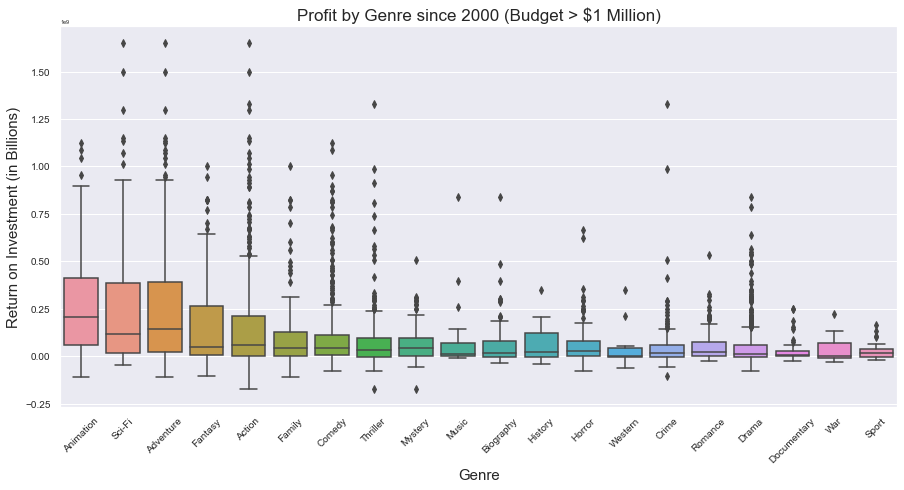

In [90]:
my_order = genre_roi1_df.groupby("index")["profit"].mean().sort_values().iloc[::-1].index


plt.figure(figsize=(15, 7))
# movies_box = sns.load_dataset(genre_roi)
ax = sns.boxplot(x=genre_roi1_df['index'], y=genre_roi1_df['profit'], data=(genre_roi1_df), order=my_order)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize = 10)
# ax.set(xlabel='Genre', ylabel='Return on Investment (in Billions)', fontsize = 20)
# sns.set(font_scale=.5)
ax.set_title('Profit by Genre since 2000 (Budget > $1 Million)', fontsize = 17)
ax.set_xlabel('Genre', fontsize=15);
ax.set_ylabel('Return on Investment (in Billions)', fontsize=15);

## General genre breakdown (budget 10 million+, excluded genres with fewer than 10 films in database)¶

In [59]:
final_df_10mil = final_df[final_df['budget'] >= 10000000] 
# final_df_10mil.loc[final_df_10mil['genre2'] == 'Music']

In [60]:
genre_roi10 = pd.concat([pd.Series(final_df_10mil['profit'].values, final_df_10mil['genre1']),
                       pd.Series(final_df_10mil['profit'].values, final_df_10mil['genre2']),
                       pd.Series(final_df_10mil['profit'].values, final_df_10mil['genre3'])])

In [152]:
pd.DataFrame(genre_roi10).reset_index().groupby(['index']).describe()


0                                                        \
             count          mean           std          min          25%   
index                                                                      
Action       378.0  1.795245e+08  2.688568e+08 -175000000.0   8745597.25   
Adventure    312.0  2.642316e+08  3.025446e+08 -110450242.0  40878303.00   
Animation     92.0  2.997577e+08  2.828847e+08 -110450242.0  86315897.00   
Biography    102.0  6.389299e+07  1.214217e+08  -37125078.0  -4888731.25   
Comedy       368.0  1.228599e+08  1.903083e+08  -79448583.0  13708837.50   
Crime        186.0  5.931685e+07  1.399501e+08 -106200000.0  -2987918.00   
Documentary   14.0  7.783765e+07  9.497258e+07  -23612961.0  17845240.50   
Drama        493.0  6.120846e+07  1.142625e+08  -79448583.0  -6272254.00   
Family        76.0  1.504992e+08  2.334814e+08 -110450242.0  16255366.50   
Fantasy      104.0  1.951393e+08  2.688117e+08 -106200000.0   8142396.50   
History       32.0  6.306361e+07  8.795736e+07  -41995779.0  -2277476.75   
Horror        92.0  6.894504e+07  1.189278e+08  -79448583.0  -3916548.75   
Music         34.0  7.913700e+07  1.584500e+08  -11613847.0   5740968.75   
Mystery       75.0  7.616215e+07  1.081895e+08 -175000000.0    893712.00   
Romance      122.0  6.451797e+07  8.617332e+07  -26612909.0   7504895.25   
Sci-Fi       104.0  3.003467e+08  3.547907e+08  -46960742.0  40887570.25   
Sport         24.0  3.312876e+07  4.889055e+07  -19607351.0  -1824591.00   
Thriller     181.0  1.023441e+08  1.915339e+08 -175000000.0     34913.00   
War           12.0  4.349279e+07  7.939757e+07  -31979010.0 -11688437.00   

                                                      
                     50%           75%           max  
index                                                 
Action        71490289.0  2.352814e+08  1.648134e+09  
Adventure    157063478.5  3.996239e+08  1.648134e+09  
Animation    224905076.0  4.305106e+08  1.122470e+09  
Biography     21221328.5  8.236270e+07  8.399853e+08  
Comedy        61293547.0  1.421607e+08  1.122470e+09  
Crime         27556529.5  7.135388e+07  1.328723e+09  
Documentary   39736670.0  1.352729e+08  2.509979e+08  
Drama         25584304.0  7.730918e+07  8.399853e+08  
Family        59357702.0  1.583820e+08  1.004200e+09  
Fantasy       62128533.0  3.134813e+08  1.004200e+09  
History       40661101.5  1.230214e+08  3.498374e+08  
Horror        40288620.0  8.409788e+07  6.624580e+08  
Music         28747961.0  8.353326e+07  8.399853e+08  
Mystery       53354114.0  9.470475e+07  5.064643e+08  
Romance       40864583.5  9.168313e+07  5.309981e+08  
Sci-Fi       169554362.0  4.191699e+08  1.648134e+09  
Sport         17923418.0  5.842823e+07  1.635915e+08  
Thriller      38929666.0  1.208577e+08  1.328723e+09  
War           -2102223.0  9.437002e+07  2.207801e+08

In [61]:
genre_roi10 = genre_roi10.drop(labels=['Western', 'Unknown', 'Musical'])
genre_roi10_df = pd.DataFrame(genre_roi10).reset_index().rename(columns={0:'profit'})

In [63]:
genre_roi10_df

,index,profit
0,Adventure,42217171
1,Crime,82729621
2,Adventure,825491110
3,Adventure,825491110
4,Fantasy,825491110
...,...,...
3189,Thriller,737628605
3190,Drama,10883171
3191,Drama,-37125078
3192,NaN,-3052017


Text(0, 0.5, 'Return on Investment (in Billions)')

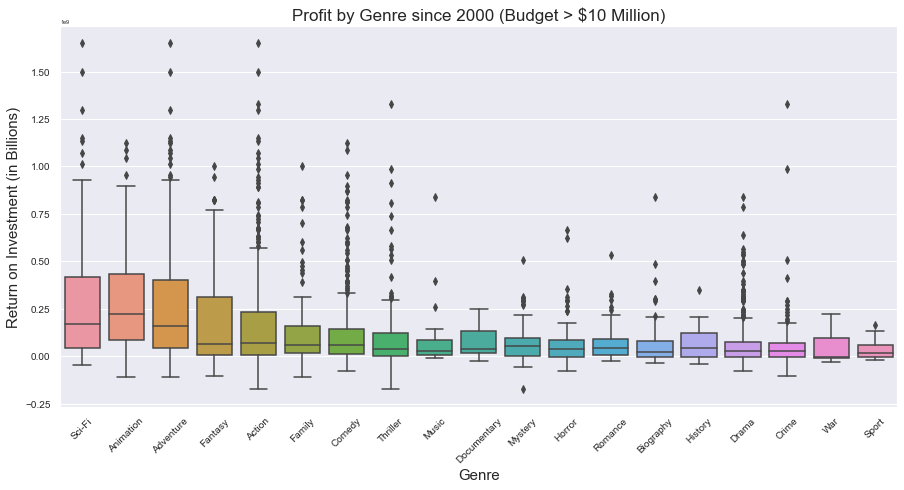

In [91]:
my_order = genre_roi10_df.groupby("index")["profit"].mean().sort_values().iloc[::-1].index

plt.figure(figsize=(15, 7))
# movies_box = sns.load_dataset(genre_roi)
ax = sns.boxplot(x=genre_roi10_df['index'], y=genre_roi10_df['profit'], data=(genre_roi10_df), order=my_order)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize = 10)
plt.setp(ax.get_yticklabels(), fontsize = 10)

ax.set_title('Profit by Genre since 2000 (Budget > $10 Million)', fontsize = 17)
ax.set_xlabel('Genre', fontsize=15)
ax.set_ylabel('Return on Investment (in Billions)', fontsize=15)

<AxesSubplot:xlabel='year', ylabel='profit'>

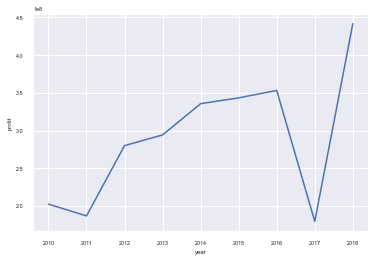

In [177]:
genre_roi2_scifi = pd.DataFrame(pd.concat([pd.Series(final_df_10mil.loc[final_df_10mil['genre1'] == 'Sci-Fi']['Year'].values, final_df_10mil.loc[final_df_10mil['genre1'] == 'Sci-Fi']['profit']),
                               pd.Series(final_df_10mil.loc[final_df_10mil['genre2'] == 'Sci-Fi']['Year'].values, final_df_10mil.loc[final_df_10mil['genre2'] == 'Sci-Fi']['profit']),
                               pd.Series(final_df_10mil.loc[final_df_10mil['genre3'] == 'Sci-Fi']['Year'].values, final_df_10mil.loc[final_df_10mil['genre3'] == 'Sci-Fi']['profit'])]
                              )).reset_index().rename(columns={0:'year'})

grouped_mean = genre_roi2_scifi.groupby('year').mean()

sns.lineplot(x= grouped_mean.index, y=grouped_mean.profit, data=grouped_mean)


<module 'matplotlib.pyplot' from '/Users/home/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

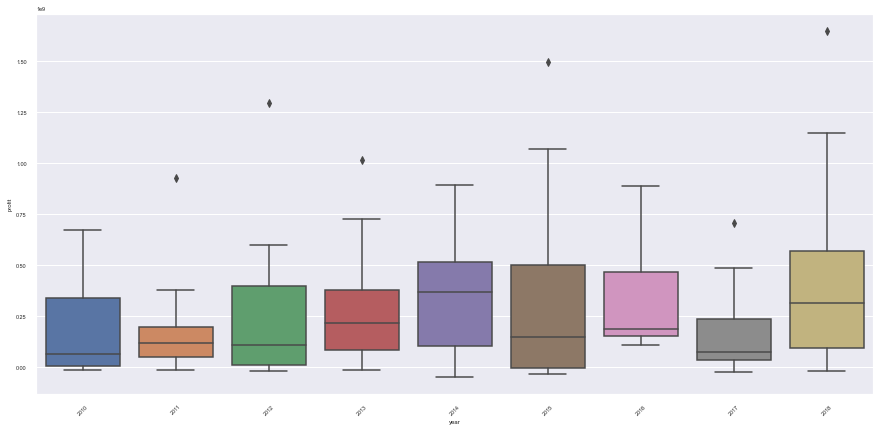

In [176]:
plt.figure(figsize=(15, 7))
# movies_box = sns.load_dataset(genre_roi)
ax = sns.boxplot(x=genre_roi2_scifi['year'], y=genre_roi2_scifi['profit'], data=genre_roi2_scifi)
plt.setp(ax.get_xticklabels(), rotation=45)
# sns.lineplot(x= grouped_mean.index, y=grouped_mean.profit, data=grouped_mean)
plt

### group by runtime_minutes


In [136]:
final_df_runtime_grouped = final_df_1mil.copy()

In [137]:
final_df_runtime_grouped['runtime_minutes'].describe()

count    1358.000000
mean      107.654639
std        18.471612
min         4.000000
25%        95.000000
50%       106.000000
75%       118.000000
max       180.000000
Name: runtime_minutes, dtype: float64

In [143]:
final_df_runtime_grouped['runtime_desc'] = final_df_runtime_grouped.apply(
    lambda x: 'short' if x['runtime_minutes'] <= 95.0 else(
        'medium' if x['runtime_minutes'] <= 118.0 else 'long'), axis = 1
)

In [144]:
final_df_runtime_grouped.head()

,Year,title,tconst,original_title_imdb,runtime_minutes,genres,averagerating,numvotes,original_language,original_title_mvdb,release_date_imdb,genre1,genre2,genre3,release_date_tn,domestic_gross,worldwide_gross,budget,profit,runtime_desc
0,2010,127 Hours,tt1542344,127 Hours,94.0,"Adventure,Biography,Drama",7.6,323949.0,en,127 Hours,2010-11-05,Adventure,Biography,Drama,"Nov 5, 2010","$18,335,230",60217171,18000000,42217171,short
1,2010,8: The Mormon Proposition,tt1484522,8: The Mormon Proposition,80.0,Documentary,7.0,1190.0,en,8: The Mormon Proposition,2010-01-01,Documentary,NaN,NaN,"Jun 18, 2010","$100,280",100280,2500000,-2399720,short
2,2010,A Nightmare on Elm Street,tt1179056,A Nightmare on Elm Street,95.0,"Crime,Drama,Horror",5.2,85497.0,en,A Nightmare on Elm Street,2010-04-30,Crime,Drama,Horror,"Apr 30, 2010","$63,075,011",117729621,35000000,82729621,short
3,2010,Alice in Wonderland,tt1014759,Alice in Wonderland,108.0,"Adventure,Family,Fantasy",6.5,358813.0,en,Alice in Wonderland,2010-03-05,Adventure,Family,Fantasy,"Mar 5, 2010","$334,191,110",1025491110,200000000,825491110,medium
4,2010,Alice in Wonderland,tt1014759,Alice in Wonderland,108.0,"Adventure,Family,Fantasy",6.5,358813.0,en,Alice in Wonderland,2010-01-01,Adventure,Family,Fantasy,"Mar 5, 2010","$334,191,110",1025491110,200000000,825491110,medium


<module 'matplotlib.pyplot' from '/Users/home/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

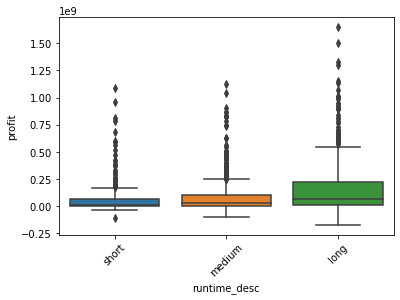

In [146]:
# plt.figure(figsize=(15, 7))
# movies_box = sns.load_dataset(genre_roi)
ax = sns.boxplot(x=final_df_runtime_grouped['runtime_desc'], y=final_df_runtime_grouped['profit'], data=final_df_runtime_grouped)
plt.setp(ax.get_xticklabels(), rotation=45)
plt


### find correlation between profitability and review score

In [ ]:
final_df

In [ ]:
plt.figure(figsize=(15, 7))
movies_box = sns.load_dataset('final_df')
ax = sns.boxplot(x=final_df['genre1', 'genre2', 'genre3'])
plt.setp(bar.get_xticklabels(), rotation=45)
bar

In [51]:
final_df_1mil.loc[(final_df_1mil['genre3'] == 'Animation') |
                  (final_df_1mil['genre2'] == 'Animation') |
                  (final_df_1mil['genre1'] == 'Animation')].sort_values(by = 'profit', ascending=False)

,Year,title,tconst,original_title_imdb,runtime_minutes,genres,averagerating,numvotes,original_language,original_title_mvdb,release_date_imdb,genre1,genre2,genre3,release_date_tn,domestic_gross,worldwide_gross,budget,profit
544,2013,Frozen,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998.0,en,Frozen,2013-11-27,Adventure,Animation,Comedy,"Nov 22, 2013","$400,738,009",1272469910,150000000,1122469910
933,2015,Minions,tt2293640,Minions,91.0,"Adventure,Animation,Comedy",6.4,193917.0,en,Minions,2015-07-10,Adventure,Animation,Comedy,"Jul 10, 2015","$336,045,770",1160336173,74000000,1086336173
1367,2018,Incredibles 2,tt3606756,Incredibles 2,118.0,"Action,Adventure,Animation",7.7,203510.0,en,Incredibles 2,2018-06-15,Action,Adventure,Animation,"Jun 15, 2018","$608,581,744",1242520711,200000000,1042520711
1216,2017,Despicable Me 3,tt3469046,Despicable Me 3,89.0,"Adventure,Animation,Comedy",6.3,92580.0,en,Despicable Me 3,2017-06-30,Adventure,Animation,Comedy,"Jun 30, 2017","$264,624,300",1034727750,80000000,954727750
532,2013,Despicable Me 2,tt1690953,Despicable Me 2,98.0,"Adventure,Animation,Comedy",7.4,344230.0,en,Despicable Me 2,2013-07-03,Adventure,Animation,Comedy,"Jul 3, 2013","$368,065,385",975216835,76000000,899216835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2014,Henry & Me,tt1460798,Henry & Me,67.0,"Animation,Family",6.2,132.0,en,Henry & Me,2014-08-18,Animation,Family,NaN,"Aug 18, 2014",$0,0,5000000,-5000000
667,2013,Underdogs,tt1634003,Metegol,106.0,"Adventure,Animation,Family",6.5,8197.0,en,Underdogs,2013-04-06,Adventure,Animation,Family,"Aug 16, 2013","$35,017",1392649,21000000,-19607351
718,2014,Dwegons and Leprechauns,tt1134666,Dwegons and Leprechauns,98.0,Animation,4.2,84.0,en,Dwegons and Leprechauns,2014-01-24,Animation,NaN,NaN,"Aug 29, 2014",$0,0,20000000,-20000000
1395,2018,Sgt. Stubby: An American Hero,tt5314190,Sgt. Stubby: An American Hero,84.0,"Adventure,Animation,Family",6.9,1225.0,en,Sgt. Stubby: An American Hero,2018-04-13,Adventure,Animation,Family,"Apr 13, 2018","$3,054,285",3645957,25000000,-21354043


In [ ]:
def highlight_Nolan(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [133]:
final_df_1mil.loc[((final_df_1mil['genre3'] == 'Sci-Fi') |
                  (final_df_1mil['genre2'] == 'Sci-Fi') |
                  (final_df_1mil['genre1'] == 'Sci-Fi') )&(
                    (final_df_1mil['genre3'] == 'Adventure') |
                    (final_df_1mil['genre2'] == 'Adventure') |
                    (final_df_1mil['genre1'] == 'Adventure'))
                 ].sort_values(by = 'profit', ascending=False).reset_index().drop(
    columns=['index', 'tconst', 'original_title_imdb',
             'runtime_minutes', 'averagerating', 'numvotes',
             'original_language', 'original_title_mvdb', 'genre1',
             'genre2', 'genre3', 'release_date_tn']).style.apply(
                lambda x: ['background: #00a4ef' if x.title == 'Inception' or x.title == 'Interstellar' else '' for i in x], axis = 1)

,Year,title,genres,release_date_imdb,domestic_gross,worldwide_gross,budget,profit
0,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018-04-27,"$678,815,482",2048134200,400000000,1648134200
1,2015,Jurassic World,"Action,Adventure,Sci-Fi",2015-06-12,"$652,270,625",1648854864,150000000,1498854864
2,2012,The Avengers,"Action,Adventure,Sci-Fi",2012-05-04,"$623,279,547",1517935897,220000000,1297935897
3,2018,Black Panther,"Action,Adventure,Sci-Fi",2018-02-16,"$700,059,566",1348258224,200000000,1148258224
4,2018,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",2018-06-22,"$417,719,760",1305772799,170000000,1135772799
5,2015,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015-05-01,"$459,005,868",1403013963,330600000,1072413963
6,2013,Iron Man 3,"Action,Adventure,Sci-Fi",2013-05-03,"$408,992,272",1215392272,200000000,1015392272
7,2011,Transformers: Dark of the Moon,"Action,Adventure,Sci-Fi",2011-06-28,"$352,390,543",1123790543,195000000,928790543
8,2014,Transformers: Age of Extinction,"Action,Adventure,Sci-Fi",2014-06-27,"$245,439,076",1104039076,210000000,894039076
9,2016,Captain America: Civil War,"Action,Adventure,Sci-Fi",2016-05-06,"$408,084,349",1140069413,250000000,890069413


In [112]:
pd.options.display.max_rows = 4000

final_df_1mil.groupby(['genre1','genre2', 'genre3']).size().sort_values(ascending=False)

genre1       genre2       genre3     
Adventure    Animation    Comedy         63
Action       Adventure    Sci-Fi         49
Comedy       Drama        Romance        46
Action       Crime        Drama          37
             Adventure    Fantasy        29
             Comedy       Crime          29
Horror       Mystery      Thriller       28
Action       Adventure    Drama          28
             Crime        Thriller       23
Crime        Drama        Thriller       20
Biography    Drama        History        19
Action       Adventure    Comedy         18
Crime        Drama        Mystery        17
Biography    Comedy       Drama          16
Adventure    Family       Fantasy        14
Action       Adventure    Animation      14
             Drama        Thriller       13
             Adventure    Thriller       13
Biography    Crime        Drama          12
             Drama        Sport          11
Drama        Mystery      Thriller       11
Adventure    Comedy       Drama       

In [113]:
most_common_genres = final_df_10mil.loc[((final_df_10mil['genre1'] == 'Adventure') &
                                         (final_df_10mil['genre2'] == 'Animation') &
                                         (final_df_10mil['genre3'] == 'Comedy')) |
                                        ((final_df_10mil['genre1'] == 'Action') &
                                         (final_df_10mil['genre2'] == 'Adventure') &
                                         (final_df_10mil['genre3'] == 'Sci-Fi')) |
                                        ((final_df_10mil['genre1'] == 'Comedy') &
                                         (final_df_10mil['genre2'] == 'Drama') &
                                         (final_df_10mil['genre3'] == 'Romance'))
                                       ]


Text(0, 0.5, 'Return on Investment (in Billions)')

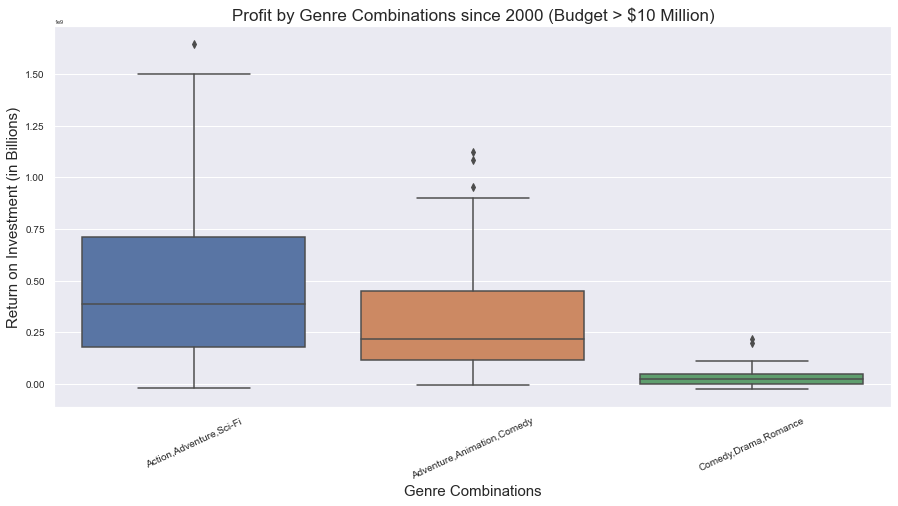

In [118]:
my_order = most_common_genres.groupby("genres")["profit"].mean().sort_values().iloc[::-1].index

plt.figure(figsize=(15, 7))
# movies_box = sns.load_dataset(genre_roi)
ax = sns.boxplot(x=most_common_genres['genres'], y=most_common_genres['profit'], data=(most_common_genres), order=my_order)
plt.setp(ax.get_xticklabels(), rotation=25, fontsize = 10)
plt.setp(ax.get_yticklabels(), fontsize = 10)

ax.set_title('Profit by Genre Combinations since 2000 (Budget > $10 Million)', fontsize = 17)
ax.set_xlabel('Genre Combinations', fontsize=15)
ax.set_ylabel('Return on Investment (in Billions)', fontsize=15)

In [193]:
final_df.loc[(final_df['genre3'] == 'News')]

,Year,title,tconst,original_title_imdb,runtime_minutes,genres,averagerating,numvotes,original_language,original_title_mvdb,release_date_imdb,genre1,genre2,genre3,release_date_tn,domestic_gross,worldwide_gross,budget,profit
